In [229]:
import pandas as pd
import numpy as np
import igraph as ig
from datetime import datetime
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from IPython.display import display, HTML, SVG, Image, IFrame, Video
import json

In [230]:
mapbox_access_token = 'pk.eyJ1IjoibW9rbW9rIiwiYSI6ImNqMjBiZmE5ZzAwMXkyd29jYzFraXdwMDMifQ.920tRBkBcRY3rIF7ue6NPw'
mapstyle = "white-bg"
center_xy = go.layout.mapbox.Center(lon=2.4, lat=49.0)
margin = {'l': 0, 'b': 0, 't': 0, 'r': 0}
legend = {'x': 0, 'y': 1}
w = 1400
h = 700

margin = {'l': 100, 'b': 5, 't': 70, 'r': 40}
bgcolor = 'rgba(0,0,0,0)'

legend = dict(
    x=0.95,
    xanchor="right",
    y=0.9,
    yanchor="bottom",
    title_font_family="Arial",
    orientation="h",
    font=dict(size=13),
    traceorder = 'normal',
)

class color():
    bleu = "#1f77b4"
    orange = '#ff7f0e'
    vert = '#2a9d8f'
    rouge = '#e63946'
    violet = '#9467bd'
    marron = '#8c564b'
    rose = '#e377c2'
    gris = '#7f7f7f'
    vert2 = '#bcbd22'
    turquoise = '#17becf'
    bc = '#eee8d5'
    
font = dict(
    size=14,
    color= color.bc,
    family="Arial"
)

renderer_list = ['plotly_mimetype', 'jupyterlab', 'nteract', 'vscode','notebook', 'notebook_connected', 'kaggle', 'azure',
                 'colab','cocalc', 'databricks', 'json', 'png', 'jpeg', 'jpg', 'svg','pdf', 'browser', 'firefox', 'chrome',
                 'chromium', 'iframe', 'iframe_connected', 'sphinx_gallery', 'sphinx_gallery_png']

renderer = 'notebook_connected'

---

# La géomatique à l’Agence de la biomédecine : usages et enjeux
## Apport de la géographie de la santé et de la modélisation spatiale aux problématiques d’attribution des organes en transplantation
<br>

---

<br>
<div class="container">
        <div class="row align-middle">
          <div class="col">
              <div class=" cblanc" style="padding-top: 35px;">
                <div class="fas fa-xl fa-diagram-project"></div>
                <div class="fas fa-lungs"> </div>
                <div class="fas fa-arrows-to-circle"></div> 
                <div class="fas fa-helicopter"></div> 
                Florian Bayer - florian.bayer@biomedecine.fr
            </div>
          </div>
          <div class="col">
             <img src="./assets/img/logo.png" width="100%" style="float:right ;"/>
          </div>
        </div>
</div>



<h1> <i class="fas fa-globe"></i> La géographie</h1>

<br>

<div class="r-stack">
	<div class="fragment fade-out" style="width: 1200px;">
        <blockquote class="fs-3" style="width: 1200px;">« Tout le monde croit que la géographie n’est qu’une discipline scolaire et universitaire dont la fonction serait de fournir des éléments d’une description du monde, dans une certaine conception “désintéressée” de la culture dite générale » </blockquote>
        <blockquote class="fs-4" style="width: 1200px;">Yves Lacoste La géographie, ça sert, d’abord, à faire la guerre. La Découverte ; 1976</blockquote>
    </div>
    <div class="fragment fade-in-then-out" style="width: 1200px;">
        <blockquote class="fs-3" style="width: 1200px;">La science qui applique l'approche spatiale à l’ensemble des autres sciences</blockquote>
    </div>
</div>

<font color='red' size=4>
    
- J'ai choisi d'introduire cette présentation avec une citation d'Yves Lacoste tirée de La géographie, ça sert, d’abord, à faire la guerre

Il nous dit : 
    
« Tout le monde croit que la géographie n’est qu’une discipline scolaire et universitaire dont la fonction serait de fournir des éléments d’une description du monde, dans une certaine conception “désintéressée” de la culture dite générale » 
    
- Et 46 ans après, cette citation reste toujours aussi percutante quand à l'idée que l'on se fait de la géographie en France

- Pour ma part, j'ai toujours vécu la géographie comme une science multidisciplinaire,
---   
- soit la science qui applique l'approche spatiale à l’ensemble des autres sciences.
        
- C'est cette vision que j'ai souhaité mettre en avant, en abordant à travers le prisme spatial, la santé publique et l'épidémiologie. 
    
</font>

<h2> <i class="fas fa-suitcase-medical"></i> Santé, épidémiologie, santé publique, géographie de la santé</h2>

<br>

<div class="r-stack">
	<div class="fragment fade-in-then-out" style="width: 1200px;">
        <blockquote class="fs-3" style="width: 1200px;">« Être en bonne santé c’est pouvoir tomber malade et s’en relever, c’est un luxe biologique.» </blockquote>
        <blockquote class="fs-4" style="width: 1200px;">Georges Canguilhem Le normal et le pathologique. Presses Universitaires de France ; 1966</blockquote>
    </div>
</div>


<font color='red' size=4>

Sans transformer cette conférence en cours magistral, je vais vous donner quelques définitions pour mieux comprendre les enjeux.
    
- Il y a de nombreuses définition de la santé. J'apprécie celle qu'en donne Canguilhem et qui a inspirer la définition de l'OMS : Être en bonne santé c’est pouvoir tomber malade et s’en relever, c’est un luxe biologique.

- L'épidémiologie est la science qui étudie des facteurs influant sur la santé et les maladies de population : la répartition, la diffusion et les impacts de l'épidémide de COVID-19 sur la survie. Les facteurs de risques associé au fait de tomber malades. Mesurer les effets protecteurs des vaccins.

- la santé publique  est la science de prévenir les maladies, de prolonger la vie et d’améliorer la santé physique et mentale à un niveau individuel et collectif. Quelle mesure faut'il prendre pour protéger la population face à la COVID-19 et pour prendre en charge les malades. masques, distanciation, vaccination, l'ouverture de lits de réa.

- Concernant la géographie de la santé, c'est un peu plus compliqué. Elle s’intéressant à la répartition spatiale des malades, des maladies et de leurs déterminants environnementaux, culturels ou encore sociodémographiques, comme autant de facteurs de risque. À cela s’ajoute l’étude de l’offre et des besoins en santé et du lien entre les deux : le recours aux soins. Les géographes de la santé étudient alors comment l’organisation des soins peut en partie modeler les territoires via des dynamiques classiques en géographie : centralité, frontières, attraction ou répulsion 
    
Pour vous illustrer ce triptique épidémio, santé publique et géogrpahie, je vais m'appuyer sur mon expérience à l'Agence de la biomédecine    
</font>

<div class="container">
   <div class="row" >
       <div class="text-center">
           <img src="./assets/img/missions_abm.jpg" alt="..." width=100%>
       </div>
   </div>  
</div>

<font color='red' size=4>

- Est-ce que vous connaissez ?
- Agence sanitaire sous tutelle du Ministère de la santé, créée par la loi de bioéthique de 2004
- Domaines de compétences concernent les soins à partir du corps humain : 
    - Prélèvements et greffes d’organes, 
    - de tissus et de cellules (CSH) 
    - Procréation, embryologie et génétique humaine
    - Registres REIN

- Missions :  régulation, Promotion,  mesure et amélioration de l’accès aux soins. 


    
</font>

<h2><i class="fas fa-circle-question"></i> Pourquoi de la géographie de la santé à l’Agence de la biomédecine ? </h2> 

In [231]:
center_begin = """<div class="container"> <div class="row" > <div class="text-center"> """
center_end = """</div> </div> </div>"""
data =f"""
{center_begin}
<svg width="1400" height="800" xmlns="http://www.w3.org/2000/svg"><defs><clipPath id="a"><path d="M0 0h2629.2v1311.5H0z" clip-rule="evenodd"/></clipPath><clipPath id="b"><path d="M152.29 144.84h504.94v479.33H152.29z" clip-rule="evenodd"/></clipPath><clipPath id="c"><path d="M1095.1 210.99h346.97v347.02H1095.1z" clip-rule="evenodd"/></clipPath><clipPath id="d"><path d="M0 0h2629.2v1311.5H0z" clip-rule="evenodd"/></clipPath><clipPath id="e"><path d="M2010.5 93.221h283.2v283.24h-283.2z" clip-rule="evenodd"/></clipPath><clipPath id="f"><path d="M2032.5 472.54h130.61v130.63H2032.5z" clip-rule="evenodd"/></clipPath><clipPath id="g"><path d="M2339.9 472.54h130.61v130.63H2339.9z" clip-rule="evenodd"/></clipPath><clipPath id="h"><path d="M2188 472.54h130.61v130.63H2188z" clip-rule="evenodd"/></clipPath><clipPath id="i"><path d="M1879.9 472.54h130.61v130.63H1879.9z" clip-rule="evenodd"/></clipPath><clipPath id="j"><path d="M283.18 237.66h211.39v211.42H283.18z" clip-rule="evenodd"/></clipPath><clipPath id="k"><path d="M0 0h2629.2v1311.5H0z" clip-rule="evenodd"/></clipPath></defs><g clip-path="url(#a)" transform="matrix(.5147 0 0 .5147 43.667 24.286)"><text transform="matrix(2.3448 0 0 2.3327 75.066 862.218)" fill="#eee8d5" font-family="'Open Sans'" font-size="14" font-weight="bold" xml:space="preserve"><tspan x="0 13.200195 21.47168 28.430664 37.631836 43.708984 51.980469 58.337891 61.974609 66.24707 69.131836 77.799805 88.634766 94.711914 102.9834 106.62012 114.8916 120.96875 124.60547 128.87793 137.14941 144.1084 147.74512 156.60449 164.87598 171.83496 180.50293 184.77539 193.97656 200.93555 204.57227 212.84375 222.04492 225.68164 232.64062 241.09668 250.29785 256.375" y="0">Mesurer l&apos;oﬀre et les besoins en santé</tspan></text><text transform="matrix(2.3378 0 0 2.3327 75.066 939.978)" fill="#eee8d5" font-family="'Open Sans'" font-size="14" font-weight="bold" xml:space="preserve"><tspan x="0 8.9208984 17.588867 31.335938 40.195312 46.272461 54.543945 63.745117 72.604492 78.681641 86.953125 90.589844 94.862305 103.13379 110.09277 113.72949 122.58887 130.86035 136.9375 145.20898 151.56641 165.31348 169.58594 178.78711 187.24316 196.44434 202.52148 209.48047 213.11719 221.97656 230.24805 237.20703" y="0">Comprendre les déterminants des </tspan></text><text transform="matrix(2.3324 0 0 2.3327 75.066 986.632)" fill="#eee8d5" font-family="'Open Sans'" font-size="14" font-weight="bold" xml:space="preserve"><tspan x="0 13.74707 22.203125 26.475586 34.931641 43.791016 48.063477 56.334961" y="0">maladies</tspan></text><text transform="matrix(2.3413 0 0 2.3327 1004.8 862.218)" fill="#eee8d5" font-family="'Open Sans'" font-size="14" font-weight="bold" xml:space="preserve"><tspan x="0 9.2421875 17.513672 25.422852 29.695312 37.966797 44.925781 48.5625 57.421875 60.586914 69.042969 73.31543 77.587891 86.255859 93.454102 101.91016 107.9873 112.25977 120.92773 130.12891 133.76562 142.625 150.89648 157.85547 161.49219 169.40137 175.47852 183.75 194.58496 203.25293 212.4541" y="0">Règles d&apos;allocation des greﬀons</tspan></text><text transform="matrix(2.3386 0 0 2.3327 1004.8 939.978)" fill="#eee8d5" font-family="'Open Sans'" font-size="14" font-weight="bold" xml:space="preserve"><tspan x="0 7.7109375 11.983398 25.730469 34.931641 39.204102 47.475586 53.833008 57.469727 61.742188 65.467773 69.740234 83.487305 92.34668 96.619141 105.0752 114.27637 120.35352 128.80957 134.88672 139.15918 147.82715 157.02832 160.66504 169.52441 172.83301 182.03418 191.23535 194.87207 202.07031 210.3418 219.54297 225.62012 231.69727 239.96875 243.60547 252.46484 260.73633" y="0">Simuler l&apos;implantation d&apos;un centre de </tspan></text><text transform="matrix(2.3324 0 0 2.3327 1004.8 986.632)" fill="#eee8d5" font-family="'Open Sans'" font-size="14" font-weight="bold" xml:space="preserve"><tspan x="0 6.9589844 15.626953 19.899414 29.100586 36.05957 39.696289 47.967773 54.044922 57.681641 64.640625 72.912109 79.871094 83.507812 87.780273 101.52734 110.38672 118.84277 126.04102 132.11816" y="0">soins et ses impacts</tspan></text><text transform="matrix(2.3373 0 0 2.3327 1933.6 862.218)" fill="#eee8d5" font-family="'Open Sans'" font-size="14" font-weight="bold" xml:space="preserve"><tspan x="0 9.6591797 18.860352 27.719727 33.796875 42.068359 49.027344 52.664062 61.523438 69.794922 76.753906 80.390625 86.467773 95.668945 101.74609 110.01758 114.29004 118.5625 126.83398" y="0">Auprès des tutelles</tspan></text></g><g clip-path="url(#b)" transform="matrix(.5147 0 0 .5147 43.667 24.286)" stroke="#1e5260"><g fill="none" stroke-miterlimit="10"><path d="m107.19 43.788 1.323.353 1.587-1.147.97-.088 1.323 1.323.353 2.999 3.88.793.442 2.646.705.088.441-.793 3.264.264 1.675 1.588.265 3.351-.794 1.764.706.176.176 2.47-.265 1.675-.97 1.588-.529 1.146-.264 2.91h-1.412l-3.175 1.5.265 1.852.882.618v.705l-1.058.618-.618 2.557-1.234 2.117-.53-.265-2.204-1.852-.882-1.235-.265-1.234H110.1l-.088.529-5.468-.265-2.998-1.323-2.558-.705-1.323.353-1.5-.265-1.675-.705.441-.794.177-.53.088-.793-.53-.97.883-1.5-.618-1.587-.264-2.205.882-.794-.882-2.293-3.44-3.528.706-.617.705-1.411.353-1.764.264-1.5.089-5.115.352-3.527 1.764-1.411 2.117-.53 1.94-.352 4.94-1.5.881 4.851 1.058.176.794 1.588z" transform="matrix(2.8496 0 0 2.85 100.59 39.167)"/><path d="m95.194 67.777-.088.794-.177.529-.44.794-.353.529-.177 1.058-.529.97-1.94.353.264 2.205-.705 2.558-1.764.705-3.704.617-1.676.706 1.411 2.117.177 2.646-1.588.97-.353.97.441 1.234-2.028-.44-3.263-1.5.352-2.116-1.852-.882-2.205 2.116-2.028-.617.353-1.058-.265-1.323-1.676-.441-.793.97-5.116.705-1.058-1.234-2.558-.265-1.764-.705-2.028 1.587-1.411-.97-.353-1.764 1.94-.44-.176-1.147-2.117-1.147.618-2.998V69.1l-2.646-3.88.44-3.528-1.763-1.059.264-1.146 4.851 1.323 2.558-.794 1.058 1.411-1.058 1.94 1.5 2.999 2.557-.176 5.997 1.41 2.028.97 2.382-.617 2.557-2.469-1.5-.617 1.677-3.88 4.321-2.294 2.293-.353 3.087-.617 2.293-1.235 1.764-1.587 3.44 3.527.882 2.294-.882.793.264 2.205.618 1.588-.882 1.499.529.97zM130.65 56.752l-.088 3.087 1.323-.088 3.704 1.764 1.146 1.587.882 1.588 4.145-.97 1.235 1.234 3.704-.44 3.705 1.146 2.293 4.498 1.146.176.176-1.323 2.117.353.353 1.323 2.558-.089 1.499-1.499 1.058.441 1.323 1.94h2.91l3.793 1.059.176.882-1.323 2.645-2.91 3.352-.706 5.38-1.234 3.704-.265 6.35.882 2.91-2.558 2.558h-2.293l-.529-1.5-1.676-1.41.441-2.205-2.734-1.235-2.822-2.205-4.586.441-.882-1.5-1.323.089-1.852 1.411.088 1.058-2.293 1.147.353 2.293-3.704.705-1.764 1.059-3.616-2.205-2.822-5.38-5.027 1.676-4.675.176-2.645-3.88-1.147-3.087-2.293-1.059 1.764-3.968-.53-.441-.97-1.852.97-1.588 1.235-2.117.618-2.557 1.058-.618v-.705l-.882-.618-.265-1.852 3.175-1.499h1.412l.264-2.91.53-1.147.97-1.587.264-1.676-.176-2.47 1.499-.176 1.587.441 1.588-1.146 1.676-3.087 1.675.44-.705 3.176z" transform="matrix(2.8496 0 0 2.85 100.59 39.167)"/><path d="m117.33 88.855 2.646 3.88 4.674-.176 5.027-1.675 2.822 5.38 3.616 2.204 1.764-1.058 3.705-.706-.353-2.293 2.293-1.146-.088-1.058 1.852-1.412 1.323-.088.882 1.5 4.586-.441 2.822 2.204 2.734 1.235-.441 2.205 1.676 1.411-1.323.794-1.147.705 1.588 1.323-1.323 2.734-5.556 4.763.088 2.998-3.704 4.498-.53 2.029-2.38 2.734-2.647-.617-2.557.97-2.117-3.352-.97-.264-3.263-.53-1.852 5.91-.706-.089-.353-1.146-.088-1.147-3.528.265-.264 1.764-5.645.176-.176-1.323 1.235-1.146v-2.47l-3.087-.705-1.588-3.88h-.97l-1.323.881-2.91.265-1.676-2.029.53-2.998-1.059-4.145-1.587-2.734.352-1.235v-.882l.97-1.588-.176-2.734-.088-.882.088-.617.794-1.587 1.058-1.676-2.734-2.734 2.205-2.117.53-1.146 2.91-1.147 2.293 1.059 1.146 3.086z" transform="matrix(2.8496 0 0 2.85 100.59 39.167)"/><path d="m96.165 70.599 1.5.265 1.322-.353 2.558.705 2.998 1.323 5.468.265.089-.53h1.146l.265 1.235.882 1.235 2.205 1.852.529.265-.97 1.587.97 1.852.529.441-1.764 3.97-2.91 1.146-.53 1.146-2.204 2.117-1.147.264-1.5.089h-2.645l.088-.794-.264-1.588-.177-.705-1.764-.706-.617-.088-1.058.617-1.588.441-.794-2.998-1.41-.441-.442-1.676-1.852-2.205.088-4.321h-1.41l-.265-2.205 1.94-.353.53-.97.176-1.058.352-.53 1.676.706z" transform="matrix(2.8496 0 0 2.85 100.59 39.167)"/><path d="m96.782 83.652.794 2.999 1.587-.441 1.059-.618.617.088 1.764.706.176.706.265 1.587-.088.794h2.645l1.5-.088 1.146-.265 2.734 2.734-1.058 1.676-.794 1.587-.088.618.088.882.177 2.734-.97 1.587v.882l-.353 1.235 1.587 2.734 1.058 4.145-.529 2.999-.97-.089-4.145 1.764-.265 2.558-2.645.617-1.676 1.676-1.058-.177-4.675-.352-4.498 1.499-2.734-.617-.617-2.558-2.91-2.028-.265-1.764-2.117-4.763-1.41.618-2.47.97-3.616-4.234 2.557-8.114 4.498-1.058 2.293-3.528.882-4.057-.264-1.763-.441-1.235.353-.97 1.587-.97-.176-2.646-1.411-2.117 1.675-.705 3.705-.618 1.763-.705.706-2.558h1.411l-.088 4.322 1.852 2.204.441 1.676 1.411.441z" transform="matrix(2.8496 0 0 2.85 100.59 39.167)"/><path d="m110.1 112.93 1.676 2.029 2.91-.265 1.323-.882h.97l1.588 3.88 3.086.706v2.47l-1.234 1.146.176 1.323 5.645-.176.264-1.764 3.528-.265.088 1.147.353 1.146.705.088 1.853-5.909 3.263.53.97.264 2.117 3.351 2.557-.97 2.646.618 2.381-2.734 1.058.705-.617 2.205-1.764.617.177 1.588 1.852-.353 1.94-1.41v-.971l.176-1.94 2.646-.353h3.352l.882 2.028-.177 1.676.441 1.058 2.029 2.646-.441 1.852-2.293 1.5.176.97.794.705 1.058 1.147.53 1.852 2.469 1.587-.618 2.734-.882.794-2.381 1.235-2.734.794-2.029 1.234-2.557-1.146-.617 1.587 1.587.618.353 2.645-2.293-.176-4.41 2.822-1.676 1.235-.793 1.587.793.882-.44.97-1.94-.881-.53 2.293 3.087 1.587.44 1.323-2.645 1.5-2.91-1.941-2.646-1.058.176-1.676-.97-.265-.97.177-.265 1.146-1.234.53-1.764-.353-.089 1.146-1.675-.176-3.528.264-1.852-1.058-.97-2.205-2.293-5.115-1.411-1.94-3.352.97-.794-2.646-3.792 1.058-.441 3.704-.97.618-1.588-4.674-2.38.264-2.206 3.969-3.527.706-.441-2.47-1.412-3.704 1.147-.441.97-4.057 1.676-2.822 1.764.264.176-1.587.177-2.734-.441-2.029-.794-1.234.088-.53 1.852-1.94v-3.616l-1.764-2.47-2.117-2.028 1.676-1.675 2.646-.618.265-2.557 4.145-1.764.97.088z" transform="matrix(2.8496 0 0 2.85 100.59 39.167)"/><path d="m155.52 142.3.882.53-.088 2.116 2.998 1.146.265 1.764-.53 1.059.089 1.499-.353 2.91-.353 1.235.882.353.706 1.323 2.381 1.058 2.999.794 2.998-.97.794 1.763-.705 1.588-1.059 2.028-.176 1.588-1.235.794-3.44 2.205-.264.705-.088.177-.177.176-1.94 1.852-2.998 2.029-.794 1.234-.441.706.44.97-3.174 1.323-2.91.97-2.735-.176h-1.323l-2.822-.97-1.587-.53-1.5-.44-.264-.177-.353-.794-2.205-.353-1.058-.617-1.147-.706-1.323-.705-.793 1.5-3.263-.177-2.029-1.323-2.558-.265 1.853-2.116 1.234-2.205 2.117-2.734 1.764-1.235.882-1.323-1.676-2.205-1.147-2.557.089-1.147 1.764.353 1.234-.53.265-1.146.97-.176.97.264-.176 1.676 2.646 1.058 2.91 1.94 2.646-1.499-.441-1.322-3.087-1.588.53-2.293 1.94.882.44-.97-.793-.882.793-1.588 1.676-1.234 4.41-2.823 2.293.177-.353-2.646-1.587-.617.617-1.588 2.558 1.147 2.028-1.235z" transform="matrix(2.8496 0 0 2.85 100.59 39.167)"/><path d="m92.99 143.62 1.323 2.117 3.351-1.059 1.411 3.705.441 2.469 3.528-.706 2.205-3.968 2.381-.265 1.588 4.674.97-.617.44-3.704 3.793-1.059.794 2.646 3.351-.97 1.412 1.94 2.293 5.116.97 2.205 1.852 1.058 3.528-.265 1.675.177 1.147 2.557 1.676 2.205-.882 1.323-1.764 1.235-2.117 2.734-1.235 2.205-1.852 2.116-2.116-1.499-1.676.441-3.263 2.205-2.381 2.205-1.147-.441-1.852 1.323-1.588 1.587-1.058 2.823-.088 2.38-.088 2.118-.089 2.645-.264 1.5-2.293.352-2.029 1.235-.176 1.058-2.558-.44-1.323-.353-2.116-.177-1.147.265-1.587.088-.441-1.235-3.263-1.146 1.234-1.676-1.234-.705-2.558-.53-2.999-.529-2.028-.529-.265-1.235-3.175-.617-2.116-.794-.353 2.91-2.646-.352-4.233-.088-2.293.176-1.588-2.028-2.117-.882v-1.676l1.852-2.205 2.294-2.734.352-3.087-1.234-3.087-2.029-.793.97-5.204 2.47-1.146h1.587l5.821-1.323 2.381.176 2.205-2.822.882-1.235 1.5-1.323-.883-2.204.97-1.323 2.294-2.47 1.852-2.734.264-2.381 3.087-.353z" transform="matrix(2.8496 0 0 2.85 100.59 39.167)"/><path d="m74.028 106.05 3.616 4.233 2.47-.97 1.41-.617 2.117 4.762.265 1.764 2.91 2.029.618 2.557 2.734.618 4.497-1.5 4.675.353 1.058.177 2.117 2.028 1.764 2.47v3.615l-1.852 1.94-.089.53.794 1.235.441 2.028-.176 2.734-.177 1.588-1.764-.265-1.675 2.822-.97 4.057-1.147.441-3.351 1.058-1.323-2.116-3.087.353-.265 2.38-1.852 2.735-2.293 2.47-.97 1.322.882 2.205-1.5 1.323-.881 1.235-2.205 2.822-2.381-.177-5.821 1.323h-1.588l-2.47 1.147-.97 5.203 2.03.794 1.234 3.087-.353 3.087-2.293 2.734-1.852 2.205v1.675l-2.47.618-2.38-2.029-1.147-.705-1.764-.353-2.999-1.323-1.146-.53-1.323.442-1.5-1.235 1.588-1.852-.44-1.411-2.382.088-1.94-.882v-1.411l3.175-2.205 1.058-1.764 2.293-11.112.706-3.528.264-1.322.177-3.264 1.234-7.937.53-5.91 1.146-.617 1.058 1.853 1.94 1.587.177 1.058.794.089.088-.53v-2.116l-2.205-2.117-3.616-2.734-.176-1.5 2.116-1.234.618-2.293-.882-2.205-.618-.44-.529-.354-.264-1.499 1.675-1.235 2.558-.44 2.117 1.146 2.38-.617-1.234-7.32-2.557-3.793 3.704-.265 1.146-1.41 4.322-.442 2.381-.44z" transform="matrix(2.8496 0 0 2.85 100.59 39.167)"/><path d="m73.058 81.711.265 1.323-.353 1.058 2.028.618 2.205-2.117 1.852.882-.352 2.117 3.263 1.499 2.028.44.265 1.765-.882 4.057-2.293 3.527-4.498 1.059-2.558 8.114-2.38.44-4.322.442-1.147 1.41-3.704.265 2.557 3.793 1.235 7.32-2.381.617-2.117-1.146-2.557.44-1.676 1.235-2.822-1.852-2.91-1.94-1.765-3.969-2.38-2.822-.177-.618 1.94-2.557-.617-1.5-2.117-.881-.44-1.676-3.176-1.323.177-1.587 1.146-1.147 1.235.176.793-1.058 2.205-.088.265-1.94 3.087-.882 2.646-.706 1.94-1.323.97.088 1.058.441.618-.44 1.675-2.47 1.147-.265-.794-4.586.706-1.234-.089-3.264 2.558.265 1.058 1.235 5.116-.706.793-.97 1.676.441z" transform="matrix(2.8496 0 0 2.85 100.59 39.167)"/><path d="m40.249 75.891 2.734 4.322 1.764-1.147 1.764-.617 1.323.176 1.852.53.529-.53 1.676-.706h1.41l.97.794 1.147.53.882.352.353 1.764 1.411.97 2.029-1.587 1.764.705.088 3.263-.706 1.235.794 4.586-1.146.265-1.676 2.47-.618.44-1.058-.44-.97-.089-1.94 1.323-2.646.705-3.087.882-.264 1.94-2.205.089-.794 1.058-1.235-.176.088-.882-2.38-.353-2.206.177-1.146-.618-1.323-.794-1.147-.97-2.998-1.587-.706-.706-.44-.705-3.793-.618-.353-1.146-.882-.177-1.587-.264-.618 1.146-2.557-.264-.706-3.175-3.44-1.588.441-.97 4.675-.176.264-1.323-2.822-.088-.088-1.5 3.616.177v-2.205l-4.85.97-1.235-1.764 1.234-2.558 6.438-1.499 2.205-.264 2.734.176 1.588.794.794-2.293 5.732-.177 1.323 2.117zM188.33 181.37l2.117-.441.264-.44.53-.618.264-.441-.088-1.94-.265-1.235.53-.353.793-.088.441.353.617 3.35-.264 2.206 1.587 4.586.441 5.82-1.675 3.705.088 3.969-1.235 5.38-1.94-.177-1.059-1.5-3.792-1.057-.176-1.588 1.41-.088-.087-1.5-2.382-.793-.088-2.822-1.676-3.705-.352-4.233 1.675-3.528 3.793-1.675.529-1.147z" transform="matrix(2.8496 0 0 2.85 100.59 39.167)"/><path d="m52.861 59.486 4.85 1.323 2.558-.794 1.059 1.411-1.059 1.94 1.5 3 2.557-.177 5.997 1.41 2.029.971 2.381-.617 2.558-2.47.97.265.353 2.822 1.146 2.646v2.293l-.794 1.676 3.264 1.587 1.322 1.235.353 1.587 1.411 2.117.177 2.646-1.588.97-.353.97.441 1.235-2.028-.441-3.263-1.5.353-2.116-1.853-.882-2.204 2.117-2.029-.618.353-1.058-.265-1.323-1.675-.44-.794.97-5.116.705-1.058-1.235-2.557-.265-1.764-.705-2.029 1.587-1.41-.97-.354-1.764 1.94-.44-.176-1.147-2.117-1.147.618-2.998v-4.763l-2.646-3.88.441-3.528-1.764-1.058zM107.19 43.788l1.323.353 1.587-1.147.97-.088 1.323 1.323.353 2.999 3.88.793.442 2.646.705.088.441-.793 3.264.264 1.675 1.588.265 3.351-.794 1.764-1.852-.353-1.058-.44-2.205-.795-3.352.794h-2.734l-1.146-.705h-2.558l-3.175-1.323-.705-.618-.088-1.058-1.676-.088-2.646.617-.353-.793-3.086-2.205-2.029-.089-.706-.264.089-5.115.352-3.528 1.764-1.411 2.117-.53 1.94-.352 4.94-1.5.881 4.851 1.058.176.794 1.588z" transform="matrix(2.8496 0 0 2.85 100.59 39.167)"/><path d="m99.075 52.166.353.794 2.646-.618 1.675.089.088 1.058.706.617 3.175 1.323h2.558l1.146.706h2.734l3.352-.794 2.204.794 1.059.44 1.852.353.705.177.177 2.47-.265 1.675-.97 1.587-.53 1.147-.264 2.91h-1.41l-3.176 1.5.265 1.852.882.617v.706l-1.059.617-.617 2.558-1.235 2.116-.529-.264-2.205-1.852-.882-1.235-.264-1.235h-1.147l-.088.53-5.468-.265-2.999-1.323-2.557-.706-1.323.353-1.5-.264-1.675-.706.44-.794.177-.529.088-.794-.529-.97.882-1.5-.617-1.587-.265-2.204.882-.794-.882-2.293-3.44-3.528.706-.618.706-1.41.353-1.764.264-1.5.706.265 2.028.088 3.087 2.205z" transform="matrix(2.8496 0 0 2.85 100.59 39.167)"/><path d="m85.581 78.889-1.676.706-.352-1.588-1.323-1.235-3.264-1.587.794-1.676v-2.293l-1.146-2.646-.353-2.822-.97-.265-1.5-.617 1.676-3.88 4.322-2.294 2.293-.352 3.087-.618 2.293-1.234 1.764-1.588 3.44 3.528.881 2.293-.882.794.265 2.205.617 1.587-.882 1.5.53.97-.089.793-.176.53-.441.793-.353.53-.176 1.058-.53.97-1.94.353.265 2.205-.706 2.557-1.764.706-3.704.617zM130.65 56.752l-.088 3.087 1.323-.088 3.704 1.764 1.146 1.587-1.322.97-2.117-.617-.088 1.41.44 1.588-.617 2.117-.794 1.058.706 4.41-.97 1.147.882 3.086-.177.97v.97l5.38 3.793v1.147l3.087 1.852v2.293l2.293 2.91.088 1.058-2.293 1.147.353 2.293-3.704.706-1.764 1.058-3.616-2.205-2.822-5.38-5.027 1.676-4.675.176-2.645-3.88-1.147-3.087-2.293-1.058 1.764-3.97-.53-.44-.97-1.852.97-1.588 1.235-2.117.618-2.557 1.058-.618v-.705l-.882-.617-.264-1.853 3.175-1.499h1.41l.265-2.91.53-1.147.97-1.587.264-1.676-.176-2.47 1.5-.176 1.587.441 1.587-1.146 1.676-3.087 1.675.44-.705 3.176z" transform="matrix(2.8496 0 0 2.85 100.59 39.167)"/><path d="m136.73 63.102.882 1.587 4.145-.97 1.235 1.235 3.704-.44 3.704 1.146 2.293 4.497 1.147.177.176-1.323 2.117.353.353 1.323 2.557-.089 1.5-1.499 1.058.441 1.323 1.94-.794 2.117-2.646.088-2.028-1.058-1.323-.706-.882 2.823 3.969 2.205-.089 2.116-.529 1.94-1.146-.088v3.175l1.234.618-2.91 7.32-.882 1.94-2.822-2.205-4.586.441-.882-1.5-1.323.09-1.852 1.41-2.293-2.91v-2.293l-3.087-1.852v-1.147l-5.38-3.792v-.97l.176-.97-.882-3.087.97-1.147-.705-4.41.794-1.058.617-2.117-.44-1.587.087-1.411 2.117.617 1.323-.97z" transform="matrix(2.8496 0 0 2.85 100.59 39.167)"/><path d="m169.81 73.421-1.323 2.646-2.91 3.351-.706 5.38-1.235 3.704-.264 6.35.882 2.91-2.558 2.558h-2.293l-.53-1.499-1.675-1.411.441-2.205-2.734-1.235.882-1.94 2.91-7.32-1.234-.617v-3.175l1.146.088.53-1.94.088-2.117-3.97-2.205.883-2.822 1.323.705 2.028 1.059 2.646-.089.794-2.116h2.91l3.793 1.058.176.882z" transform="matrix(2.8496 0 0 2.85 100.59 39.167)"/><path d="m146.61 90.707.882 1.5 4.586-.442 2.822 2.205 2.734 1.235-.44 2.205 1.675 1.41-1.323.795-1.146.705 1.587 1.323-1.323 2.734-5.556 4.763.088 2.998-3.704 4.498-.53 2.029-2.38 2.734-2.646-.618-2.558.97-2.117-3.351 1.323-.176-.264-1.94-.53-3.881 1.412-.441.176-.882-2.205-.441-.53-1.588 1.236-1.587 1.675-3.88-1.764-3.176.089-2.998 3.704-.706-.353-2.293 2.293-1.146-.088-1.059 1.852-1.41 1.323-.089z" transform="matrix(2.8496 0 0 2.85 100.59 39.167)"/><path d="m117.33 88.855 2.646 3.88 4.674-.176 5.027-1.675 2.822 5.38 3.616 2.204 1.764-1.058-.088 2.999 1.764 3.175-1.676 3.88-1.234 1.588.529 1.587 2.205.441-.177.882-1.41.441.528 3.88.265 1.94-1.323.177-.97-.264-3.263-.53-1.852 5.91-.706-.089-.353-1.146-.088-1.147-3.528.265-.264 1.764-5.645.176-.176-1.323 1.235-1.146v-2.47l-3.087-.705-1.588-3.88h-.97l-1.323.881-2.91.265-1.676-2.029.53-2.998-1.059-4.145-1.587-2.734.352-1.235v-.882l.97-1.587-.176-2.734-.088-.882.088-.618.794-1.587 1.058-1.676-2.734-2.734 2.205-2.117.53-1.146 2.91-1.147 2.293 1.059 1.146 3.086z" transform="matrix(2.8496 0 0 2.85 100.59 39.167)"/><path d="m137.26 118.4 2.117 3.351 2.557-.97 2.646.618 2.381-2.734 1.059.705-.618 2.205-1.764.617.177 1.588 1.852-.353 1.94-1.41v-.971l.177-1.94 2.645-.353h3.352l.882 2.028-.177 1.676.441 1.058 2.029 2.646-.441 1.852-2.293 1.5.176.97.794.705 1.058 1.147.53 1.852 2.469 1.587-.618 2.734-.882.794-2.38 1.235-2.735.794-2.028 1.234-2.558-1.146-.617 1.587 1.587.618.353 2.645-2.293-.176-4.41 2.822-1.675 1.235-.794 1.587.794.882-.441.97-1.94-.881-.53 2.293 3.087 1.587.44 1.323-2.645 1.5-2.91-1.94-2.646-1.06.176-1.675-.97-.265-.97.177-.265 1.146-1.234.53-1.764-.353-.088 1.146-1.676-.176-3.528.264-1.852-1.058-.97-2.205-2.293-5.115 2.91-2.205 3.793-3.704 1.146-2.999-1.323-1.94-2.381-.706-1.147 1.059-2.645-.441.97-3.263-1.852-2.646-1.411-4.41 1.94-.617-1.411-4.41 1.852-.53.176 1.324 5.645-.177.264-1.764 3.528-.264.088 1.146.353 1.147.706.088 1.852-5.909 3.263.53.97.264z" transform="matrix(2.8496 0 0 2.85 100.59 39.167)"/><path d="m114.42 145.21.794 2.646 3.351-.97 1.411 1.94 2.293 5.115.97 2.205 1.853 1.058 3.527-.264 1.676.176 1.147 2.558 1.675 2.205-.882 1.323-1.764 1.234-2.116 2.734-1.235 2.205-1.852 2.117-2.117-1.5-1.675.442-3.264 2.205-2.38 2.204-1.147-.44-1.852 1.322-1.588 1.588-1.058 2.822-.088 2.381-.089 2.117-.088 2.646-.264 1.5-2.293.352-2.029 1.235-.176 1.058-2.558-.441-1.323-.353-2.117-.176-1.146.264-1.588.089-.44-1.235-3.264-1.147 1.235-1.675 4.763-1.235-1.059-1.5-2.381.265-.353-2.205 1.5-.264-.706-4.674-2.91-1.147-.265-1.5 2.205-2.292 2.293-.265 2.822-.44 4.322.793 1.058-1.147-.53-1.323.706-.97.97.265 2.029-1.852 1.411-.53 2.381-1.41 1.676-1.853 1.147-1.675-1.323-.97-.265-1.147.617-.794-.088-.97-1.323-.088-1.234-.53-.353-3.086-1.852-3.616.97-.617.44-3.705 3.793-1.058z" transform="matrix(2.8496 0 0 2.85 100.59 39.167)"/><path d="m92.99 143.62 1.323 2.117 3.351-1.059 1.411 3.705.441 2.469 3.528-.706 2.205-3.968 2.381-.265 1.588 4.674 1.852 3.616.353 3.087 1.234.53 1.323.088.088.97-.617.793.265 1.147 1.323.97-1.147 1.676-1.676 1.852-2.38 1.411-1.412.53-2.028 1.851-.97-.264-.706.882.529 1.41-1.058 1.147-4.322-.794-2.822.441-2.293.265-2.205 2.293.265 1.5 2.91 1.146.705 4.674-1.499.265.353 2.205 2.381-.265 1.058 1.5-4.762 1.234-1.235-.705-2.557-.53-2.999-.529-2.028-.529-.265-1.235-3.175-.617-2.117-.794-.352 2.91-2.646-.352-4.234-.088-2.293.176-1.587-2.028-2.117-.882v-1.676l1.852-2.205 2.293-2.734.353-3.087-1.235-3.087-2.028-.793.97-5.204 2.47-1.146h1.587l5.82-1.323 2.382.176 2.205-2.822.882-1.235 1.5-1.323-.883-2.205.97-1.322 2.293-2.47 1.852-2.734.265-2.381 3.087-.353z" transform="matrix(2.8496 0 0 2.85 100.59 39.167)"/><path d="m110.1 112.93 1.676 2.029 2.91-.265 1.323-.882h.97l1.588 3.88 3.086.706v2.47l-1.234 1.146-1.852.53 1.41 4.409-1.94.617 1.412 4.41 1.852 2.646-.97 3.263 2.645.44 1.147-1.057 2.381.705 1.323 1.94-1.147 3-3.792 3.703-2.91 2.205-1.411-1.94-3.352.97-.794-2.646-3.792 1.059-.441 3.704-.97.617-1.588-4.674-2.38.264-2.206 3.97-3.527.705-.441-2.47-1.412-3.704 1.147-.44.97-4.058 1.676-2.822 1.764.265.176-1.588.176-2.734-.44-2.028-.794-1.235.088-.53 1.852-1.94v-3.616l-1.764-2.469-2.117-2.028 1.676-1.676 2.646-.617.265-2.558 4.145-1.764.97.088z" transform="matrix(2.8496 0 0 2.85 100.59 39.167)"/><path d="m100.4 119.46 2.117 2.029 1.764 2.469v3.616l-1.852 1.94-.089.53.794 1.234.441 2.029-.176 2.734-.177 1.587-1.764-.265-1.675 2.823-.97 4.057-1.147.44-3.351 1.059-1.323-2.117-3.087.353-.441-1.676-1.058-.617-1.5-2.822 1.852-.97-.793-1.5-2.47-2.116-3.704-.618-.088-1.94-1.411-.265 2.47-3.44 1.057-.264.618-1.41-1.235-.53-.176-1.588-.265-1.852 4.674-2.557 2.734.617 4.498-1.5 4.675.354 1.058.176z" transform="matrix(2.8496 0 0 2.85 100.59 39.167)"/><path d="m88.404 141.68 1.058.617.441 1.676-.264 2.381-1.852 2.734-2.294 2.47-.97 1.323.882 2.205-1.499 1.322-.882 1.235-2.205 2.822-2.381-.176-5.82 1.323H71.03l-2.47 1.146-.97 5.204 2.029.794 1.234 3.086-.352 3.087-2.294 2.734-1.852 2.205v1.676l-2.47.617-2.38-2.028-1.147-.706-1.764-.353-2.998-1.323-1.147-.529-1.323.441-1.499-1.234 1.588-1.853-.441-1.41-2.382.088-1.94-.882v-1.411l3.175-2.205 1.058-1.764 2.293-11.112.706-3.528.265-1.323.176-3.263 1.235-7.938.529-5.909 1.146-.617 1.059 1.852 1.94 1.588.176 1.058.794.088.088-.53 1.588.089 2.381 1.323.088 1.411.97 1.147 2.999.529h1.146v-1.588h2.029l1.5-1.764-.089-1.94 2.822-2.47 1.764-2.645 1.411.264.088 1.94 3.705.618 2.469 2.117.794 1.5-1.852.97 1.499 2.821z" transform="matrix(2.8496 0 0 2.85 100.59 39.167)"/><path d="m74.028 106.05 3.616 4.233 2.47-.97 1.41-.617 2.117 4.762.265 1.764 2.91 2.029.618 2.557-4.675 2.558.265 1.852.176 1.587 1.235.53-.617 1.41-1.059.265-2.47 3.44-1.763 2.646-2.822 2.47.088 1.94-1.5 1.763h-2.028v1.588h-1.146l-2.999-.53-.97-1.146-.088-1.41-2.381-1.324-1.588-.088v-2.117l-2.205-2.116-3.616-2.734-.176-1.5 2.116-1.234.618-2.293-.882-2.205-.618-.441-.529-.353-.264-1.5 1.675-1.234 2.558-.441 2.117 1.147 2.381-.618-1.235-7.32-2.557-3.792 3.704-.265 1.146-1.411 4.322-.441 2.381-.441z" transform="matrix(2.8496 0 0 2.85 100.59 39.167)"/></g></g><g clip-path="url(#c)" transform="matrix(.5147 0 0 .5147 43.667 24.286)"><path d="m1372.73 349.254-4.446 7.754c-1.626 2.874-5.096 4.066-8.186 2.928a59.905 59.905 0 0 1-17.403-10.086c-2.494-2.06-3.144-5.693-1.518-8.512l4.446-7.754a46.81 46.81 0 0 1-8.62-14.857h-8.945c-3.253 0-6.072-2.332-6.615-5.585a61.096 61.096 0 0 1 0-20.116c.543-3.254 3.362-5.64 6.615-5.64h8.945a46.81 46.81 0 0 1 8.62-14.856l-4.446-7.754c-1.626-2.82-1.03-6.452 1.518-8.513 5.15-4.283 11.06-7.7 17.403-10.085 3.09-1.139 6.56.054 8.186 2.928l4.446 7.754a48.168 48.168 0 0 1 17.186 0l4.445-7.754c1.627-2.874 5.096-4.067 8.187-2.928a59.905 59.905 0 0 1 17.402 10.085c2.494 2.06 3.145 5.694 1.518 8.513l-4.445 7.754a46.81 46.81 0 0 1 8.62 14.857h8.945c3.253 0 6.072 2.331 6.614 5.585a61.096 61.096 0 0 1 0 20.116c-.542 3.253-3.361 5.639-6.614 5.639h-8.945a46.81 46.81 0 0 1-8.62 14.857l4.445 7.754c1.627 2.82 1.03 6.452-1.518 8.512-5.15 4.284-11.06 7.7-17.402 10.086-3.09 1.138-6.56-.054-8.187-2.928l-4.445-7.754a48.168 48.168 0 0 1-17.186 0zm-5.693-31.883c20.873 16.05 44.673-7.753 28.625-28.629-20.872-16.104-44.672 7.754-28.625 28.63zm-62.508 83.448 18.27 9.11c5.475 3.144 7.86 9.814 5.692 15.778-4.825 13.122-14.312 25.159-23.095 35.678-4.012 4.826-10.951 6.019-16.427 2.874l-15.776-9.11c-8.674 7.429-18.758 13.34-29.763 17.189v18.219c0 6.29-4.5 11.712-10.68 12.796-13.337 2.277-27.325 2.386-41.15 0-6.234-1.084-10.842-6.452-10.842-12.796v-18.219c-11.005-3.904-21.09-9.76-29.763-17.188l-15.777 9.055c-5.421 3.145-12.415 1.952-16.426-2.874-8.783-10.52-18.054-22.556-22.879-35.624-2.168-5.91.217-12.58 5.693-15.779l18.053-9.109a93.947 93.947 0 0 1 0-34.377l-18.053-9.163c-5.476-3.145-7.916-9.814-5.693-15.725 4.825-13.121 14.096-25.159 22.879-35.678 4.011-4.825 10.95-6.018 16.426-2.873l15.777 9.109c8.674-7.428 18.758-13.339 29.763-17.188V276.65c0-6.236 4.446-11.658 10.626-12.742 13.337-2.278 27.378-2.386 41.203-.055 6.234 1.085 10.843 6.453 10.843 12.797v18.218c11.005 3.904 21.089 9.76 29.763 17.189l15.776-9.11c5.422-3.144 12.415-1.952 16.427 2.874 8.783 10.52 18 22.557 22.824 35.678 2.169 5.91.054 12.58-5.421 15.779l-18.27 9.11a94.241 94.241 0 0 1 0 34.43zm-63.756 11.441c32.095-41.751-15.56-89.412-57.304-57.313-32.095 41.751 15.56 89.412 57.304 57.313zm131.957 99.064-4.446 7.753c-1.626 2.874-5.096 4.067-8.186 2.928a59.905 59.905 0 0 1-17.403-10.085c-2.494-2.06-3.144-5.693-1.518-8.513l4.446-7.754a46.81 46.81 0 0 1-8.62-14.856h-8.945c-3.253 0-6.072-2.332-6.615-5.585a61.096 61.096 0 0 1 0-20.117c.543-3.253 3.362-5.639 6.615-5.639h8.945a46.81 46.81 0 0 1 8.62-14.857l-4.446-7.753c-1.626-2.82-1.03-6.453 1.518-8.513 5.15-4.284 11.06-7.7 17.403-10.085 3.09-1.14 6.56.054 8.186 2.928l4.446 7.753a48.168 48.168 0 0 1 17.186 0l4.445-7.753c1.627-2.874 5.096-4.067 8.187-2.928a59.905 59.905 0 0 1 17.402 10.085c2.494 2.06 3.145 5.693 1.518 8.513l-4.445 7.753a46.81 46.81 0 0 1 8.62 14.857h8.945c3.253 0 6.072 2.332 6.614 5.585a61.096 61.096 0 0 1 0 20.117c-.542 3.253-3.361 5.639-6.614 5.639h-8.945a46.81 46.81 0 0 1-8.62 14.856l4.445 7.754c1.627 2.82 1.03 6.453-1.518 8.513-5.15 4.284-11.06 7.7-17.402 10.085-3.09 1.139-6.56-.054-8.187-2.928l-4.445-7.753a48.168 48.168 0 0 1-17.186 0zm-5.693-31.937c20.873 16.05 44.673-7.754 28.625-28.63-20.872-16.05-44.672 7.754-28.625 28.63z" fill="#eee8d5"/></g><g clip-path="url(#d)" transform="matrix(.5147 0 0 .5147 43.667 24.286)"><text transform="matrix(2.3374 0 0 2.3327 1933.6 939.978)" fill="#eee8d5" font-family="'Open Sans'" font-size="14" font-weight="bold" xml:space="preserve"><tspan x="0 10.363281 18.634766 25.59375 29.230469 38.089844 44.166992 52.834961 58.255859 66.527344 73.486328 80.445312 84.717773 93.385742 102.58691 111.78809 120.05957 124.33203" y="0">Des professionnels</tspan></text><text transform="matrix(2.3324 0 0 2.3327 1933.6 1016.958)" fill="#eee8d5" font-family="'Open Sans'" font-size="14" font-weight="bold" xml:space="preserve"><tspan x="0 10.363281 18.634766 25.59375 29.230469 42.977539 51.433594 55.706055 64.162109 73.021484 81.292969" y="0">Des malades</tspan></text><text transform="matrix(2.3324 0 0 2.3327 1933.6 1093.558)" fill="#eee8d5" font-family="'Open Sans'" font-size="14" font-weight="bold" xml:space="preserve"><tspan x="0 10.363281 18.634766 22.271484 26.543945 35 38.636719 45.595703 54.263672 61.461914 65.734375 74.005859 80.083008 88.354492 91.991211 99.189453 103.46191 111.42578 115.69824 119.9707" y="0">De la société civile</tspan></text></g><g clip-path="url(#e)" transform="matrix(.5147 0 0 .5147 43.667 24.286)" fill="#eee8d5"><path d="M2102.54 277.335c-1.058 0-2.115.155-3.124.482-5.735 1.863-11.766 3.058-18.116 3.058s-12.381-1.195-18.12-3.058a10.094 10.094 0 0 0-3.12-.482c-27.462 0-49.706 22.34-49.56 49.842.062 11.622 9.616 20.969 21.24 20.969h99.12c11.624 0 21.178-9.347 21.24-20.97.146-27.5-22.098-49.841-49.56-49.841zm-21.24-14.163c23.461 0 42.48-19.021 42.48-42.486s-19.019-42.487-42.48-42.487-42.48 19.022-42.48 42.487c0 23.465 19.019 42.486 42.48 42.486zm191.16-141.622h-169.92c-11.713 0-21.24 9.847-21.24 21.947v20.54c10.363 0 19.957 3 28.32 7.877v-22.04h155.76v127.46h-28.32V249.01h-56.64v28.325h-33.736c8.452 7.386 14.655 17.14 17.563 28.324h108.213c11.713 0 21.24-9.847 21.24-21.947V143.497c0-12.1-9.527-21.947-21.24-21.947z"/></g><g clip-path="url(#f)" transform="matrix(.5147 0 0 .5147 43.667 24.286)"><path d="M2097.745 537.856c18.036 0 32.654-14.62 32.654-32.658 0-18.038-14.618-32.658-32.654-32.658s-32.654 14.62-32.654 32.658c0 18.038 14.617 32.658 32.654 32.658zm-30.614 42.863c0 3.394 2.73 6.124 6.123 6.124s6.123-2.73 6.123-6.124-2.73-6.123-6.123-6.123-6.123 2.73-6.123 6.123zm55.104-34.546v12.502c9.312 1.888 16.327 10.155 16.327 20.003v10.64a4.095 4.095 0 0 1-3.29 4.005l-8.215 1.633c-1.097.23-2.169-.485-2.398-1.607l-.791-4.006a2.018 2.018 0 0 1 1.607-2.398l4.924-.995v-7.272c0-16.023-24.49-16.61-24.49.485v6.812l4.923.995a2.07 2.07 0 0 1 1.607 2.399l-.79 4.005a2.07 2.07 0 0 1-2.399 1.608l-7.96-1.072a4.076 4.076 0 0 1-3.52-4.057v-11.175c0-9.848 7.016-18.09 16.327-20.003v-11.532c-.561.179-1.122.28-1.684.485a44.233 44.233 0 0 1-14.643 2.5 44.233 44.233 0 0 1-14.643-2.5c-1.888-.664-3.801-1.072-5.766-1.327v20.82c5.893 1.76 10.205 7.169 10.205 13.624 0 7.884-6.404 14.288-14.286 14.288-7.883 0-14.287-6.404-14.287-14.288 0-6.455 4.312-11.864 10.205-13.625v-20.513c-16.225 2.73-28.598 16.712-28.598 33.704v11.43c0 6.302 5.128 11.43 11.429 11.43h91.431c6.302 0 11.43-5.128 11.43-11.43v-11.43c0-18.37-14.491-33.245-32.655-34.138z" fill="#eee8d5"/></g><g clip-path="url(#g)" transform="matrix(.5147 0 0 .5147 43.667 24.286)"><path d="M2405.145 537.856c18.036 0 32.654-14.62 32.654-32.658 0-18.038-14.618-32.658-32.654-32.658s-32.654 14.62-32.654 32.658c0 18.038 14.617 32.658 32.654 32.658zm22.857 8.164h-4.26c-5.663 2.603-11.965 4.083-18.597 4.083s-12.909-1.48-18.598-4.083h-4.26c-18.93 0-34.287 15.36-34.287 34.291v10.614c0 6.761 5.485 12.247 12.245 12.247h89.799c6.76 0 12.245-5.486 12.245-12.247v-10.614c0-18.931-15.357-34.29-34.287-34.29z" fill="#eee8d5"/></g><g clip-path="url(#h)" transform="matrix(.5147 0 0 .5147 43.667 24.286)"><path d="M2266.86 475.597c-4.156-1.917-8.74-3.057-13.615-3.057-13.697 0-25.384 8.453-30.233 20.411h20.712l23.136-17.354zm16.618 17.354c-2.016-4.967-5.273-9.236-9.31-12.634l-16.844 12.634zm-30.233 44.905c18.033 0 32.654-14.622 32.654-32.658 0-1.398-.243-2.73-.411-4.082h-64.487c-.17 1.352-.41 2.684-.41 4.082 0 18.036 14.62 32.658 32.654 32.658zm-36.736 11.15v54.166h32.72l-25.115-56.519a33.768 33.768 0 0 0-7.605 2.352zm-20.409 41.919c0 6.764 5.482 12.247 12.245 12.247v-48.926c-7.429 6.29-12.245 15.569-12.245 26.065zm65.308-12.247h-14.128l10.886 24.494h3.242c6.753 0 12.245-5.493 12.245-12.247s-5.492-12.247-12.245-12.247zm14.694-32.658h-4.262c-5.674 2.598-11.96 4.083-18.595 4.083-6.636 0-12.922-1.485-18.595-4.083h-1.88l10.885 24.494h17.753c11.253 0 20.409 9.157 20.409 20.411 0 4.613-1.597 8.825-4.186 12.247h20.513c6.763 0 12.245-5.483 12.245-12.247v-10.614c0-18.939-15.35-34.29-34.287-34.29z" fill="#eee8d5"/></g><g clip-path="url(#i)" transform="matrix(.5147 0 0 .5147 43.667 24.286)"><path d="M1945.145 537.856c18.036 0 32.654-14.62 32.654-32.658 0-18.038-14.618-32.658-32.654-32.658s-32.654 14.62-32.654 32.658c0 18.038 14.617 32.658 32.654 32.658zm24.44 8.317-12.195 48.834-8.164-34.699 8.164-14.288h-24.49l8.163 14.288-8.164 34.7-12.194-48.835c-18.19.868-32.705 15.743-32.705 34.138v10.614c0 6.761 5.485 12.247 12.245 12.247h89.799c6.76 0 12.245-5.486 12.245-12.247v-10.614c0-18.395-14.515-33.27-32.705-34.138z" fill="#eee8d5"/></g><g fill="#e63946"><g clip-path="url(#j)" transform="matrix(.5147 0 0 .5147 43.667 24.286)"><path d="m491.684 420.469-41.164-41.17a9.901 9.901 0 0 0-7.019-2.891h-6.73c11.396-14.577 18.167-32.911 18.167-52.856 0-47.447-38.439-85.892-85.879-85.892-47.44 0-85.879 38.445-85.879 85.892 0 47.446 38.44 85.891 85.879 85.891 19.942 0 38.274-6.772 52.849-18.17v6.732a9.904 9.904 0 0 0 2.89 7.02l41.164 41.17c3.881 3.881 10.157 3.881 13.997 0l11.684-11.687c3.881-3.881 3.881-10.158.041-14.04zM369.06 376.408c-29.19 0-52.849-23.62-52.849-52.856 0-29.195 23.617-52.857 52.849-52.857 29.19 0 52.849 23.62 52.849 52.857 0 29.194-23.617 52.856-52.849 52.856z"/></g></g><g><g clip-path="url(#k)" transform="matrix(.5147 0 0 .5147 43.667 24.286)"><text transform="matrix(4.6648 0 0 4.6655 253.255 760.147)" fill="#eee8d5" font-family="'Open Sans'" font-size="14" font-weight="bold" xml:space="preserve"><tspan x="0 7.8408203 15.804688 24.260742 28.533203 37.734375 46.005859" y="0">Evaluer</tspan></text><text transform="matrix(4.6648 0 0 4.6655 1083.828 760.147)" fill="#eee8d5" font-family="'Open Sans'" font-size="14" font-weight="bold" xml:space="preserve"><tspan x="0 11.142578 20.001953 26.079102 30.351562 44.098633 48.371094 55.330078 63.601562" y="0">Optimiser</tspan></text><text transform="matrix(4.6648 0 0 4.6655 1947.59 760.147)" fill="#eee8d5" font-family="'Open Sans'" font-size="14" font-weight="bold" xml:space="preserve"><tspan x="0 8.9208984 17.588867 31.335938 45.083008 54.28418 63.485352 67.757812 76.617188 85.818359 94.089844" y="0">Communiquer</tspan></text></g></g></svg>
{center_end}"""
HTML(data)

<font color='red' size=4>
    
- Evaluer 
    - l'offre et les besoins en santé
    - les déterminants des maladies
    - Où sont les malades ? Où sont-ils traités ? Facteurs environnementaux ou socio-démo augmentent le risque d’être malade ?
- Optimiser 
    - Composante géo des règles d’alloc. 
    - Faut-il ouvrir un centre de dialyse ici ? Quel impact sur l’offre de soins ?
- Communiquer
    - Grâce au vecteur cartographique
    - auprès des différents acteurs de la santé
    - Production documents opérationnels + plus values de l’interprétation du géographe :   permet la prise de décision  pour améliorer le quotidien des malades et leur accès aux soins
    
Enjeux de santé publique (offre de soins) et éthique (règles de répartition des organes avec composante géo : classement pour savoir qui va accéder au greffon)
    
</font>

<h2><i class="fas fa-screwdriver-wrench"></i> Quelles compétences ? </h2> 

In [232]:
center_begin = """<div class="container"> <div class="row" > <div class="text-center"> """
center_end = """</div> </div> </div>"""
data =f"""
{center_begin}
<svg width="1400" height="800" version="1.1" viewBox="0 0 1400 800" xmlns="http://www.w3.org/2000/svg"> <defs>  <clipPath id="clipPath92">   <path d="m152.29 144.84h504.94v479.33h-504.94z" clip-rule="evenodd"/>  </clipPath>  <clipPath id="clipPath15375">   <path d="m2051.6 240.93h134.21v134.19h-134.21z" clip-rule="evenodd"/>  </clipPath>  <clipPath id="clipPath15387">   <path d="m2320.1 240.93h134.21v134.19h-134.21z" clip-rule="evenodd"/>  </clipPath>  <clipPath id="clipPath15419">   <path d="m1379.3 240.93h134.21v134.19h-134.21z" clip-rule="evenodd"/>  </clipPath>  <clipPath id="clipPath15431">   <path d="m1228.1 450.45h176.41v176.39h-176.41z" clip-rule="evenodd"/>  </clipPath>  <clipPath id="clipPath15443">   <path d="m2185.8 471.56h134.21v134.19h-134.21z" clip-rule="evenodd"/>  </clipPath>  <clipPath id="clipPath15467">   <path d="m1131.8 240.93h134.21v134.19h-134.21z" clip-rule="evenodd"/>  </clipPath>  <clipPath id="clipPath15399-2">   <path d="m0 0h2629.2v1395.8h-2629.2z" clip-rule="evenodd"/>  </clipPath>  <clipPath id="clipPath15331-5">   <path d="m0 0h2629.2v1395.8h-2629.2z" clip-rule="evenodd"/>  </clipPath>  <clipPath id="clipPath15225-6">   <path d="m0 0h2629.2v1395.8h-2629.2z" clip-rule="evenodd"/>  </clipPath> </defs> <g transform="matrix(.32 0 0 .32 0 1.0504e-5)">  <g transform="matrix(1.6084 0 0 1.6084 136.46 75.893)" stroke="#1e5260">   <g clip-path="url(#clipPath92)" stroke="#1e5260">    <g transform="matrix(2.8496 0 0 2.85 100.59 39.167)" fill="none" stroke="#1e5260" stroke-miterlimit="10">     <path d="m107.19 43.788 1.3229 0.35278 1.5875-1.1465 0.97013-0.08819 1.3229 1.3229 0.35278 2.9986 3.8806 0.79375 0.44098 2.6458 0.70555 0.08819 0.44097-0.79375 3.2632 0.26458 1.6757 1.5875 0.26459 3.3514-0.79375 1.7639 0.70555 0.17639 0.17639 2.4694-0.26458 1.6757-0.97014 1.5875-0.52916 1.1465-0.26458 2.9104h-1.4111l-3.175 1.4993 0.26458 1.8521 0.88195 0.61736v0.70556l-1.0583 0.61736-0.61737 2.5576-1.2347 2.1167-0.52916-0.26458-2.2049-1.8521-0.88195-1.2347-0.26458-1.2347h-1.1465l-0.0882 0.52917-5.468-0.26458-2.9986-1.3229-2.5576-0.70556-1.3229 0.35278-1.4993-0.26458-1.6757-0.70555 0.44097-0.79375 0.17639-0.52917 0.0882-0.79375-0.52917-0.97014 0.88195-1.4993-0.61736-1.5875-0.26459-2.2049 0.88195-0.79375-0.88195-2.2931-3.4396-3.5278 0.70556-0.61736 0.70555-1.4111 0.35278-1.7639 0.26458-1.4993 0.0882-5.1153 0.35278-3.5278 1.7639-1.4111 2.1167-0.52917 1.9403-0.35278 4.9389-1.4993 0.88195 4.8507 1.0583 0.17639 0.79372 1.5875z"/>     <path d="m95.194 67.777-0.0882 0.79375-0.17639 0.52917-0.44097 0.79375-0.35278 0.52917-0.17639 1.0583-0.52917 0.97014-1.9403 0.35278 0.26459 2.2049-0.70556 2.5576-1.7639 0.70555-3.7042 0.61736-1.6757 0.70555 1.4111 2.1167 0.17639 2.6458-1.5875 0.97014-0.35278 0.97014 0.44097 1.2347-2.0285-0.44097-3.2632-1.4993 0.35278-2.1167-1.8521-0.88194-2.2049 2.1167-2.0285-0.61736 0.35278-1.0583-0.26458-1.3229-1.6757-0.44097-0.79375 0.97014-5.1153 0.70556-1.0583-1.2347-2.5576-0.26459-1.7639-0.70555-2.0285 1.5875-1.4111-0.97014-0.35278-1.7639 1.9403-0.44097-0.17639-1.1465-2.1167-1.1465 0.61736-2.9986v-4.7625l-2.6458-3.8806 0.44097-3.5278-1.7639-1.0583 0.26458-1.1465 4.8507 1.3229 2.5576-0.79375 1.0583 1.4111-1.0583 1.9403 1.4993 2.9986 2.5576-0.17638 5.9972 1.4111 2.0285 0.97014 2.3812-0.61736 2.5576-2.4694-1.4993-0.61736 1.6757-3.8806 4.3215-2.2931 2.2931-0.35278 3.0868-0.61736 2.2931-1.2347 1.7639-1.5875 3.4396 3.5278 0.88195 2.2931-0.88195 0.79375 0.26459 2.2049 0.61736 1.5875-0.88195 1.4993 0.52917 0.97014 2.3e-5 8e-6z"/>     <path d="m130.65 56.752-0.0882 3.0868 1.3229-0.08819 3.7042 1.7639 1.1465 1.5875 0.88194 1.5875 4.1451-0.97014 1.2347 1.2347 3.7042-0.44097 3.7042 1.1465 2.293 4.4979 1.1465 0.17638 0.17639-1.3229 2.1167 0.35278 0.35277 1.3229 2.5576-0.0882 1.4993-1.4993 1.0583 0.44097 1.3229 1.9403h2.9104l3.7924 1.0583 0.17638 0.88194-1.3229 2.6458-2.9104 3.3514-0.70555 5.3799-1.2347 3.7042-0.26459 6.35 0.88194 2.9104-2.5576 2.5576h-2.2931l-0.52918-1.4993-1.6757-1.4111 0.44097-2.2049-2.734-1.2347-2.8222-2.2049-4.5861 0.44097-0.88194-1.4993-1.3229 0.0882-1.8521 1.4111 0.0882 1.0583-2.2931 1.1465 0.35278 2.2931-3.7042 0.70556-1.7639 1.0583-3.616-2.2049-2.8222-5.3799-5.0271 1.6757-4.6743 0.17639-2.6458-3.8806-1.1465-3.0868-2.2931-1.0583 1.7639-3.9688-0.52917-0.44097-0.97014-1.8521 0.97014-1.5875 1.2347-2.1167 0.61737-2.5576 1.0583-0.61736v-0.70556l-0.88195-0.61736-0.26458-1.8521 3.175-1.4993h1.4111l0.26458-2.9104 0.52917-1.1465 0.97014-1.5875 0.26458-1.6757-0.1764-2.4694 1.4993-0.17639 1.5875 0.44097 1.5875-1.1465 1.6757-3.0868 1.6757 0.44097-0.70557 3.175 2e-5 7e-6z"/>     <path d="m117.33 88.855 2.6458 3.8806 4.6743-0.17639 5.0271-1.6757 2.8222 5.3799 3.616 2.2049 1.7639-1.0583 3.7042-0.70556-0.35278-2.2931 2.2931-1.1465-0.0882-1.0583 1.8521-1.4111 1.3229-0.0882 0.88194 1.4993 4.5861-0.44097 2.8222 2.2049 2.734 1.2347-0.44097 2.2049 1.6757 1.4111-1.3229 0.79375-1.1465 0.70556 1.5875 1.3229-1.3229 2.734-5.5562 4.7625 0.0882 2.9986-3.7042 4.4979-0.52918 2.0285-2.3812 2.734-2.6458-0.61737-2.5576 0.97014-2.1167-3.3514-0.97012-0.26458-3.2632-0.52917-1.8521 5.909-0.70557-0.0882-0.35278-1.1465-0.0882-1.1465-3.5278 0.26458-0.26458 1.7639-5.6444 0.1764-0.17638-1.3229 1.2347-1.1465v-2.4694l-3.0868-0.70555-1.5875-3.8806h-0.97014l-1.3229 0.88194-2.9104 0.26459-1.6757-2.0285 0.52916-2.9986-1.0583-4.1451-1.5875-2.734 0.35278-1.2347v-0.88195l0.97014-1.5875-0.17639-2.734-0.0882-0.88194 0.0882-0.61736 0.79375-1.5875 1.0583-1.6757-2.734-2.734 2.2049-2.1167 0.52916-1.1465 2.9104-1.1465 2.2931 1.0583 1.1465 3.0868 4e-5 3.1e-5z"/>     <path d="m96.165 70.599 1.4993 0.26458 1.3229-0.35278 2.5576 0.70556 2.9986 1.3229 5.468 0.26458 0.0882-0.52917h1.1465l0.26458 1.2347 0.88195 1.2347 2.2049 1.8521 0.52916 0.26458-0.97014 1.5875 0.97014 1.8521 0.52916 0.44097-1.7639 3.9688-2.9104 1.1465-0.52917 1.1465-2.2048 2.1167-1.1465 0.26458-1.4993 0.0882h-2.6458l0.0882-0.79375-0.26458-1.5875-0.17639-0.70556-1.7639-0.70556-0.61736-0.08819-1.0583 0.61736-1.5875 0.44097-0.79375-2.9986-1.4111-0.44097-0.44098-1.6757-1.8521-2.2049 0.0882-4.3215h-1.4111l-0.26458-2.2049 1.9403-0.35278 0.52917-0.97014 0.17638-1.0583 0.35278-0.52917 1.6757 0.70555 1.6e-5 7e-6z"/>     <path d="m96.782 83.652 0.79375 2.9986 1.5875-0.44097 1.0583-0.61736 0.61736 0.08819 1.7639 0.70556 0.17639 0.70556 0.26458 1.5875-0.0882 0.79375h2.6458l1.4993-0.0882 1.1465-0.26458 2.734 2.734-1.0583 1.6757-0.79375 1.5875-0.0882 0.61736 0.0882 0.88194 0.17639 2.734-0.97014 1.5875v0.88196l-0.35277 1.2347 1.5875 2.734 1.0583 4.1452-0.52916 2.9986-0.97014-0.0882-4.1451 1.7639-0.26458 2.5576-2.6458 0.61736-1.6757 1.6757-1.0583-0.17639-4.6743-0.35277-4.4979 1.4993-2.734-0.61736-0.61736-2.5576-2.9104-2.0285-0.26458-1.7639-2.1167-4.7625-1.4111 0.61737-2.4694 0.97013-3.616-4.2333 2.5576-8.1139 4.4979-1.0583 2.2931-3.5278 0.88194-4.0569-0.26458-1.7639-0.44097-1.2347 0.35278-0.97014 1.5875-0.97014-0.17639-2.6458-1.4111-2.1167 1.6757-0.70555 3.7042-0.61736 1.7639-0.70555 0.70556-2.5576h1.4111l-0.0882 4.3215 1.8521 2.2049 0.44098 1.6757 1.4111 0.44097-1.5e-5 8e-6z"/>     <path d="m110.1 112.93 1.6757 2.0285 2.9104-0.26458 1.3229-0.88195h0.97014l1.5875 3.8806 3.0868 0.70555v2.4694l-1.2347 1.1465 0.17638 1.3229 5.6444-0.17639 0.26458-1.7639 3.5278-0.26458 0.0882 1.1465 0.35278 1.1465 0.70557 0.0882 1.8521-5.909 3.2632 0.52917 0.97012 0.26458 2.1167 3.3514 2.5576-0.97014 2.6458 0.61736 2.3812-2.734 1.0583 0.70556-0.61736 2.2049-1.7639 0.61736 0.17639 1.5875 1.8521-0.35278 1.9403-1.4111v-0.97014l0.17639-1.9403 2.6458-0.35278h3.3514l0.88195 2.0285-0.1764 1.6757 0.44098 1.0583 2.0285 2.6458-0.44097 1.8521-2.2931 1.4993 0.17639 0.97014 0.79375 0.70555 1.0583 1.1465 0.52918 1.8521 2.4694 1.5875-0.61736 2.734-0.88194 0.79375-2.3813 1.2347-2.734 0.79375-2.0285 1.2347-2.5576-1.1465-0.61735 1.5875 1.5875 0.61736 0.35278 2.6458-2.293-0.17639-4.4097 2.8222-1.6757 1.2347-0.79375 1.5875 0.79375 0.88194-0.44097 0.97014-1.9403-0.88194-0.52915 2.2931 3.0868 1.5875 0.44097 1.3229-2.6458 1.4993-2.9104-1.9403-2.6458-1.0583 0.1764-1.6757-0.97014-0.26458-0.97014 0.17639-0.26459 1.1465-1.2347 0.52916-1.7639-0.35277-0.0882 1.1465-1.6757-0.17637-3.5278 0.26458-1.8521-1.0583-0.97014-2.2049-2.2931-5.1153-1.4111-1.9403-3.3514 0.97014-0.79375-2.6458-3.7924 1.0583-0.44098 3.7042-0.97014 0.61737-1.5875-4.6743-2.3812 0.26459-2.2048 3.9688-3.5278 0.70556-0.44098-2.4694-1.4111-3.7042 1.1465-0.44096 0.97014-4.057 1.6757-2.8222 1.7639 0.26459 0.17639-1.5875 0.17639-2.734-0.44097-2.0285-0.79375-1.2347 0.0882-0.52917 1.8521-1.9403v-3.616l-1.7639-2.4694-2.1167-2.0285 1.6757-1.6757 2.6458-0.61737 0.26458-2.5576 4.1451-1.7639 0.97014 0.0882-9e-5 -1e-5z"/>     <path d="m155.52 142.3 0.88195 0.52916-0.0882 2.1167 2.9986 1.1465 0.26459 1.7639-0.52918 1.0583 0.0882 1.4993-0.35279 2.9104-0.35278 1.2347 0.88194 0.35277 0.70555 1.3229 2.3813 1.0583 2.9986 0.79374 2.9986-0.97014 0.79375 1.7639-0.70555 1.5875-1.0583 2.0285-0.17637 1.5875-1.2347 0.79375-3.4396 2.2049-0.26459 0.70555-0.0882 0.1764-0.17639 0.17639-1.9403 1.8521-2.9986 2.0285-0.79375 1.2347-0.44096 0.70555 0.44096 0.97014-3.175 1.3229-2.9104 0.97014-2.734-0.17639h-1.3229l-2.8222-0.97014-1.5875-0.52918-1.4993-0.44096-0.26459-0.17639-0.35279-0.79375-2.2049-0.35278-1.0583-0.61736-1.1465-0.70555-1.3229-0.70557-0.79375 1.4993-3.2632-0.17639-2.0285-1.3229-2.5576-0.26458 1.8521-2.1167 1.2347-2.2049 2.1166-2.734 1.7639-1.2347 0.88195-1.3229-1.6757-2.2049-1.1465-2.5576 0.0882-1.1465 1.7639 0.35277 1.2347-0.52916 0.26459-1.1465 0.97014-0.17639 0.97013 0.26458-0.17639 1.6757 2.6458 1.0583 2.9104 1.9403 2.6458-1.4993-0.44096-1.3229-3.0868-1.5875 0.52916-2.2931 1.9403 0.88194 0.44096-0.97014-0.79374-0.88194 0.79374-1.5875 1.6757-1.2347 4.4097-2.8222 2.2931 0.17639-0.35278-2.6458-1.5875-0.61736 0.61735-1.5875 2.5576 1.1465 2.0285-1.2347z"/>     <path d="m92.99 143.62 1.3229 2.1167 3.3514-1.0583 1.4111 3.7042 0.44098 2.4694 3.5278-0.70556 2.2049-3.9688 2.3812-0.26459 1.5875 4.6743 0.97014-0.61737 0.44098-3.7042 3.7924-1.0583 0.79374 2.6458 3.3514-0.97014 1.4111 1.9403 2.2931 5.1153 0.97014 2.2049 1.8521 1.0583 3.5278-0.26458 1.6757 0.17637 1.1465 2.5576 1.6757 2.2049-0.88194 1.3229-1.7639 1.2347-2.1166 2.734-1.2347 2.2049-1.8521 2.1167-2.1167-1.4993-1.6757 0.44098-3.2632 2.2049-2.3812 2.2049-1.1465-0.44097-1.8521 1.3229-1.5875 1.5875-1.0584 2.8222-0.0882 2.3813-0.0882 2.1167-0.0882 2.6458-0.26458 1.4993-2.2931 0.35278-2.0285 1.2347-0.17639 1.0583-2.5576-0.44096-1.3229-0.35278-2.1167-0.1764-1.1465 0.26459-1.5875 0.0882-0.44097-1.2347-3.2632-1.1465 1.2347-1.6757-1.2347-0.70557-2.5576-0.52915-2.9986-0.52918-2.0285-0.52917-0.26458-1.2347-3.175-0.61736-2.1167-0.79374-0.35278 2.9104-2.6458-0.35278-4.2333-0.0882-2.2931 0.1764-1.5875-2.0285-2.1167-0.88194v-1.6757l1.8521-2.2049 2.2931-2.734 0.35278-3.0868-1.2347-3.0868-2.0285-0.79374 0.97014-5.2035 2.4694-1.1465h1.5875l5.8208-1.3229 2.3812 0.17639 2.2049-2.8222 0.88194-1.2347 1.4993-1.3229-0.88194-2.2049 0.97014-1.3229 2.2931-2.4694 1.8521-2.734 0.26458-2.3812 3.0868-0.35279 6.1e-5 4e-5z"/>     <path d="m74.028 106.05 3.616 4.2333 2.4694-0.97013 1.4111-0.61737 2.1167 4.7625 0.26458 1.7639 2.9104 2.0285 0.61736 2.5576 2.734 0.61737 4.4979-1.4993 4.6743 0.35278 1.0583 0.1764 2.1167 2.0285 1.7639 2.4694v3.616l-1.8521 1.9403-0.0882 0.52917 0.79375 1.2347 0.44098 2.0285-0.17639 2.734-0.17639 1.5875-1.7639-0.26459-1.6757 2.8222-0.97014 4.057-1.1465 0.44096-3.3514 1.0583-1.3229-2.1167-3.0868 0.35278-0.26459 2.3813-1.8521 2.734-2.2931 2.4694-0.97015 1.3229 0.88194 2.2049-1.4993 1.3229-0.88194 1.2347-2.2049 2.8222-2.3812-0.17639-5.8208 1.3229h-1.5875l-2.4694 1.1465-0.97014 5.2035 2.0285 0.79374 1.2347 3.0868-0.35278 3.0868-2.2931 2.734-1.8521 2.2049v1.6757l-2.4694 0.61736-2.3812-2.0285-1.1465-0.70555-1.7639-0.35278-2.9986-1.3229-1.1465-0.52916-1.3229 0.44096-1.4993-1.2347 1.5875-1.8521-0.44097-1.4111-2.3812 0.0882-1.9403-0.88194v-1.4111l3.175-2.2049 1.0583-1.7639 2.2931-11.112 0.70555-3.5278 0.26458-1.3229 0.17639-3.2632 1.2347-7.9375 0.52917-5.909 1.1465-0.61738 1.0583 1.8521 1.9403 1.5875 0.17639 1.0583 0.79375 0.0882 0.08819-0.52918v-2.1167l-2.2049-2.1166-3.616-2.734-0.17639-1.4993 2.1167-1.2347 0.61736-2.2931-0.88195-2.2048-0.61736-0.44098-0.52917-0.35278-0.26458-1.4993 1.6757-1.2347 2.5576-0.44098 2.1167 1.1465 2.3813-0.61737-1.2347-7.3201-2.5576-3.7924 3.7042-0.26458 1.1465-1.4111 4.3215-0.44098 2.3812-0.44099z"/>     <path d="m73.058 81.711 0.26458 1.3229-0.35278 1.0583 2.0285 0.61736 2.2049-2.1167 1.8521 0.88194-0.35278 2.1167 3.2632 1.4993 2.0285 0.44097 0.26458 1.7639-0.88194 4.0569-2.2931 3.5278-4.4979 1.0583-2.5576 8.1139-2.3812 0.44097-4.3215 0.44098-1.1465 1.4111-3.7042 0.26458 2.5576 3.7924 1.2347 7.3201-2.3812 0.61736-2.1167-1.1465-2.5576 0.44098-1.6757 1.2347-2.8222-1.8521-2.9104-1.9403-1.7639-3.9688-2.3812-2.8222-0.17639-0.61736 1.9403-2.5576-0.61736-1.4993-2.1167-0.88195-0.44097-1.6757-3.175-1.3229 0.17639-1.5875 1.1465-1.1465 1.2347 0.17639 0.79375-1.0583 2.2049-0.08819 0.26458-1.9403 3.0868-0.88194 2.6458-0.70555 1.9403-1.3229 0.97014 0.08819 1.0583 0.44097 0.61736-0.44097 1.6757-2.4694 1.1465-0.26458-0.79375-4.5861 0.70556-1.2347-0.0882-3.2632 2.5576 0.26459 1.0583 1.2347 5.1153-0.70556 0.79375-0.97014 1.6757 0.44097z"/>     <path d="m40.249 75.891 2.734 4.3215 1.7639-1.1465 1.7639-0.61736 1.3229 0.17639 1.8521 0.52917 0.52917-0.52917 1.6757-0.70556h1.4111l0.97014 0.79375 1.1465 0.52917 0.88194 0.35278 0.35278 1.7639 1.4111 0.97014 2.0285-1.5875 1.7639 0.70555 0.0882 3.2632-0.70556 1.2347 0.79375 4.5861-1.1465 0.26458-1.6757 2.4694-0.61736 0.44097-1.0583-0.44097-0.97014-0.08819-1.9403 1.3229-2.6458 0.70555-3.0868 0.88194-0.26458 1.9403-2.2049 0.08819-0.79375 1.0583-1.2347-0.17639 0.0882-0.88194-2.3812-0.35278-2.2049 0.17639-1.1465-0.61736-1.3229-0.79375-1.1465-0.97014-2.9986-1.5875-0.70555-0.70556-0.44097-0.70556-3.7924-0.61736-0.35278-1.1465-0.88194-0.17639-1.5875-0.26458-0.61736 1.1465-2.5576-0.26458-0.70556-3.175-3.4396-1.5875 0.44096-0.97014 4.6743-0.17639 0.26458-1.3229-2.8222-0.08819-0.08819-1.4993 3.616 0.17639v-2.2049l-4.8507 0.97014-1.2347-1.7639 1.2347-2.5576 6.4382-1.4993 2.2049-0.26458 2.734 0.17639 1.5875 0.79375 0.79375-2.2931 5.7326-0.17639 1.3229 2.1167z"/>     <path d="m188.33 181.37 2.1166-0.44098 0.26459-0.44096 0.52916-0.61735 0.26458-0.44097-0.0882-1.9403-0.26459-1.2347 0.52917-0.35278 0.79375-0.0882 0.44097 0.35277 0.61735 3.3514-0.26459 2.2049 1.5875 4.5861 0.44096 5.8208-1.6757 3.7042 0.0882 3.9688-1.2347 5.3798-1.9403-0.17639-1.0583-1.4993-3.7924-1.0583-0.17638-1.5875 1.4111-0.0882-0.0882-1.4993-2.3813-0.79375-0.0882-2.8222-1.6757-3.7042-0.35276-4.2333 1.6757-3.5278 3.7924-1.6757 0.52918-1.1465h8e-5z"/>     <path d="m52.861 59.486 4.8507 1.3229 2.5576-0.79375 1.0583 1.4111-1.0583 1.9403 1.4993 2.9986 2.5576-0.17638 5.9972 1.4111 2.0285 0.97014 2.3812-0.61736 2.5576-2.4694 0.97014 0.26458 0.35278 2.8222 1.1465 2.6458v2.2931l-0.79375 1.6757 3.2632 1.5875 1.3229 1.2347 0.35278 1.5875 1.4111 2.1167 0.17639 2.6458-1.5875 0.97014-0.35278 0.97014 0.44097 1.2347-2.0285-0.44097-3.2632-1.4993 0.35278-2.1167-1.8521-0.88194-2.2049 2.1167-2.0285-0.61736 0.35278-1.0583-0.26458-1.3229-1.6757-0.44097-0.79375 0.97014-5.1153 0.70556-1.0583-1.2347-2.5576-0.26459-1.7639-0.70555-2.0285 1.5875-1.4111-0.97014-0.35278-1.7639 1.9403-0.44097-0.17639-1.1465-2.1167-1.1465 0.61736-2.9986v-4.7625l-2.6458-3.8806 0.44097-3.5278-1.7639-1.0583z"/>     <path d="m107.19 43.788 1.3229 0.35278 1.5875-1.1465 0.97013-0.08819 1.3229 1.3229 0.35278 2.9986 3.8806 0.79375 0.44098 2.6458 0.70555 0.08819 0.44097-0.79375 3.2632 0.26458 1.6757 1.5875 0.26459 3.3514-0.79375 1.7639-1.8521-0.35278-1.0583-0.44097-2.2048-0.79375-3.3514 0.79375h-2.734l-1.1465-0.70555h-2.5576l-3.175-1.3229-0.70556-0.61736-0.0882-1.0583-1.6757-0.08819-2.6458 0.61736-0.35278-0.79375-3.0868-2.2049-2.0285-0.08819-0.70556-0.26458 0.0882-5.1153 0.35278-3.5278 1.7639-1.4111 2.1167-0.52917 1.9403-0.35278 4.9389-1.4993 0.88195 4.8507 1.0583 0.17639 0.79374 1.5875z"/>     <path d="m99.075 52.166 0.35278 0.79375 2.6458-0.61736 1.6757 0.08819 0.0882 1.0583 0.70556 0.61736 3.175 1.3229h2.5576l1.1465 0.70556h2.734l3.3514-0.79375 2.2048 0.79375 1.0583 0.44097 1.8521 0.35278 0.70555 0.17639 0.17639 2.4694-0.26458 1.6757-0.97014 1.5875-0.52916 1.1465-0.26458 2.9104h-1.4111l-3.175 1.4993 0.26458 1.8521 0.88195 0.61736v0.70556l-1.0583 0.61736-0.61737 2.5576-1.2347 2.1167-0.52916-0.26458-2.2049-1.8521-0.88195-1.2347-0.26458-1.2347h-1.1465l-0.0882 0.52917-5.468-0.26458-2.9986-1.3229-2.5576-0.70556-1.3229 0.35278-1.4993-0.26458-1.6757-0.70555 0.44097-0.79375 0.17639-0.52917 0.0882-0.79375-0.52917-0.97014 0.88195-1.4993-0.61736-1.5875-0.26459-2.2049 0.88195-0.79375-0.88195-2.2931-3.4396-3.5278 0.70556-0.61736 0.70555-1.4111 0.35278-1.7639 0.26458-1.4993 0.70556 0.26458 2.0285 0.08819 3.0868 2.2049-3e-5 -1.2e-5z"/>     <path d="m85.581 78.889-1.6757 0.70555-0.35278-1.5875-1.3229-1.2347-3.2632-1.5875 0.79375-1.6757v-2.2931l-1.1465-2.6458-0.35278-2.8222-0.97014-0.26458-1.4993-0.61736 1.6757-3.8806 4.3215-2.2931 2.2931-0.35278 3.0868-0.61736 2.2931-1.2347 1.7639-1.5875 3.4396 3.5278 0.88195 2.2931-0.88195 0.79375 0.26458 2.2049 0.61737 1.5875-0.88195 1.4993 0.52917 0.97014-0.0882 0.79375-0.17639 0.52917-0.44097 0.79375-0.35278 0.52917-0.17639 1.0583-0.52917 0.97014-1.9403 0.35278 0.26459 2.2049-0.70556 2.5576-1.7639 0.70555-3.7041 0.61736z"/>     <path d="m130.65 56.752-0.0882 3.0868 1.3229-0.08819 3.7042 1.7639 1.1465 1.5875-1.3229 0.97014-2.1167-0.61736-0.0882 1.4111 0.44097 1.5875-0.61736 2.1167-0.79375 1.0583 0.70557 4.4097-0.97014 1.1465 0.88195 3.0868-0.1764 0.97014v0.97014l5.3799 3.7924v1.1465l3.0868 1.8521v2.2931l2.2931 2.9104 0.0882 1.0583-2.2931 1.1465 0.35278 2.2931-3.7042 0.70556-1.7639 1.0583-3.616-2.2049-2.8222-5.3799-5.0271 1.6757-4.6743 0.17639-2.6458-3.8806-1.1465-3.0868-2.2931-1.0583 1.7639-3.9688-0.52917-0.44097-0.97014-1.8521 0.97014-1.5875 1.2347-2.1167 0.61737-2.5576 1.0583-0.61736v-0.70556l-0.88195-0.61736-0.26458-1.8521 3.175-1.4993h1.4111l0.26458-2.9104 0.52917-1.1465 0.97014-1.5875 0.26458-1.6757-0.1764-2.4694 1.4993-0.17639 1.5875 0.44097 1.5875-1.1465 1.6757-3.0868 1.6757 0.44097-0.70557 3.175 2e-5 -8e-6z"/>     <path d="m136.73 63.102 0.88195 1.5875 4.1451-0.97014 1.2347 1.2347 3.7042-0.44097 3.7042 1.1465 2.293 4.4979 1.1465 0.17638 0.17639-1.3229 2.1167 0.35278 0.35276 1.3229 2.5576-0.0882 1.4993-1.4993 1.0583 0.44097 1.3229 1.9403-0.79375 2.1167-2.6458 0.08819-2.0285-1.0583-1.3229-0.70556-0.88194 2.8222 3.9688 2.2049-0.0882 2.1167-0.52917 1.9403-1.1465-0.0882v3.175l1.2347 0.61736-2.9104 7.3201-0.88194 1.9403-2.8222-2.2049-4.5861 0.44097-0.88194-1.4993-1.3229 0.0882-1.8521 1.4111-2.2931-2.9104v-2.2931l-3.0868-1.8521v-1.1465l-5.3799-3.7924v-0.97014l0.1764-0.97014-0.88195-3.0868 0.97014-1.1465-0.70556-4.4097 0.79374-1.0583 0.61736-2.1167-0.44097-1.5875 0.0882-1.4111 2.1167 0.61736 1.3229-0.97012z"/>     <path d="m169.81 73.421-1.3229 2.6458-2.9104 3.3514-0.70555 5.3799-1.2347 3.7042-0.26459 6.35 0.88195 2.9104-2.5576 2.5576h-2.2931l-0.52917-1.4993-1.6757-1.4111 0.44096-2.2049-2.734-1.2347 0.88194-1.9403 2.9104-7.3201-1.2347-0.61736v-3.175l1.1465 0.0882 0.52918-1.9403 0.0882-2.1167-3.9688-2.2049 0.88195-2.8222 1.3229 0.70556 2.0285 1.0583 2.6458-0.08819 0.79375-2.1167h2.9104l3.7924 1.0583 0.17637 0.88194v-1.5e-5z"/>     <path d="m146.61 90.707 0.88194 1.4993 4.5861-0.44097 2.8222 2.2049 2.734 1.2347-0.44096 2.2049 1.6757 1.4111-1.3229 0.79375-1.1465 0.70556 1.5875 1.3229-1.3229 2.734-5.5562 4.7625 0.0882 2.9986-3.7042 4.4979-0.52917 2.0285-2.3813 2.734-2.6458-0.61737-2.5576 0.97014-2.1167-3.3514 1.3229-0.17639-0.79377-5.8209 1.4111-0.44097 0.17639-0.88195-2.2049-0.44097-0.52918-1.5875 1.2347-1.5875 1.6757-3.8805-1.7639-3.175 0.0882-2.9986 3.7042-0.70556-0.35278-2.2931 2.2931-1.1465-0.0882-1.0583 1.8521-1.4111 1.3229-0.0882 1e-5 1.5e-5z"/>     <path d="m117.33 88.855 2.6458 3.8806 4.6743-0.17639 5.0271-1.6757 2.8222 5.3799 3.616 2.2049 1.7639-1.0583-0.0882 2.9986 1.7639 3.175-1.6757 3.8805-1.2347 1.5875 0.52918 1.5875 2.2049 0.44097-0.17639 0.88195-1.4111 0.44097 0.52917 3.8806 0.26459 1.9403-1.3229 0.17639-0.97012-0.26458-3.2632-0.52917-1.8521 5.909-0.70557-0.0882-0.35278-1.1465-0.0882-1.1465-3.5278 0.26459-0.26458 1.7639-5.6444 0.17639-0.17638-1.3229 1.2347-1.1465v-2.4694l-3.0868-0.70556-1.5875-3.8805h-0.97014l-1.3229 0.88194-2.9104 0.26458-1.6757-2.0285 0.52917-2.9986-1.0583-4.1451-1.5875-2.734 0.35278-1.2347v-0.88194l0.97014-1.5875-0.17639-2.734-0.0882-0.88194 0.0882-0.61736 0.79374-1.5875 1.0583-1.6757-2.734-2.734 2.2049-2.1167 0.52916-1.1465 2.9104-1.1465 2.2931 1.0583 1.1465 3.0868z"/>     <path d="m137.26 118.4 2.1167 3.3514 2.5576-0.97014 2.6458 0.61737 2.3812-2.734 1.0583 0.70555-0.61736 2.2049-1.7639 0.61736 0.17639 1.5875 1.8521-0.35277 1.9403-1.4111v-0.97014l0.17639-1.9403 2.6458-0.35279h3.3514l0.88195 2.0285-0.1764 1.6757 0.44098 1.0583 2.0285 2.6458-0.44097 1.8521-2.2931 1.4993 0.17639 0.97014 0.79375 0.70556 1.0583 1.1465 0.52918 1.8521 2.4694 1.5875-0.61736 2.734-0.88194 0.79375-2.3813 1.2347-2.734 0.79375-2.0285 1.2347-2.5576-1.1465-0.61735 1.5875 1.5875 0.61736 0.35278 2.6458-2.293-0.17639-4.4097 2.8222-1.6757 1.2347-0.79375 1.5875 0.79375 0.88194-0.44097 0.97014-1.9403-0.88194-0.52915 2.2931 3.0868 1.5875 0.44097 1.3229-2.6458 1.4993-2.9104-1.9403-2.6458-1.0583 0.1764-1.6757-0.97014-0.26458-0.97014 0.17639-0.26459 1.1465-1.2347 0.52916-1.7639-0.35277-0.0882 1.1465-1.6757-0.17637-3.5278 0.26458-1.8521-1.0583-0.97014-2.2049-2.2931-5.1153 2.9104-2.2049 3.7924-3.7042 1.1465-2.9986-1.3229-1.9403-2.3812-0.70557-1.1465 1.0583-2.6458-0.44096 0.97014-3.2632-1.8521-2.6458-1.4111-4.4097 1.9403-0.61737-1.4111-4.4097 1.8521-0.52916 0.17637 1.3229 5.6444-0.1764 0.26458-1.7639 3.5278-0.26458 0.0882 1.1465 0.35279 1.1465 0.70556 0.0882 1.8521-5.909 3.2632 0.52917 0.97013 0.26458h-7e-5z"/>     <path d="m114.42 145.21 0.79375 2.6458 3.3514-0.97014 1.4111 1.9403 2.2931 5.1153 0.97014 2.2049 1.8521 1.0583 3.5278-0.26459 1.6757 0.17638 1.1465 2.5576 1.6757 2.2049-0.88194 1.3229-1.7639 1.2347-2.1166 2.734-1.2347 2.2049-1.8521 2.1167-2.1167-1.4993-1.6757 0.44098-3.2632 2.2049-2.3812 2.2049-1.1465-0.44097-1.8521 1.3229-1.5875 1.5875-1.0583 2.8222-0.0882 2.3813-0.0882 2.1167-0.0882 2.6458-0.26458 1.4993-2.2931 0.35278-2.0285 1.2347-0.17639 1.0583-2.5576-0.44096-1.3229-0.35278-2.1167-0.1764-1.1465 0.26459-1.5875 0.0882-0.44097-1.2347-3.2632-1.1465 1.2347-1.6757 4.7625-1.2347-1.0583-1.4993-2.3812 0.26459-0.35278-2.2049 1.4993-0.26458-0.70555-4.6743-2.9104-1.1465-0.26458-1.4993 2.2049-2.2931 2.2931-0.26458 2.8222-0.44097 4.3215 0.79375 1.0583-1.1465-0.52916-1.3229 0.70555-0.97013 0.97014 0.26459 2.0285-1.8521 1.4111-0.52918 2.3812-1.4111 1.6757-1.8521 1.1465-1.6757-1.3229-0.97014-0.26458-1.1465 0.61736-0.79375-0.0882-0.97014-1.3229-0.0882-1.2347-0.52918-0.35279-3.0868-1.8521-3.616 0.97014-0.61737 0.44098-3.7042 3.7924-1.0583 3e-5 1e-5z"/>     <path d="m92.99 143.62 1.3229 2.1167 3.3514-1.0583 1.4111 3.7042 0.44098 2.4694 3.5278-0.70556 2.2049-3.9688 2.3812-0.26459 1.5875 4.6743 1.8521 3.616 0.35278 3.0868 1.2347 0.52918 1.3229 0.0882 0.0882 0.97014-0.61736 0.79375 0.26458 1.1465 1.3229 0.97014-1.1465 1.6757-1.6757 1.8521-2.3812 1.4111-1.4111 0.52918-2.0285 1.8521-0.97014-0.26459-0.70556 0.88195 0.52917 1.4111-1.0584 1.1465-4.3215-0.79374-2.8222 0.44096-2.2931 0.26459-2.2049 2.2931 0.26458 1.4993 2.9104 1.1465 0.70555 4.6743-1.4993 0.26459 0.35278 2.2049 2.3812-0.26458 1.0583 1.4993-4.7625 1.2347-1.2347-0.70557-2.5576-0.52916-2.9986-0.52917-2.0285-0.52918-0.26458-1.2347-3.175-0.61736-2.1167-0.79375-0.35278 2.9104-2.6458-0.35278-4.2333-0.0882-2.2931 0.17639-1.5875-2.0285-2.1167-0.88194v-1.6757l1.8521-2.2049 2.2931-2.734 0.35278-3.0868-1.2347-3.0868-2.0285-0.79375 0.97014-5.2035 2.4694-1.1465h1.5875l5.8208-1.3229 2.3812 0.17639 2.2049-2.8222 0.88194-1.2347 1.4993-1.3229-0.88194-2.2049 0.97014-1.3229 2.2931-2.4694 1.8521-2.734 0.26458-2.3813 3.0868-0.35278 3e-5 2e-5z"/>     <path d="m110.1 112.93 1.6757 2.0285 2.9104-0.26458 1.3229-0.88195h0.97014l1.5875 3.8806 3.0868 0.70555v2.4694l-1.2347 1.1465-1.8521 0.52916 1.4111 4.4097-1.9403 0.61737 1.4111 4.4097 1.8521 2.6458-0.97014 3.2632 2.6458 0.44096 1.1465-1.0583 2.3812 0.70557 1.3229 1.9403-1.1465 2.9986-3.7924 3.7042-2.9104 2.2049-1.4111-1.9403-3.3514 0.97014-0.79375-2.6458-3.7924 1.0583-0.44098 3.7042-0.97014 0.61737-1.5875-4.6743-2.3812 0.26458-2.2048 3.9688-3.5278 0.70557-0.44098-2.4694-1.4111-3.7042 1.1465-0.44096 0.97014-4.0569 1.6757-2.8222 1.7639 0.26458 0.17639-1.5875 0.17639-2.734-0.44097-2.0285-0.79375-1.2347 0.0882-0.52918 1.8521-1.9403v-3.616l-1.7639-2.4694-2.1167-2.0285 1.6757-1.6757 2.6458-0.61736 0.26458-2.5576 4.1451-1.7639 0.97011 0.0882z"/>     <path d="m100.4 119.46 2.1167 2.0285 1.7639 2.4694v3.616l-1.8521 1.9403-0.0882 0.52917 0.79375 1.2347 0.44098 2.0285-0.17639 2.734-0.1764 1.5875-1.7639-0.26459-1.6757 2.8222-0.97014 4.057-1.1465 0.44096-3.3514 1.0583-1.3229-2.1167-3.0868 0.35278-0.44097-1.6757-1.0583-0.61736-1.4993-2.8222 1.8521-0.97012-0.79375-1.4993-2.4694-2.1167-3.7042-0.61735-0.0882-1.9403-1.4111-0.26459 2.4694-3.4396 1.0583-0.26459 0.61736-1.4111-1.2347-0.52916-0.17639-1.5875-0.26458-1.8521 4.6743-2.5576 2.734 0.61737 4.4979-1.4993 4.6743 0.35278 1.0583 0.17639 1e-5 -1e-5z"/>     <path d="m88.404 141.68 1.0583 0.61736 0.44097 1.6757-0.26458 2.3813-1.8521 2.734-2.2931 2.4694-0.97014 1.3229 0.88194 2.2049-1.4993 1.3229-0.88194 1.2347-2.2049 2.8222-2.3812-0.17639-5.8208 1.3229h-1.5875l-2.4694 1.1465-0.97014 5.2035 2.0285 0.79374 1.2347 3.0868-0.35278 3.0868-2.2931 2.734-1.8521 2.2049v1.6757l-2.4694 0.61736-2.3812-2.0285-1.1465-0.70555-1.7639-0.35278-2.9986-1.3229-1.1465-0.52916-1.3229 0.44096-1.4993-1.2347 1.5875-1.8521-0.44097-1.4111-2.3812 0.0882-1.9403-0.88194v-1.4111l3.175-2.2049 1.0583-1.7639 2.2931-11.112 0.97014-4.8507 0.17639-3.2632 1.2347-7.9375 0.52917-5.909 1.1465-0.61738 1.0583 1.8521 1.9403 1.5875 0.17639 1.0583 0.79375 0.0882 0.08819-0.52918 1.5875 0.0882 2.3812 1.3229 0.08819 1.4111 0.97014 1.1465 2.9986 0.52917h1.1465v-1.5875h2.0285l1.4993-1.7639-0.08819-1.9403 2.8222-2.4694 1.7639-2.6458 1.4111 0.26459 0.0882 1.9403 3.7042 0.61735 2.4694 2.1167 0.79375 1.4993-1.8521 0.97012 1.4993 2.8222-1.6e-5 -3e-5z"/>     <path d="m74.028 106.05 3.616 4.2333 2.4694-0.97013 1.4111-0.61737 2.1167 4.7625 0.26458 1.7639 2.9104 2.0285 0.61736 2.5576-4.6743 2.5576 0.26458 1.8521 0.17639 1.5875 1.2347 0.52916-0.61736 1.4111-1.0583 0.2646-2.4694 3.4396-1.7639 2.6458-2.8222 2.4694 0.08819 1.9403-1.4993 1.7639h-2.0285v1.5875h-1.1465l-2.9986-0.52918-0.97014-1.1465-0.08819-1.4111-2.3812-1.3229-1.5875-0.0882v-2.1167l-2.2049-2.1166-3.616-2.734-0.17639-1.4993 2.1167-1.2347 0.61736-2.2931-0.88195-2.2048-0.61736-0.44098-0.52917-0.35278-0.26458-1.4993 1.6757-1.2347 2.5576-0.44098 2.1167 1.1465 2.3813-0.61737-1.2347-7.3201-2.5576-3.7924 3.7042-0.26458 1.1465-1.4111 4.3215-0.44098 2.3812-0.44099z"/>    </g>   </g>  </g>  <g transform="matrix(1.6762 0 0 1.6762 -142.68 -14.058)">   <g clip-path="url(#clipPath15375)">    <g transform="matrix(.26213 0 0 .26209 2060 240.93)">     <path d="m448 73.143v45.714c0 40.286-100.33 73.143-224 73.143s-224-32.857-224-73.143v-45.714c0-40.286 100.33-73.143 224-73.143s224 32.857 224 73.143zm0 102.86v102.86c0 40.286-100.33 73.143-224 73.143s-224-32.857-224-73.143v-102.86c48.125 33.143 136.21 48.572 224 48.572 87.792 0 175.87-15.429 224-48.572zm0 160v102.86c0 40.286-100.33 73.143-224 73.143s-224-32.857-224-73.143v-102.86c48.125 33.143 136.21 48.572 224 48.572 87.792 0 175.87-15.429 224-48.572z" fill="#eee8d5"/>    </g>   </g>   <g clip-path="url(#clipPath15387)">    <g transform="matrix(.2097 0 0 .20967 2320.1 254.35)">     <path d="m257.98 272.97-194.34 194.34c-9.373 9.373-24.569 9.373-33.941 0l-22.668-22.667c-9.357-9.357-9.375-24.522-0.04-33.901l154.02-154.75-154.02-154.74c-9.335-9.379-9.317-24.544 0.04-33.901l22.667-22.667c9.373-9.373 24.569-9.373 33.941 0l194.34 194.34c9.373 9.372 9.373 24.568 0 33.941zm382.02 183.03v-32c0-13.255-10.745-24-24-24h-304c-13.255 0-24 10.745-24 24v32c0 13.255 10.745 24 24 24h304c13.255 0 24-10.745 24-24z" fill="#eee8d5"/>    </g>   </g>  </g>  <g transform="matrix(1.6762 0 0 1.6762 -61.426 -14.058)">   <g clip-path="url(#clipPath15419)">    <g transform="matrix(.26213 0 0 .26209 1379.3 240.93)">     <path d="m332.8 320h38.4c6.4 0 12.8-6.4 12.8-12.8v-134.4c0-6.4-6.4-12.8-12.8-12.8h-38.4c-6.4 0-12.8 6.4-12.8 12.8v134.4c0 6.4 6.4 12.8 12.8 12.8zm96 0h38.4c6.4 0 12.8-6.4 12.8-12.8v-230.4c0-6.4-6.4-12.8-12.8-12.8h-38.4c-6.4 0-12.8 6.4-12.8 12.8v230.4c0 6.4 6.4 12.8 12.8 12.8zm-288 0h38.4c6.4 0 12.8-6.4 12.8-12.8v-70.4c0-6.4-6.4-12.8-12.8-12.8h-38.4c-6.4 0-12.8 6.4-12.8 12.8v70.4c0 6.4 6.4 12.8 12.8 12.8zm96 0h38.4c6.4 0 12.8-6.4 12.8-12.8v-198.4c0-6.4-6.4-12.8-12.8-12.8h-38.4c-6.4 0-12.8 6.4-12.8 12.8v198.4c0 6.4 6.4 12.8 12.8 12.8zm259.2 64h-432v-304c0-8.84-7.16-16-16-16h-32c-8.84 0-16 7.16-16 16v336c0 17.67 14.33 32 32 32h464c8.84 0 16-7.16 16-16v-32c0-8.84-7.16-16-16-16z" fill="#eee8d5"/>    </g>   </g>   <g clip-path="url(#clipPath15431)">    <g transform="matrix(.27565 0 0 .27561 1228.1 468.09)">     <path d="m624 352h-12.12c-28.51 0-42.79-34.47-22.63-54.63l8.58-8.57c1.5039-1.4997 2.6633-3.2303 3.478-5.1916 0.81488-1.9614 1.223-4.004 1.2245-6.1279 2e-3 -2.1239-0.40381-4.1671-1.2159-6.1296-0.81207-1.9625-1.9691-3.6946-3.4709-5.1965s-3.234-2.6588-5.1965-3.4709-4.0056-1.2174-6.1296-1.216c-2.1239 1e-3 -4.1666 0.40961-6.1279 1.2244-1.9614 0.81478-3.692 1.9742-5.1917 3.478l-8.57 8.58c-20.16 20.16-54.63 5.88-54.63-22.63v-12.12c-3e-5 -2.1218-0.40604-4.1627-1.218-6.123-0.81198-1.9602-1.9681-3.6905-3.4683-5.1908-1.5003-1.5003-3.2306-2.6564-5.1908-3.4684-1.9602-0.81194-4.0012-1.2179-6.1229-1.2179s-4.1627 0.40598-6.123 1.2179c-1.9603 0.81194-3.6905 1.9681-5.1908 3.4684s-2.6564 3.2306-3.4684 5.1908c-0.81195 1.9602-1.2179 4.0012-1.2179 6.123v12.12c0 28.51-34.47 42.79-54.63 22.63l-8.57-8.58c-1.5005-1.5004-3.231-2.6567-5.1914-3.4688-1.9605-0.81204-4.0017-1.2181-6.1236-1.218-2.122-4e-5 -4.1632 0.40597-6.1237 1.218-1.9604 0.81205-3.6909 1.9683-5.1913 3.4688-1.5005 1.5005-2.6567 3.2309-3.4688 5.1914-0.81207 1.9604-1.2181 4.0016-1.2181 6.1236-3e-5 2.1219 0.40601 4.1631 1.2181 6.1236 0.81204 1.9604 1.9683 3.6909 3.4688 5.1914l8.58 8.57c20.16 20.16 5.88 54.63-22.63 54.63h-12.12c-2.1217 0-4.1627 0.40595-6.123 1.2179-1.9602 0.81195-3.6905 1.9681-5.1908 3.4684s-2.6565 3.2305-3.4684 5.1908c-0.81192 1.9602-1.2179 4.0012-1.2179 6.123-3e-5 2.1217 0.40594 4.1626 1.2179 6.1229 0.81196 1.9602 1.9681 3.6905 3.4684 5.1908s3.2305 2.6564 5.1908 3.4684c1.9602 0.81195 4.0012 1.2179 6.123 1.218h12.12c28.51 0 42.79 34.47 22.63 54.63l-8.58 8.57c-1.5004 1.5005-2.6567 3.2309-3.4688 5.1914-0.81204 1.9605-1.218 4.0017-1.218 6.1237s0.40604 4.1632 1.2181 6.1236c0.81205 1.9604 1.9683 3.6909 3.4688 5.1914s3.2309 2.6567 5.1914 3.4688c1.9604 0.81204 4.0016 1.218 6.1236 1.218s4.1632-0.40601 6.1236-1.218c1.9604-0.81207 3.6909-1.9684 5.1914-3.4688l8.57-8.58c20.16-20.16 54.63-5.88 54.63 22.63v12.12c3e-3 2.1198 0.41098 4.1585 1.2242 6.1161 0.81327 1.9576 1.9698 3.6854 3.4698 5.1833s3.2293 2.6521 5.188 3.4626c1.9587 0.81055 3.998 1.2158 6.1179 1.2159 2.1198-4e-5 4.1591-0.40531 6.1178-1.2159 1.9587-0.81051 3.6881-1.9648 5.1881-3.4626 1.5-1.4979 2.6566-3.2257 3.4698-5.1833 0.81326-1.9576 1.2213-3.9963 1.2243-6.1161v-12.12c0-28.51 34.47-42.79 54.63-22.63l8.57 8.58c1.4998 1.5039 3.2304 2.6633 5.1917 3.4781 1.9614 0.81479 4.004 1.2229 6.1279 1.2244 2.124 1e-3 4.1671-0.40387 6.1296-1.216 1.9625-0.81211 3.6946-1.9691 5.1965-3.4709 1.5018-1.5018 2.6588-3.234 3.4709-5.1965 0.81213-1.9625 1.2175-4.0057 1.2159-6.1296-1e-3 -2.1239-0.40961-4.1665-1.2244-6.1279-0.81482-1.9614-1.9742-3.6919-3.4781-5.1917l-8.58-8.57c-20.16-20.16-5.88-54.63 22.63-54.63h12.12c2.1217-3e-5 4.1627-0.40604 6.1229-1.218 1.9603-0.81198 3.6905-1.9681 5.1908-3.4684 1.5002-1.5003 2.6564-3.2306 3.4683-5.1908 0.81195-1.9602 1.218-4.0012 1.218-6.1229-6e-5 -2.1217-0.40607-4.1627-1.218-6.123-0.81195-1.9602-1.9681-3.6905-3.4683-5.1908-1.5003-1.5003-3.2305-2.6565-5.1908-3.4684-1.9602-0.81192-4.0012-1.2179-6.1229-1.2179zm-144 32c-4.2435-3e-5 -8.3255-0.81201-12.246-2.4359-3.9205-1.6239-7.381-3.9361-10.382-6.9367-3.0006-3.0006-5.3129-6.4611-6.9367-10.382-1.6239-3.9204-2.4358-8.0024-2.4358-12.246-3e-5 -4.2435 0.81189-8.3255 2.4358-12.246 1.6239-3.9204 3.9361-7.381 6.9367-10.382 3.0006-3.0006 6.4611-5.3128 10.382-6.9367 3.9205-1.6239 8.0024-2.4358 12.246-2.4358 4.2434 0 8.3254 0.81195 12.246 2.4358 3.9204 1.6239 7.381 3.9362 10.382 6.9367 3.0006 3.0006 5.3128 6.4611 6.9367 10.382s2.4359 8.0024 2.4359 12.246c-3e-5 4.2434-0.81201 8.3254-2.4359 12.246s-3.9361 7.381-6.9367 10.382c-3.0006 3.0006-6.4612 5.3128-10.382 6.9367s-8.0024 2.4359-12.246 2.4359zm-133.49-170.67h16.16c2.8285-1e-5 5.5494-0.54124 8.1626-1.6237 2.6132-1.0824 4.9199-2.6237 6.92-4.6237 2.0001-2.0001 3.5413-4.3067 4.6238-6.92 1.0824-2.6132 1.6237-5.3341 1.6237-8.1626-3e-5 -2.8285-0.54126-5.5494-1.6237-8.1627-1.0824-2.6132-2.6237-4.9199-4.6238-6.9199-2.0001-2.0001-4.3068-3.5413-6.92-4.6238-2.6132-1.0824-5.3341-1.6236-8.1626-1.6236h-16.16c-38 0-57.05-46-30.17-72.84l11.43-11.44c1.9882-2.0028 3.5186-4.3093 4.5913-6.9196s1.6064-5.3264 1.601-8.1485c-5e-3 -2.8221-0.54944-5.5362-1.6321-8.1424-1.0827-2.6061-2.6219-4.9068-4.6178-6.902-1.9958-1.9952-4.297-3.5337-6.9036-4.6155-2.6065-1.0818-5.3208-1.6249-8.1429-1.6294s-5.5381 0.53011-8.148 1.6037c-2.6099 1.0736-4.9159 2.6048-6.918 4.5937l-11.43 11.43c-26.88 26.88-72.84 7.85-72.84-30.17v-16.16c-2e-5 -2.8285-0.54125-5.5494-1.6237-8.1626-1.0824-2.6132-2.6237-4.9199-4.6238-6.9199-2.0001-2.0001-4.3067-3.5413-6.9199-4.6238-2.6132-1.0824-5.3341-1.6236-8.1626-1.6236-2.8285 1e-13 -5.5494 0.54122-8.1627 1.6236-2.6132 1.0824-4.9199 2.6237-6.9199 4.6238-2.0001 2.0001-3.5413 4.3067-4.6238 6.9199-1.0824 2.6132-1.6236 5.3341-1.6236 8.1626v16.16c0 38-46 57.05-72.84 30.17l-11.43-11.43c-2.0021-1.9891-4.3081-3.5206-6.9181-4.5943-2.61-1.0738-5.3261-1.6085-8.1483-1.6041s-5.5366 0.54743-8.1433 1.6292c-2.6066 1.0818-4.9079 2.6204-6.9039 4.6156-1.9959 1.9953-3.5353 4.2961-4.6179 6.9023-1.0827 2.6063-1.6267 5.3205-1.632 8.1428-0.0053 2.8222 0.52851 5.5385 1.6014 8.1488 1.0729 2.6103 2.6036 4.9169 4.592 6.9196l11.43 11.44c26.88 26.88 7.85 72.84-30.17 72.84h-16.16c-2.8285-2e-5 -5.5494 0.5412-8.1626 1.6236s-4.9199 2.6237-6.9199 4.6238c-2.0001 2.0001-3.5413 4.3067-4.6238 6.9199-1.0824 2.6132-1.6236 5.3341-1.6236 8.1626 1e-13 2.8285 0.54122 5.5494 1.6236 8.1626 1.0824 2.6132 2.6237 4.9199 4.6238 6.92s4.3067 3.5413 6.9199 4.6237 5.3341 1.6237 8.1626 1.6237h16.16c38 0 57.05 46 30.17 72.84l-11.43 11.43c-2.0029 1.9998-3.5468 4.3069-4.6314 6.9213-1.0847 2.6143-1.6275 5.3367-1.6286 8.1671s0.53969 5.5532 1.6223 8.1684c1.0826 2.6152 2.6247 4.9235 4.6261 6.9249s4.3097 3.5434 6.9249 4.626c2.6152 1.0827 5.338 1.6234 8.1684 1.6224s5.5528-0.54398 8.1671-1.6286c2.6143-1.0847 4.9214-2.6285 6.9213-4.6314l11.43-11.43c26.88-26.88 72.84-7.85 72.84 30.17v16.16c-2e-5 2.8285 0.5412 5.5494 1.6236 8.1626s2.6237 4.9199 4.6238 6.92 4.3067 3.5413 6.9199 4.6238c2.6132 1.0824 5.3341 1.6237 8.1626 1.6237 2.8285-3e-5 5.5494-0.54126 8.1626-1.6237 2.6132-1.0824 4.9199-2.6237 6.92-4.6238s3.5413-4.3068 4.6237-6.92 1.6237-5.3341 1.6237-8.1626v-16.16c0-38 46-57.05 72.84-30.17l11.43 11.43c2.0009 1.9978 4.3079 3.537 6.9208 4.6176 2.613 1.0805 5.3332 1.6203 8.1608 1.6192 2.8275-1e-3 5.5474-0.54293 8.1595-1.6255 2.6121-1.0826 4.9178-2.6236 6.9173-4.6229 1.9994-1.9994 3.5404-4.3052 4.6229-6.9173 1.0826-2.6122 1.6244-5.332 1.6254-8.1595 1e-3 -2.8276-0.53863-5.5478-1.6192-8.1608-1.0806-2.6129-2.6198-4.9199-4.6176-6.9208l-11.43-11.43c-26.88-26.88-7.85-72.84 30.17-72.84zm-186.51-21.33c-4.2435-2e-5 -8.3254-0.81198-12.246-2.4359s-7.381-3.9361-10.382-6.9367c-3.0006-3.0006-5.3128-6.4611-6.9367-10.382-1.6239-3.9205-2.4358-8.0024-2.4358-12.246-1e-5 -4.2435 0.81193-8.3254 2.4358-12.246 1.6239-3.9205 3.9361-7.381 6.9367-10.382 3.0006-3.0006 6.4611-5.3128 10.382-6.9367 3.9205-1.6239 8.0024-2.4358 12.246-2.4358 4.2434 0 8.3254 0.81195 12.246 2.4358 3.9204 1.6239 7.381 3.9361 10.382 6.9367 3.0006 3.0006 5.3128 6.4611 6.9367 10.382s2.4359 8.0024 2.4359 12.246c-2e-5 4.2434-0.81198 8.3254-2.4359 12.246-1.6239 3.9204-3.9361 7.381-6.9367 10.382-3.0006 3.0006-6.4611 5.3128-10.382 6.9367-3.9205 1.6239-8.0024 2.4359-12.246 2.4359zm80 32c-2.1218-2e-5 -4.1627-0.40601-6.123-1.218-1.9602-0.81194-3.6905-1.968-5.1908-3.4683s-2.6564-3.2306-3.4684-5.1908c-0.81196-1.9602-1.2179-4.0012-1.2179-6.1229-2e-5 -2.1218 0.40594-4.1627 1.2179-6.123 0.81193-1.9602 1.9681-3.6905 3.4684-5.1908s3.2306-2.6564 5.1908-3.4684c1.9602-0.81193 4.0012-1.2179 6.123-1.2179 2.1217 0 4.1627 0.40598 6.1229 1.2179 1.9602 0.81195 3.6905 1.9681 5.1908 3.4684s2.6564 3.2305 3.4683 5.1908c0.81195 1.9602 1.2179 4.0012 1.218 6.123-2e-5 2.1217-0.40601 4.1627-1.218 6.1229s-1.9681 3.6905-3.4683 5.1908c-1.5003 1.5003-3.2306 2.6564-5.1908 3.4683-1.9602 0.81196-4.0012 1.218-6.1229 1.218z" fill="#eee8d5"/>    </g>   </g>  </g>  <g transform="matrix(1.6762 0 0 1.6762 -142.68 -14.058)">   <g clip-path="url(#clipPath15443)">    <g transform="matrix(.26213 0 0 .26209 2185.8 471.56)">     <path d="m480 160h-448c-17.673 0-32-14.327-32-32v-64c0-17.673 14.327-32 32-32h448c17.673 0 32 14.327 32 32v64c0 17.673-14.327 32-32 32zm-48-88c-13.255 0-24 10.745-24 24s10.745 24 24 24 24-10.745 24-24-10.745-24-24-24zm-64 0c-13.255 0-24 10.745-24 24s10.745 24 24 24 24-10.745 24-24-10.745-24-24-24zm112 248h-448c-17.673 0-32-14.327-32-32v-64c0-17.673 14.327-32 32-32h448c17.673 0 32 14.327 32 32v64c0 17.673-14.327 32-32 32zm-48-88c-13.255 0-24 10.745-24 24s10.745 24 24 24 24-10.745 24-24-10.745-24-24-24zm-64 0c-13.255 0-24 10.745-24 24s10.745 24 24 24 24-10.745 24-24-10.745-24-24-24zm112 248h-448c-17.673 0-32-14.327-32-32v-64c0-17.673 14.327-32 32-32h448c17.673 0 32 14.327 32 32v64c0 17.673-14.327 32-32 32zm-48-88c-13.255 0-24 10.745-24 24s10.745 24 24 24 24-10.745 24-24-10.745-24-24-24zm-64 0c-13.255 0-24 10.745-24 24s10.745 24 24 24 24-10.745 24-24-10.745-24-24-24z" fill="#eee8d5"/>    </g>   </g>  </g>  <g transform="matrix(1.6762 0 0 1.6762 -61.426 -14.058)">   <g clip-path="url(#clipPath15467)">    <g transform="matrix(.26213 0 0 .26209 1140.1 240.93)">     <path d="m400 0h-352c-25.6 0-48 22.4-48 48v416c0 25.6 22.4 48 48 48h352c25.6 0 48-22.4 48-48v-416c0-25.6-22.4-48-48-48zm-272 435.2c0 6.4-6.4 12.8-12.8 12.8h-38.4c-6.4 0-12.8-6.4-12.8-12.8v-38.4c0-6.4 6.4-12.8 12.8-12.8h38.4c6.4 0 12.8 6.4 12.8 12.8zm0-128c0 6.4-6.4 12.8-12.8 12.8h-38.4c-6.4 0-12.8-6.4-12.8-12.8v-38.4c0-6.4 6.4-12.8 12.8-12.8h38.4c6.4 0 12.8 6.4 12.8 12.8zm128 128c0 6.4-6.4 12.8-12.8 12.8h-38.4c-6.4 0-12.8-6.4-12.8-12.8v-38.4c0-6.4 6.4-12.8 12.8-12.8h38.4c6.4 0 12.8 6.4 12.8 12.8v38.4zm0-128c0 6.4-6.4 12.8-12.8 12.8h-38.4c-6.4 0-12.8-6.4-12.8-12.8v-38.4c0-6.4 6.4-12.8 12.8-12.8h38.4c6.4 0 12.8 6.4 12.8 12.8v38.4zm128 128c0 6.4-6.4 12.8-12.8 12.8h-38.4c-6.4 0-12.8-6.4-12.8-12.8v-166.4c0-6.4 6.4-12.8 12.8-12.8h38.4c6.4 0 12.8 6.4 12.8 12.8v166.4zm0-256c0 6.4-6.4 12.8-12.8 12.8h-294.4c-6.4 0-12.8-6.4-12.8-12.8v-102.4c0-6.4 6.4-12.8 12.8-12.8h294.4c6.4 0 12.8 6.4 12.8 12.8z" fill="#eee8d5"/>    </g>   </g>  </g>  <g transform="matrix(1.5946 0 0 1.5946 80.082 5.3156)">   <g clip-path="url(#clipPath15225-6)">    <g transform="matrix(2.4014 0 0 2.3963 112.16 880.52)">     <text transform="translate(0,14)" fill="#eee8d5" font-family="'Open Sans'" font-size="14px" font-weight="bold" xml:space="preserve"><tspan x="0 8.9208984 17.588867 31.335938 40.195312 46.272461 54.543945 63.745117 72.604492 78.681641 86.953125 90.589844 94.862305 103.13379 110.09277 113.72949 118.00195 126.66992 134.5791 138.85156 147.71094 156.91211 165.18359 172.14258 175.7793 184.05078 190.12793 193.76465 202.62402 210.58789 219.78906 228.24512 241.99219 246.26465 255.12402 264.3252 272.59668" y="0">Comprendre les logiques et dynamiques</tspan></text>    </g>    <g transform="matrix(2.3966 0 0 2.3963 112.16 880.52)">     <text transform="translate(0,34)" fill="#eee8d5" font-family="'Open Sans'" font-size="14px" font-weight="bold" xml:space="preserve"><tspan x="0 6.9589844 15.818359 24.274414 30.351562 34.624023 43.080078 47.352539 55.624023 62.583008 66.219727 74.675781 83.535156 92.394531 96.666992 100.93945 109.79883 119 127.27148 135.54297 142.50195 146.13867 154.59473 158.23145 162.50391 170.95996 174.59668 182.30762 190.76367 199.96484 206.04199 214.31348 217.9502 226.74121 235.94238 244.80176 249.07422 253.34668 262.20605 271.40723" y="0">spatiales appliquées à la Santé Publique</tspan></text>    </g>    <g transform="matrix(2.3966 0 0 2.3963 1067.5 880.52)">     <text transform="translate(0,14)" fill="#eee8d5" font-family="'Open Sans'" font-size="14px" font-weight="bold" xml:space="preserve"><tspan x="0 9.6591797 18.860352 27.316406 31.588867 39.552734 46.511719 54.783203 58.419922 67.279297 75.550781 79.1875 88.046875 96.714844 105.91602 115.11719 123.38867 131.66016" y="0">Analyse de données</tspan></text>    </g>    <g transform="matrix(2.3966 0 0 2.3963 1067.5 960.39)">     <text transform="translate(0,14)" fill="#eee8d5" font-family="'Open Sans'" font-size="14px" font-weight="bold" xml:space="preserve"><tspan x="0 7.8408203 16.700195 20.972656 29.832031 38.103516 51.850586 56.123047 64.791016 69.063477 77.731445 85.640625 89.913086" y="0">Epidémiologie</tspan></text>    </g>    <g transform="matrix(2.4034 0 0 2.3963 2021.8 880.52)">     <text transform="translate(0,14)" fill="#eee8d5" font-family="'Open Sans'" font-size="14px" font-weight="bold" xml:space="preserve"><tspan x="0 7.9091797 16.365234 25.566406 33.475586 41.931641 49.84082 58.112305 61.749023 70.608398 78.879883 82.516602 91.375977 97.453125 106.12109 114.03027 120.10742 128.56348 142.31055 156.05762 164.51367 170.59082 174.86328 183.53125 192.73242" y="0">Langage de programmation </tspan></text>    </g>   </g>   <g clip-path="url(#clipPath15331-5)">    <g transform="matrix(2.4119 0 0 2.3963 2021.8 960.39)">     <text transform="translate(0,14)" fill="#eee8d5" font-family="'Open Sans'" font-size="14px" font-weight="bold" xml:space="preserve"><tspan x="0 9.6591797 15.736328 22.93457 32.135742 36.408203 42.485352 50.756836 57.955078 64.032227 73.233398 79.310547" y="0">Architecture</tspan></text>    </g>    <g transform="matrix(2.3966 0 0 2.3963 2021.8 1039.5)">     <text transform="translate(0,14)" fill="#eee8d5" font-family="'Open Sans'" font-size="14px" font-weight="bold" xml:space="preserve"><tspan x="0 9.40625 17.862305 24.821289 33.092773 36.729492 45.588867 53.860352 57.49707 66.356445 75.024414 84.225586 93.426758 101.69824 109.96973" y="0">Base de données</tspan></text>    </g>    <g transform="matrix(4.81 0 0 4.7925 226.63 742.12)">     <text transform="translate(.29785 14)" fill="#eee8d5" font-family="'Open Sans'" font-size="14px" font-weight="bold" xml:space="preserve"><tspan x="0 10.137695 18.40918 27.077148 34.986328 41.063477 49.519531 58.378906 67.580078 71.852539" y="0">Géographie</tspan></text>    </g>    <g transform="matrix(4.7932 0 0 4.7925 1131.8 742.12)">     <text transform="translate(.38281 14)" fill="#eee8d5" font-family="'Open Sans'" font-size="14px" font-weight="bold" xml:space="preserve"><tspan x="0 7.7109375 13.788086 22.244141 28.321289 32.59375 39.552734 45.629883 49.902344 58.761719 67.962891" y="0">Statistique</tspan></text>    </g>    <g transform="matrix(4.7932 0 0 4.7925 2051.6 742.12)">     <text transform="translate(.4165 14)" fill="#eee8d5" font-family="'Open Sans'" font-size="14px" font-weight="bold" xml:space="preserve"><tspan x="0 4.6347656 13.835938 19.256836 27.924805 34.282227 48.029297 56.485352 62.5625 66.834961 75.694336 84.895508" y="0">Informatique</tspan></text>    </g>    <g transform="matrix(2.3966 0 0 2.3963 1067.5 1039.1)">     <text transform="translate(0,14)" fill="#eee8d5" font-family="'Open Sans'" font-size="14px" font-weight="bold" xml:space="preserve"><tspan x="0 10.363281 18.819336 24.896484 33.352539 36.989258 44.700195 51.898438 56.170898 64.442383 73.643555 80.841797" y="0">Data Science</tspan></text>    </g>    <g transform="matrix(4.7932 0 0 4.7925 89.059 1225.5)">     <text x="5.2891088" y="7.4573135" fill="#eee8d5" font-family="'Open Sans'" font-size="8.723px" font-weight="bold" xml:space="preserve">Et les à-côtés... rédaction et notifications des appels d'offre, assistance à la maîtrise d'ouvrage, gestion du budget ...</text>    </g>   </g>   <g clip-path="url(#clipPath15399-2)">    <g transform="matrix(2.4015 0 0 2.3963 112.16 1008.3)">     <text transform="translate(0,14)" fill="#eee8d5" font-family="'Open Sans'" font-size="14px" font-weight="bold" xml:space="preserve"><tspan x="0 8.9208984 17.376953 23.734375 29.811523 38.479492 46.388672 52.46582 60.921875 69.78125 78.982422 83.254883 91.526367 95.163086 103.43457 109.51172 113.14844 120.85938 125.49414" y="0">Cartographie et SIG</tspan></text>    </g>    <g transform="matrix(2.3966 0 0 2.3963 112.16 1087)">     <text transform="translate(0,14)" fill="#eee8d5" font-family="'Open Sans'" font-size="14px" font-weight="bold" xml:space="preserve"><tspan x="0 9.6591797 18.860352 27.316406 31.588867 39.552734 46.511719 54.783203 58.419922 65.378906 74.238281 82.694336 88.771484 93.043945 101.5 105.77246" y="0">Analyse spatiale</tspan></text>    </g>   </g>  </g>  <g fill="none" stroke="#e63946" stroke-linecap="round" stroke-linejoin="round" stroke-width="9.375">   <path d="m948.47 458.2 102.77 39.274-106.7-15.055"/>   <path d="m763.26 509.54c6.5457 0 287.32-11.412 287.32-11.412l-140.73 115.86"/>   <path d="m805.12 747.52 245-249.23-85.286 128.79"/>  </g> </g></svg>
{center_end}"""
HTML(data)

<font color='red' size=4>
    
- Géographie 
    - Comprendre les logiques et dynamiques saptiales appliquées à la Santé Publique
    - Cartographie et SIG
    - Analyse et modélisation spatiale
- Statistique
    - Analyse de données
    - Epidémiologie
    - Data Science
- Informatique
    - Langage de programmation
    - Architecture DSI
    - Base de données
</font>

<h2><i class="fas fa-network-wired"></i> Quelle architecture informatique ? </h2> 

In [233]:
center_begin = """<div class="container"> <div class="row" > <div class="text-center"> """
center_end = """</div> </div> </div>"""
data =f"""
{center_begin}
<svg width="1400" height="800" version="1.1" viewBox="0 0 1400 800" xmlns="http://www.w3.org/2000/svg" xmlns:xlink="http://www.w3.org/1999/xlink"> <defs>  <clipPath id="clipPath42">   <path d="m203.15 325.1h115.8v115.86h-115.8z" clip-rule="evenodd"/>  </clipPath>  <clipPath id="clipPath54">   <path d="m2300.1 1472.9h95.81v95.861h-95.81z" clip-rule="evenodd"/>  </clipPath>  <clipPath id="clipPath66">   <path d="m1515.9 699.94h115.8v115.86h-115.8z" clip-rule="evenodd"/>  </clipPath>  <clipPath id="clipPath78">   <path d="m371.27 457.31h115.8v115.86h-115.8z" clip-rule="evenodd"/>  </clipPath>  <clipPath id="clipPath90">   <path d="m371.27 131.81h115.8v115.86h-115.8z" clip-rule="evenodd"/>  </clipPath>  <clipPath id="clipPath102">   <path d="m0 0h2629.2v1673.7h-2629.2z" clip-rule="evenodd"/>  </clipPath>  <clipPath id="clipPath128">   <path d="m116.88 131.81h115.8v115.86h-115.8z" clip-rule="evenodd"/>  </clipPath>  <clipPath id="clipPath140">   <path d="m834.81 279.64h209.48v209.59h-209.48z" clip-rule="evenodd"/>  </clipPath>  <clipPath id="clipPath164">   <path d="m0 0h2629.2v1673.7h-2629.2z" clip-rule="evenodd"/>  </clipPath>  <clipPath id="clipPath190">   <path d="m0 0h2629.2v1673.7h-2629.2z" clip-rule="evenodd"/>  </clipPath>  <clipPath id="clipPath210">   <path d="m834.81 835.9h209.48v209.59h-209.48z" clip-rule="evenodd"/>  </clipPath>  <clipPath id="clipPath222">   <path d="m34.941 1307.6h115.8v115.86h-115.8z" clip-rule="evenodd"/>  </clipPath>  <clipPath id="clipPath234">   <path d="m0 0h2629.2v1673.7h-2629.2z" clip-rule="evenodd"/>  </clipPath>  <clipPath id="clipPath248">   <path d="m222.39 1307.6h115.8v115.86h-115.8z" clip-rule="evenodd"/>  </clipPath>  <clipPath id="clipPath260">   <path d="m0 0h2629.2v1673.7h-2629.2z" clip-rule="evenodd"/>  </clipPath>  <clipPath id="clipPath274">   <path d="m409.86 1307.6h115.8v115.86h-115.8z" clip-rule="evenodd"/>  </clipPath>  <clipPath id="clipPath286">   <path d="m0 0h2629.2v1673.7h-2629.2z" clip-rule="evenodd"/>  </clipPath>  <clipPath id="clipPath300">   <path d="m597.31 1307.6h115.8v115.86h-115.8z" clip-rule="evenodd"/>  </clipPath>  <clipPath id="clipPath312">   <path d="m0 0h2629.2v1673.7h-2629.2z" clip-rule="evenodd"/>  </clipPath>  <clipPath id="clipPath338">   <path d="m0 0h2629.2v1673.7h-2629.2z" clip-rule="evenodd"/>  </clipPath>  <clipPath id="clipPath364">   <path d="m0 0h2629.2v1673.7h-2629.2z" clip-rule="evenodd"/>  </clipPath>  <clipPath id="clipPath384">   <path d="m1513.6 30.273h115.8v115.86h-115.8z" clip-rule="evenodd"/>  </clipPath>  <clipPath id="clipPath396">   <path d="m1515.9 326.51h115.8v115.86h-115.8z" clip-rule="evenodd"/>  </clipPath>  <clipPath id="clipPath408">   <path d="m0 0h2629.2v1673.7h-2629.2z" clip-rule="evenodd"/>  </clipPath>  <clipPath id="clipPath458">   <path d="m2113.6 28.43h178.95v179.05h-178.95z" clip-rule="evenodd"/>  </clipPath>  <clipPath id="clipPath470">   <path d="m2175 65.014h56.138v56.167h-56.138z" clip-rule="evenodd"/>  </clipPath>  <clipPath id="clipPath482">   <path d="m0 0h2629.2v1673.7h-2629.2z" clip-rule="evenodd"/>  </clipPath>  <clipPath id="clipPath526">   <path d="m1520.2 1244.8h115.8v115.86h-115.8z" clip-rule="evenodd"/>  </clipPath>  <clipPath id="clipPath538">   <path d="m0 0h2629.2v1673.7h-2629.2z" clip-rule="evenodd"/>  </clipPath>  <clipPath id="clipPath552">   <path d="m1515.9 967.58h115.8v115.86h-115.8z" clip-rule="evenodd"/>  </clipPath>  <clipPath id="clipPath564">   <path d="m0 0h2629.2v1673.7h-2629.2z" clip-rule="evenodd"/>  </clipPath>  <clipPath id="clipPath610">   <path d="m1520.2 1475.3h115.8v115.86h-115.8z" clip-rule="evenodd"/>  </clipPath>  <clipPath id="clipPath622">   <path d="m0 0h2629.2v1673.7h-2629.2z" clip-rule="evenodd"/>  </clipPath>  <clipPath id="clipPath652">   <path d="m2444.6 1494.6h68.436v68.472h-68.436z" clip-rule="evenodd"/>  </clipPath>  <clipPath id="clipPath664">   <path d="m2502.9 1438h68.436v68.472h-68.436z" clip-rule="evenodd"/>  </clipPath>  <clipPath id="clipPath676">   <path d="m2362.3 1427.6h59v59.031h-59z" clip-rule="evenodd"/>  </clipPath>  <clipPath id="clipPath688">   <path d="m2133.6 1338.6h115.8v115.86h-115.8z" clip-rule="evenodd"/>  </clipPath>  <clipPath id="clipPath700">   <path d="m0 0h2629.2v1673.7h-2629.2z" clip-rule="evenodd"/>  </clipPath>  <clipPath id="clipPath728">   <path d="m0 0h2629.2v1673.7h-2629.2z" clip-rule="evenodd"/>  </clipPath>  <clipPath id="clipPath746">   <path d="m2276.5 279.64h115.8v115.86h-115.8z" clip-rule="evenodd"/>  </clipPath> </defs> <g transform="matrix(.32 0 0 .32 0 1.34e-5)">  <g transform="matrix(1.3609 0 0 1.3609 395.59 94.826)" fill="#b3c0c3">   <g clip-path="url(#clipPath42)" fill="#b3c0c3">    <g transform="matrix(.22618 0 0 .2263 210.39 325.1)" fill="#b3c0c3">     <path d="m448 73.143v45.714c0 40.286-100.33 73.143-224 73.143s-224-32.857-224-73.143v-45.714c0-40.286 100.33-73.143 224-73.143 123.67 0 224 32.857 224 73.143zm0 102.86v102.86c0 40.286-100.33 73.143-224 73.143s-224-32.857-224-73.143v-102.86c48.125 33.143 136.21 48.572 224 48.572 87.792 0 175.87-15.429 224-48.572zm0 160v102.86c0 40.286-100.33 73.143-224 73.143s-224-32.857-224-73.143v-102.86c48.125 33.143 136.21 48.572 224 48.572 87.792 0 175.87-15.429 224-48.572z" fill="#b3c0c3"/>    </g>   </g>  </g>  <g transform="matrix(1.3609 0 0 1.3609 395.59 94.826)">   <g clip-path="url(#clipPath54)">    <g transform="matrix(.1497 0 0 .14978 2300.1 1482.5)">     <path d="m257.98 272.97-194.34 194.34c-9.373 9.373-24.569 9.373-33.941 0l-22.668-22.667c-9.357-9.357-9.375-24.522-0.04-33.901l154.02-154.75-154.02-154.74c-9.335-9.379-9.317-24.544 0.04-33.901l22.667-22.667c9.373-9.373 24.569-9.373 33.941 0l194.34 194.34c9.373 9.372 9.373 24.568 0 33.941zm382.02 183.03v-32c0-13.255-10.745-24-24-24h-304c-13.255 0-24 10.745-24 24v32c0 13.255 10.745 24 24 24h304c13.255 0 24-10.745 24-24z" fill="#eee8d5"/>    </g>   </g>   <g clip-path="url(#clipPath66)">    <g transform="matrix(.22618 0 0 .2263 1515.9 699.94)">     <path d="m480 160h-448c-17.673 0-32-14.327-32-32v-64c0-17.673 14.327-32 32-32h448c17.673 0 32 14.327 32 32v64c0 17.673-14.327 32-32 32zm-48-88c-13.255 0-24 10.745-24 24 0 13.255 10.745 24 24 24s24-10.745 24-24c0-13.255-10.745-24-24-24zm-64 0c-13.255 0-24 10.745-24 24 0 13.255 10.745 24 24 24s24-10.745 24-24c0-13.255-10.745-24-24-24zm112 248h-448c-17.673 0-32-14.327-32-32v-64c0-17.673 14.327-32 32-32h448c17.673 0 32 14.327 32 32v64c0 17.673-14.327 32-32 32zm-48-88c-13.255 0-24 10.745-24 24s10.745 24 24 24 24-10.745 24-24-10.745-24-24-24zm-64 0c-13.255 0-24 10.745-24 24s10.745 24 24 24 24-10.745 24-24-10.745-24-24-24zm112 248h-448c-17.673 0-32-14.327-32-32v-64c0-17.673 14.327-32 32-32h448c17.673 0 32 14.327 32 32v64c0 17.673-14.327 32-32 32zm-48-88c-13.255 0-24 10.745-24 24s10.745 24 24 24 24-10.745 24-24-10.745-24-24-24zm-64 0c-13.255 0-24 10.745-24 24s10.745 24 24 24 24-10.745 24-24-10.745-24-24-24z" fill="#eee8d5"/>    </g>   </g>  </g>  <g fill="#b3c0c3">   <g transform="matrix(1.3609 0 0 1.3609 395.59 94.826)">    <g clip-path="url(#clipPath78)">     <g transform="matrix(.22618 0 0 .2263 378.51 457.31)" fill="#b3c0c3">      <path d="m448 73.143v45.714c0 40.286-100.33 73.143-224 73.143s-224-32.857-224-73.143v-45.714c0-40.286 100.33-73.143 224-73.143 123.67 0 224 32.857 224 73.143zm0 102.86v102.86c0 40.286-100.33 73.143-224 73.143s-224-32.857-224-73.143v-102.86c48.125 33.143 136.21 48.572 224 48.572 87.792 0 175.87-15.429 224-48.572zm0 160v102.86c0 40.286-100.33 73.143-224 73.143s-224-32.857-224-73.143v-102.86c48.125 33.143 136.21 48.572 224 48.572 87.792 0 175.87-15.429 224-48.572z" fill="#b3c0c3"/>     </g>    </g>    <g clip-path="url(#clipPath90)">     <g transform="matrix(.22618 0 0 .2263 378.51 131.81)" fill="#b3c0c3">      <path d="m448 73.143v45.714c0 40.286-100.33 73.143-224 73.143s-224-32.857-224-73.143v-45.714c0-40.286 100.33-73.143 224-73.143 123.67 0 224 32.857 224 73.143zm0 102.86v102.86c0 40.286-100.33 73.143-224 73.143s-224-32.857-224-73.143v-102.86c48.125 33.143 136.21 48.572 224 48.572 87.792 0 175.87-15.429 224-48.572zm0 160v102.86c0 40.286-100.33 73.143-224 73.143s-224-32.857-224-73.143v-102.86c48.125 33.143 136.21 48.572 224 48.572 87.792 0 175.87-15.429 224-48.572z" fill="#b3c0c3"/>     </g>    </g>    <g clip-path="url(#clipPath102)">     <g transform="matrix(3.1019 0 0 3.1035 217.64 466.97)">      <text transform="translate(.57764 14)" fill="#b3c0c3" font-family="'Open Sans'" font-size="14px" xml:space="preserve"><tspan x="0 8.8320312 16.515625" y="0">CSH</tspan></text>     </g>     <g transform="matrix(3.1019 0 0 3.1035 354.72 594.37)">      <text transform="translate(.66895 14)" fill="#b3c0c3" font-family="'Open Sans'" font-size="14px" xml:space="preserve"><tspan x="0 10.206055 13.74707 21.533203 25.074219 32.128906 38.807617" y="0">Dialyse</tspan></text>     </g>     <g transform="matrix(3.1019 0 0 3.1035 351.63 266.99)">      <text transform="translate(.73926 14)" fill="#b3c0c3" font-family="'Open Sans'" font-size="14px" xml:space="preserve"><tspan x="0 10.90332 16.618164 24.288086 32.074219 40.666992" y="0">Organe</tspan></text>     </g>    </g>   </g>   <g transform="matrix(1.3609 0 0 1.3609 441.62 88.823)">    <g clip-path="url(#clipPath128)" fill="#b3c0c3">     <g transform="matrix(.22618 0 0 .2263 124.11 131.81)" fill="#b3c0c3">      <path d="m224 256c70.7 0 128-57.3 128-128 0-70.7-57.3-128-128-128s-128 57.3-128 128c0 70.7 57.3 128 128 128zm-120 168c0 13.3 10.7 24 24 24s24-10.7 24-24-10.7-24-24-24-24 10.7-24 24zm216-135.4v49c36.5 7.4 64 39.8 64 78.4v41.7c0 7.6-5.4 14.2-12.9 15.7l-32.2 6.4c-4.3 0.89999-8.5-1.9-9.4-6.3l-3.1-15.7c-0.89999-4.3 1.9-8.6 6.3-9.4l19.3-3.9v-28.5c0-62.8-96-65.1-96 1.9v26.7l19.3 3.9c4.3 0.89999 7.1 5.1 6.3 9.4l-3.1 15.7c-0.89999 4.3-5.1 7.1-9.4 6.3l-31.2-4.2c-7.9-1.1-13.8-7.8-13.8-15.9v-43.8c0-38.6 27.5-70.9 64-78.4v-45.2c-2.2 0.70002-4.4 1.1-6.6 1.9-18 6.3-37.3 9.8-57.4 9.8-20.1 0-39.4-3.5-57.4-9.8-7.4-2.6-14.9-4.2-22.6-5.2v81.6c23.1 6.9 40 28.1 40 53.4 0 30.9-25.1 56-56 56-30.9 0-56-25.1-56-56 0-25.3 16.9-46.5 40-53.4v-80.4c-63.6 10.7-112.1 65.5-112.1 132.1v44.8c0 24.7 20.1 44.8 44.8 44.8h358.4c24.7 0 44.8-20.1 44.8-44.8v-44.8c0-72-56.8-130.3-128-133.8z" fill="#b3c0c3"/>     </g>    </g>   </g>   <g transform="matrix(1.3609 0 0 1.3609 395.59 94.826)">    <g clip-path="url(#clipPath140)" fill="#b3c0c3">     <g transform="matrix(.40915 0 0 .40936 847.9 279.64)" fill="#b3c0c3">      <path d="m448 73.143v45.714c0 40.286-100.33 73.143-224 73.143s-224-32.857-224-73.143v-45.714c0-40.286 100.33-73.143 224-73.143 123.67 0 224 32.857 224 73.143zm0 102.86v102.86c0 40.286-100.33 73.143-224 73.143s-224-32.857-224-73.143v-102.86c48.125 33.143 136.21 48.572 224 48.572 87.792 0 175.87-15.429 224-48.572zm0 160v102.86c0 40.286-100.33 73.143-224 73.143s-224-32.857-224-73.143v-102.86c48.125 33.143 136.21 48.572 224 48.572 87.792 0 175.87-15.429 224-48.572z" fill="#b3c0c3"/>     </g>    </g>   </g>   <g transform="matrix(1.3609 0 0 1.3609 464.34 94.826)">    <g clip-path="url(#clipPath164)" fill="#b3c0c3">     <g transform="matrix(3.1079 0 0 3.1035 17.419 19.557)" fill="#b3c0c3">      <text transform="translate(.7168 14)" fill="#b3c0c3" font-family="'Open Sans'" font-size="14px" font-weight="bold" xml:space="preserve"><tspan x="0 9.40625 17.862305 24.821289 33.092773 40.051758 43.688477 52.356445 61.21582 69.487305 75.564453 84.020508 90.097656 94.370117 103.03809 112.23926 120.51074 124.7832 129.05566 137.32715" y="0">Bases opérationelles</tspan></text>     </g>    </g>   </g>   <g transform="matrix(1.3609 0 0 1.3609 395.59 94.826)">    <g clip-path="url(#clipPath190)" fill="#b3c0c3">     <g transform="matrix(3.112 0 0 3.1035 804.59 121.78)">      <text transform="translate(2.4399 14)" fill="#b3c0c3" font-family="'Open Sans'" font-size="14px" font-weight="bold" xml:space="preserve"><tspan x="0 7.8408203 17.041992 23.119141 29.196289 37.467773 46.327148 54.995117 61.072266 64.708984 73.568359 81.839844" y="0">Entrepôt de </tspan></text>     </g>     <g transform="matrix(3.1019 0 0 3.1035 804.61 121.78)">      <text transform="translate(13.784 34)" fill="#b3c0c3" font-family="'Open Sans'" font-size="14px" font-weight="bold" xml:space="preserve"><tspan x="0 8.859375 17.527344 26.728516 35.929688 44.201172 52.472656" y="0">données</tspan></text>     </g>    </g>   </g>  </g>  <g transform="matrix(1.3609 0 0 1.3609 395.59 94.826)">   <g clip-path="url(#clipPath210)">    <g transform="matrix(.40915 0 0 .40936 847.9 835.9)">     <path d="m448 73.143v45.714c0 40.286-100.33 73.143-224 73.143s-224-32.857-224-73.143v-45.714c0-40.286 100.33-73.143 224-73.143 123.67 0 224 32.857 224 73.143zm0 102.86v102.86c0 40.286-100.33 73.143-224 73.143s-224-32.857-224-73.143v-102.86c48.125 33.143 136.21 48.572 224 48.572 87.792 0 175.87-15.429 224-48.572zm0 160v102.86c0 40.286-100.33 73.143-224 73.143s-224-32.857-224-73.143v-102.86c48.125 33.143 136.21 48.572 224 48.572 87.792 0 175.87-15.429 224-48.572z" fill="#eee8d5"/>    </g>   </g>   <g clip-path="url(#clipPath222)">    <g transform="matrix(.22618 0 0 .2263 42.179 1307.6)">     <path d="m448 73.143v45.714c0 40.286-100.33 73.143-224 73.143s-224-32.857-224-73.143v-45.714c0-40.286 100.33-73.143 224-73.143 123.67 0 224 32.857 224 73.143zm0 102.86v102.86c0 40.286-100.33 73.143-224 73.143s-224-32.857-224-73.143v-102.86c48.125 33.143 136.21 48.572 224 48.572 87.792 0 175.87-15.429 224-48.572zm0 160v102.86c0 40.286-100.33 73.143-224 73.143s-224-32.857-224-73.143v-102.86c48.125 33.143 136.21 48.572 224 48.572 87.792 0 175.87-15.429 224-48.572z" fill="#eee8d5"/>    </g>   </g>   <g clip-path="url(#clipPath234)">    <g transform="matrix(3.1019 0 0 3.1035 52.521 1444.6)">     <text transform="translate(.6748 14)" fill="#eee8d5" font-family="'Open Sans'" font-size="14px" xml:space="preserve"><tspan x="0 3.9033203 14.095703" y="0">IGN</tspan></text>    </g>   </g>   <g clip-path="url(#clipPath248)">    <g transform="matrix(.22618 0 0 .2263 229.62 1307.6)">     <path d="m448 73.143v45.714c0 40.286-100.33 73.143-224 73.143s-224-32.857-224-73.143v-45.714c0-40.286 100.33-73.143 224-73.143 123.67 0 224 32.857 224 73.143zm0 102.86v102.86c0 40.286-100.33 73.143-224 73.143s-224-32.857-224-73.143v-102.86c48.125 33.143 136.21 48.572 224 48.572 87.792 0 175.87-15.429 224-48.572zm0 160v102.86c0 40.286-100.33 73.143-224 73.143s-224-32.857-224-73.143v-102.86c48.125 33.143 136.21 48.572 224 48.572 87.792 0 175.87-15.429 224-48.572z" fill="#eee8d5"/>    </g>   </g>   <g clip-path="url(#clipPath260)">    <g transform="matrix(3.1019 0 0 3.1035 215.74 1444.6)">     <text transform="translate(.64307 14)" fill="#eee8d5" font-family="'Open Sans'" font-size="14px" xml:space="preserve"><tspan x="0 3.9033203 14.458008 22.141602 29.927734" y="0">INSEE</tspan></text>    </g>   </g>   <g clip-path="url(#clipPath274)">    <g transform="matrix(.22618 0 0 .2263 417.1 1307.6)">     <path d="m448 73.143v45.714c0 40.286-100.33 73.143-224 73.143s-224-32.857-224-73.143v-45.714c0-40.286 100.33-73.143 224-73.143 123.67 0 224 32.857 224 73.143zm0 102.86v102.86c0 40.286-100.33 73.143-224 73.143s-224-32.857-224-73.143v-102.86c48.125 33.143 136.21 48.572 224 48.572 87.792 0 175.87-15.429 224-48.572zm0 160v102.86c0 40.286-100.33 73.143-224 73.143s-224-32.857-224-73.143v-102.86c48.125 33.143 136.21 48.572 224 48.572 87.792 0 175.87-15.429 224-48.572z" fill="#eee8d5"/>    </g>   </g>   <g clip-path="url(#clipPath286)">    <g transform="matrix(3.1019 0 0 3.1035 371.02 1444.6)">     <text transform="translate(.5083 14)" fill="#eee8d5" font-family="'Open Sans'" font-size="14px" xml:space="preserve"><tspan x="0 8.859375 13.801758 17.342773 25.128906 31.807617 39.59375 48.186523 53.128906" y="0">Atlasanté</tspan></text>    </g>   </g>   <g clip-path="url(#clipPath300)">    <g transform="matrix(.22618 0 0 .2263 604.55 1307.6)">     <path d="m448 73.143v45.714c0 40.286-100.33 73.143-224 73.143s-224-32.857-224-73.143v-45.714c0-40.286 100.33-73.143 224-73.143 123.67 0 224 32.857 224 73.143zm0 102.86v102.86c0 40.286-100.33 73.143-224 73.143s-224-32.857-224-73.143v-102.86c48.125 33.143 136.21 48.572 224 48.572 87.792 0 175.87-15.429 224-48.572zm0 160v102.86c0 40.286-100.33 73.143-224 73.143s-224-32.857-224-73.143v-102.86c48.125 33.143 136.21 48.572 224 48.572 87.792 0 175.87-15.429 224-48.572z" fill="#eee8d5"/>    </g>   </g>   <g clip-path="url(#clipPath312)">    <g transform="matrix(3.1019 0 0 3.1035 607.3 1444.6)">     <text transform="translate(.67236 14)" fill="#eee8d5" font-family="'Open Sans'" font-size="14px" xml:space="preserve"><tspan x="0 8.4287109 21.068359 28.751953" y="0">PMSI</tspan></text>    </g>   </g>  </g>  <g>   <g transform="matrix(1.3609 0 0 1.3609 395.59 94.826)" fill="#eee8d5">    <g clip-path="url(#clipPath338)" fill="#eee8d5">     <g transform="matrix(3.1135 0 0 3.1035 138.92 1568.9)" fill="#eee8d5">      <text transform="translate(.48584 14)" fill="#eee8d5" font-family="'Open Sans'" font-size="14px" font-weight="bold" xml:space="preserve"><tspan x="0 9.2421875 17.513672 22.93457 31.206055 37.283203 45.554688 54.755859 60.833008 65.105469 73.376953 77.649414 84.608398 88.245117 96.236328 104.33008 110.40723 118.67871 125.03613 134.2373 142.50879" y="0">Référentiels externes</tspan></text>     </g>    </g>   </g>   <g transform="matrix(1.3609 0 0 1.3609 370.59 94.826)" fill="#eee8d5">    <g clip-path="url(#clipPath364)" fill="#eee8d5">     <g transform="matrix(3.1131 0 0 3.1035 808.22 1086.9)">      <text transform="translate(9.5352 14)" fill="#eee8d5" font-family="'Open Sans'" font-size="14px" font-weight="bold" xml:space="preserve"><tspan x="0 9.2421875 17.513672 22.93457 31.206055 37.283203 45.554688 54.755859 60.833008 65.105469 73.376953" y="0">Référentiel</tspan></text>     </g>     <g transform="matrix(3.1109 0 0 3.1035 808.32 1086.9)">      <text transform="translate(.38184 34)" fill="#eee8d5" font-family="'Open Sans'" font-size="14px" font-weight="bold" xml:space="preserve"><tspan x="0 7.9091797 16.180664 24.848633 32.757812 38.834961 47.291016 56.150391 65.351562 69.624023 78.483398 87.68457" y="0">géographique</tspan></text>     </g>    </g>   </g>   <g transform="matrix(1.3609 0 0 1.3609 395.59 94.826)" fill="#b3c0c3">    <g clip-path="url(#clipPath384)">     <g transform="matrix(.22618 0 0 .2263 1513.6 30.273)" fill="#b3c0c3">      <path d="m480 160h-448c-17.673 0-32-14.327-32-32v-64c0-17.673 14.327-32 32-32h448c17.673 0 32 14.327 32 32v64c0 17.673-14.327 32-32 32zm-48-88c-13.255 0-24 10.745-24 24 0 13.255 10.745 24 24 24s24-10.745 24-24c0-13.255-10.745-24-24-24zm-64 0c-13.255 0-24 10.745-24 24 0 13.255 10.745 24 24 24s24-10.745 24-24c0-13.255-10.745-24-24-24zm112 248h-448c-17.673 0-32-14.327-32-32v-64c0-17.673 14.327-32 32-32h448c17.673 0 32 14.327 32 32v64c0 17.673-14.327 32-32 32zm-48-88c-13.255 0-24 10.745-24 24s10.745 24 24 24 24-10.745 24-24-10.745-24-24-24zm-64 0c-13.255 0-24 10.745-24 24s10.745 24 24 24 24-10.745 24-24-10.745-24-24-24zm112 248h-448c-17.673 0-32-14.327-32-32v-64c0-17.673 14.327-32 32-32h448c17.673 0 32 14.327 32 32v64c0 17.673-14.327 32-32 32zm-48-88c-13.255 0-24 10.745-24 24s10.745 24 24 24 24-10.745 24-24-10.745-24-24-24zm-64 0c-13.255 0-24 10.745-24 24s10.745 24 24 24 24-10.745 24-24-10.745-24-24-24z" fill="#b3c0c3"/>     </g>    </g>    <g clip-path="url(#clipPath396)">     <g transform="matrix(.22618 0 0 .2263 1515.9 326.51)" fill="#b3c0c3">      <path d="m480 160h-448c-17.673 0-32-14.327-32-32v-64c0-17.673 14.327-32 32-32h448c17.673 0 32 14.327 32 32v64c0 17.673-14.327 32-32 32zm-48-88c-13.255 0-24 10.745-24 24 0 13.255 10.745 24 24 24s24-10.745 24-24c0-13.255-10.745-24-24-24zm-64 0c-13.255 0-24 10.745-24 24 0 13.255 10.745 24 24 24s24-10.745 24-24c0-13.255-10.745-24-24-24zm112 248h-448c-17.673 0-32-14.327-32-32v-64c0-17.673 14.327-32 32-32h448c17.673 0 32 14.327 32 32v64c0 17.673-14.327 32-32 32zm-48-88c-13.255 0-24 10.745-24 24s10.745 24 24 24 24-10.745 24-24-10.745-24-24-24zm-64 0c-13.255 0-24 10.745-24 24s10.745 24 24 24 24-10.745 24-24-10.745-24-24-24zm112 248h-448c-17.673 0-32-14.327-32-32v-64c0-17.673 14.327-32 32-32h448c17.673 0 32 14.327 32 32v64c0 17.673-14.327 32-32 32zm-48-88c-13.255 0-24 10.745-24 24s10.745 24 24 24 24-10.745 24-24-10.745-24-24-24zm-64 0c-13.255 0-24 10.745-24 24s10.745 24 24 24 24-10.745 24-24-10.745-24-24-24z" fill="#b3c0c3"/>     </g>    </g>   </g>  </g>  <g transform="matrix(1.3609 0 0 1.3609 395.59 94.826)">   <g clip-path="url(#clipPath408)">    <g transform="matrix(3.1019 0 0 3.1035 1536.6 152.8)" fill="#1b4854">     <text transform="translate(2.0127 14)" fill="#b3c0c3" font-family="'Open Sans'" font-size="14px" xml:space="preserve"><tspan x="0 9.0712891" y="0">BO</tspan></text>    </g>    <g transform="matrix(3.1019 0 0 3.1035 1535.1 443.63)" fill="#1b4854">     <text transform="translate(.38672 14)" fill="#b3c0c3" font-family="'Open Sans'" font-size="14px" xml:space="preserve"><tspan x="0 7.6835938 16.542969" y="0">SAS</tspan></text>    </g>    <g transform="matrix(2.4126 0 0 2.4138 1044.3 88.226)">     <path d="m0.8 122.22h4v1h-4zm9 0h4v1h-4zm9 0h4v1h-4zm9 0h4v1h-4zm9 0h4v1h-4zm9 0h4v1h-4zm9 0h4v1h-4zm9 0h4v1h-4zm9 0h4v1h-4zm9 0h4v1h-4zm7.9182-0.0818v-4h1v4zm0-9v-4h1v4zm0-9v-4h1v4zm0-9v-4h1v4zm0-9v-4h1v4zm0-9v-4h1v4zm0-9v-4h1v4zm0-9v-4h1v4zm0-9v-4h1v4zm0-9v-4h1v4zm0-9v-4h1v4zm0-9v-4h1v4zm0-9v-4h1v4zm0-9v-4h1v4zm4.3634-5.6366h4v1h-4zm9 0h4v1h-4zm9 0h4v1h-4zm9 0h4v1h-4zm9 0h4v1h-4zm9 0h4v1h-4zm9 0h4v1h-4zm9 0h4v1h-4zm9 0h3.1548v1h-3.1548z" fill="#b3c0c3" stroke="#b3c0c3"/>    </g>    <g transform="matrix(0 -2.4126 2.4138 0 2203.1 584.82)">     <path d="m91.945 24.608v-4h1v4zm0-9v-4h1v4zm0-9v-4h1v4zm4.3634-5.6366h4v1h-4zm9 0h4v1h-4zm9 0h4v1h-4zm9 0h4v1h-4zm9 0h4v1h-4zm9 0h4v1h-4zm9 0c5.0196-0.12402 5.0196 1 0 1z" fill="#b3c0c3" stroke="#b3c0c3"/>    </g>    <g transform="matrix(2.4126 0 0 2.4138 1479.6 88.226)" fill="#b3c0c3">     <path d="m-14-7 14 7-14 7z"/>     <path d="m294.47 57.026 7.0037-13.993 7.0037 13.993z"/>    </g>    <g transform="matrix(2.4126 0 0 2.4138 1044.3 384.43)">     <path d="m0.8-0.5h4v1h-4m9-1h4v1h-4m9-1h4v1h-4m9-1h4v1h-4m9-1h4v1h-4m9-1h4v1h-4m9-1h4v1h-4m9-1h4v1h-4m9-1h4v1h-4m9-1h4v1h-4m9-1h4v1h-4m9-1h4v1h-4m9-1h4v1h-4m9-1h4v1h-4m9-1h4v1h-4m9-1h4v1h-4m9-1h4v1h-4m9-1h4v1h-4m9-1h4v1h-4" fill="#b3c0c3" stroke="#b3c0c3"/>    </g>    <g transform="matrix(2.4126 0 0 2.4138 1479.6 384.43)">     <path d="m-14-7 14 7-14 7z" fill="#b3c0c3"/>    </g>    <g transform="matrix(2.4126 0 0 2.4138 939.54 489.24)">     <path d="m0 0.8v114.67" fill="none" stroke="#eee8d5" stroke-miterlimit="10"/>    </g>    <g transform="matrix(0 2.4138 -2.4126 0 939.54 806.94)">     <path d="m-20.182-10.091 20.182 10.091-20.182 10.091z" fill="#eee8d5"/>    </g>    <g transform="matrix(3.1019 0 0 3.1035 1528.9 835.9)">     <text transform="translate(.48633 14)" fill="#eee8d5" font-family="'Open Sans'" font-size="14px" xml:space="preserve"><tspan x="0 7.7861328 15.469727 24.124023" y="0">ESRI </tspan></text>    </g>   </g>  </g>  <g transform="matrix(1.3609 0 0 1.3609 395.59 94.826)" fill="#b3c0c3">   <g clip-path="url(#clipPath458)">    <g transform="matrix(.27961 0 0 .27976 2113.6 46.334)" fill="#b3c0c3">     <path d="m624 416h-242.46c-0.73999 19.81-14.71 32-32.74 32h-60.8c-18.69 0-33.02-17.47-32.77-32h-239.23c-8.8 0-16 7.2-16 16v16c0 35.2 28.8 64 64 64h512c35.2 0 64-28.8 64-64v-16c0-8.8-7.2-16-16-16zm-48-368c0-26.4-21.6-48-48-48h-416c-26.4 0-48 21.6-48 48v336h512zm-64 272h-384v-256h384z" fill="#b3c0c3"/>    </g>   </g>   <g clip-path="url(#clipPath470)">    <g transform="matrix(.10964 0 0 .1097 2178.5 65.014)" fill="#b3c0c3">     <path d="m400 265.86h-24v-72c0-83.8-68.2-152-152-152s-152 68.2-152 152v72h-24c-26.5 0-48 21.5-48 48v192c0 26.5 21.5 48 48 48h352c26.5 0 48-21.5 48-48v-192c0-26.5-21.5-48-48-48zm-104 0h-144v-72c0-39.7 32.3-72 72-72 39.7 0 72 32.3 72 72z" fill="#b3c0c3"/>    </g>   </g>  </g>  <g transform="matrix(1.3609 0 0 1.3609 395.59 94.826)">   <g clip-path="url(#clipPath482)">    <g transform="matrix(2.4126 0 0 2.4138 371.02 940.72)">     <path d="m0 130.61v-130.61h176.09" fill="none" stroke="#eee8d5" stroke-miterlimit="10"/>    </g>    <g transform="matrix(2.4126 0 0 2.4138 834.81 940.72)">     <path d="m-20.182-10.091 20.182 10.091-20.182 10.091z" fill="#eee8d5"/>    </g>    <g transform="matrix(2.4126 0 0 2.4138 563.33 385.46)" stroke="#1b4854">     <path d="m0.8-0.5h4v1h-4m9-1h4v1h-4m9-1h4v1h-4m9-1h4v1h-4m9-1h4v1h-4m9-1h4v1h-4m9-1h4v1h-4m9-1h4v1h-4m9-1h4v1h-4m9-1h4v1h-4m9-1h2.7621v1h-2.7621" fill="#b3c0c3" stroke="#b3c0c3"/>    </g>    <g transform="matrix(2.4126 0 0 2.4138 816.08 385.46)">     <path d="m-14-7 14 7-14 7z" fill="#b3c0c3"/>    </g>    <g transform="matrix(2.4126 0 0 2.4138 289.41 196.48)">     <path d="m-3.0286-11.264 14 7-14 7z" fill="#b3c0c3"/>    </g>    <g transform="matrix(2.0893 1.2063 -1.2069 2.0904 303.32 269.63)">     <path d="m-14-7 14 7-14 7z" fill="#b3c0c3"/>    </g>    <g transform="matrix(6.6115e-8 2.4126 -2.4138 5.4085e-8 197.71 303.04)">     <path d="m-15.904-10.805 14 7-14 7z" fill="#b3c0c3"/>    </g>    <g transform="matrix(2.4126 0 0 2.4138 1670 84.384)">     <path d="m0.8 277.11h122.9v-277.11h44.051" fill="none" stroke="#eee8d5" stroke-miterlimit="10"/>    </g>    <g transform="matrix(2.4126 0 0 2.4138 2113.6 84.384)">     <path d="m-20.182-10.091 20.182 10.091-20.182 10.091z" fill="#eee8d5"/>    </g>    <g transform="matrix(2.4126 0 0 2.4138 1666.3 85.394)">     <path d="m0.8-0.5h4v1h-4m9-1h4v1h-4m9-1h4v1h-4m9-1h4v1h-4m9-1h4v1h-4m9-1h4v1h-4m9-1h4v1h-4m9-1h4v1h-4m9-1h4v1h-4m9-1h4v1h-4m9-1h4v1h-4m9-1h4v1h-4m9-1h4v1h-4m9-1h4v1h-4m9-1h4v1h-4m9-1h4v1h-4m9-1h4v1h-4m9-1h4v1h-4m9-1h4v1h-4m9-1h4v1h-4" fill="#b3c0c3" stroke="#b3c0c3"/>    </g>    <g transform="matrix(2.4126 0 0 2.4138 1044.3 757.89)">     <path d="m0.8 75.744h91.304v-75.744h75.959" fill="none" stroke="#eee8d5" stroke-miterlimit="10"/>    </g>    <g transform="matrix(2.4126 0 0 2.4138 1488.7 757.89)">     <path d="m-20.182-10.091 20.182 10.091-20.182 10.091z" fill="#eee8d5"/>    </g>    <g transform="matrix(2.4126 0 0 2.4138 2234.2 925.92)">     <path d="m-20.106-10.396 20.182 10.091-20.182 10.091z" fill="#eee8d5"/>    </g>   </g>   <g clip-path="url(#clipPath526)">    <g transform="matrix(.20105 0 0 .20115 1520.2 1251.3)">     <path d="m573.19 402.67-139.79-320c-4.97-11.38-15.8-18.67-27.72-18.67h-97.59l2.45 23.16c0.5 4.72-3.21 8.84-7.96 8.84h-29.16c-4.75 0-8.46-4.12-7.96-8.84l2.45-23.16h-97.59c-11.93 0-22.76 7.29-27.73 18.67l-139.79 320c-9.25 21.19 5.51 45.33 27.74 45.33h196.84l10.31-97.68c0.86-8.14 7.72-14.32 15.91-14.32h68.8c8.19 0 15.05 6.18 15.91 14.32l10.31 97.68h196.84c22.23 0 36.99-24.14 27.73-45.33zm-312.79-267.51c0.21497-2.036 1.0835-3.7386 2.6057-5.1078 1.5222-1.3692 3.3069-2.0532 5.3543-2.0522h39.29c4.09 0 7.53 3.09 7.96 7.16l4.6 43.58c0.75 7.09-4.81 13.26-11.93 13.26h-40.54c-7.13 0-12.68-6.17-11.93-13.26zm55.24 168.84h-55.29c-9.5 0-16.91-8.23-15.91-17.68l5.07-48c0.86-8.14 7.72-14.32 15.91-14.32h45.15c8.19 0 15.05 6.18 15.91 14.32l5.07 48c1 9.45-6.41 17.68-15.91 17.68z" fill="#eee8d5"/>    </g>   </g>   <g clip-path="url(#clipPath538)">    <g transform="matrix(3.1019 0 0 3.1035 1469.9 1365.5)">     <text transform="translate(.73877 14)" fill="#eee8d5" font-family="'Open Sans'" font-size="14px" xml:space="preserve"><tspan x="0 10.206055 13.74707 20.425781 25.368164 33.154297 41.74707 48.412109 51.953125 59.807617" y="0">Distancier</tspan></text>    </g>   </g>   <g clip-path="url(#clipPath552)">    <g transform="matrix(.22618 0 0 .2263 1523.2 967.58)">     <path d="m439.8 200.5c-7.7-30.9-22.3-54.2-53.4-54.2h-40.1v47.4c0 36.8-31.2 67.8-66.8 67.8h-106.8c-29.2 0-53.4 25-53.4 54.3v101.8c0 29 25.2 46 53.4 54.3 33.8 9.9 66.3 11.7 106.8 0 26.9-7.8 53.4-23.5 53.4-54.3v-40.7h-106.7v-13.6h160.2c31.1 0 42.6-21.7 53.4-54.2 11.2-33.5 10.7-65.7 0-108.6zm-153.6 203.5c11.1 0 20.1 9.1 20.1 20.3 0 11.3-9 20.4-20.1 20.4-11 0-20.1-9.2-20.1-20.4 0.1-11.3 9.1-20.3 20.1-20.3zm-118.4-155.9h106.8c29.7 0 53.4-24.5 53.4-54.3v-101.9c0-29-24.4-50.7-53.4-55.6-35.8-5.9-74.7-5.6-106.8 0.1-45.2 8-53.4 24.7-53.4 55.6v40.7h106.9v13.6h-147c-31.1 0-58.3 18.7-66.8 54.2-9.8 40.7-10.2 66.1 0 108.6 7.6 31.6 25.7 54.2 56.8 54.2h36.7v-48.8c0-35.3 30.5-66.4 66.8-66.4zm-6.7-142.6c-11.1 0-20.1-9.1-20.1-20.3 0.10001-11.3 9-20.4 20.1-20.4 11 0 20.1 9.2 20.1 20.4s-9 20.3-20.1 20.3z" fill="#eee8d5"/>    </g>   </g>   <g clip-path="url(#clipPath564)">    <g transform="matrix(3.1019 0 0 3.1035 1431.1 1108.3)">     <text transform="translate(.46924 14)" fill="#eee8d5" font-family="'Open Sans'" font-size="14px" xml:space="preserve"><tspan x="0 7.2255859 10.766602 18.552734 25.231445 32.580078 36.216797 41.357422 44.994141 53.422852 60.477539 65.419922 74.012695 82.46875" y="0">Flask / Python</tspan></text>    </g>    <g transform="matrix(2.4126 0 0 2.4138 1662.9 84.259)">     <path d="m0.8 389.94h125.11v-389.94h44.762" fill="none" stroke="#eee8d5" stroke-miterlimit="10"/>    </g>    <g transform="matrix(2.4126 0 0 2.4138 2113.6 84.259)">     <path d="m-20.182-10.091 20.182 10.091-20.182 10.091z" fill="#eee8d5"/>    </g>    <g transform="matrix(2.4126 0 0 2.4138 1044.3 940.72)">     <path d="m0.8 0h91.304v35.13h75.959" fill="none" stroke="#eee8d5" stroke-miterlimit="10"/>    </g>    <g transform="matrix(2.4126 0 0 2.4138 1488.7 1025.5)">     <path d="m-20.182-10.091 20.182 10.091-20.182 10.091z" fill="#eee8d5"/>    </g>    <g transform="matrix(2.4126 0 0 2.4138 1044.3 940.72)">     <path d="m0.8 0h91.304v150.12h75.959" fill="none" stroke="#eee8d5" stroke-miterlimit="10"/>    </g>    <g transform="matrix(2.4126 0 0 2.4138 1488.7 1303.1)">     <path d="m-20.182-10.091 20.182 10.091-20.182 10.091z" fill="#eee8d5"/>    </g>    <g transform="matrix(2.4126 0 0 2.4138 1665.2 84.259)">     <path d="m0.8 502.8h125.2v-502.8h43.692" fill="none" stroke="#eee8d5" stroke-miterlimit="10"/>    </g>    <g transform="matrix(2.4126 0 0 2.4138 2113.6 84.259)">     <path d="m-20.182-10.091 20.182 10.091-20.182 10.091z" fill="#eee8d5"/>    </g>    <path d="m1968.2 1025.7h100.43v-101.15h135.22" fill="none" stroke="#eee8d5" stroke-width="2.2963px"/>   </g>   <g clip-path="url(#clipPath610)">    <g transform="matrix(.18094 0 0 .18104 1520.2 1486.9)">     <path d="m512.1 191-8.2 14.3c-3 5.3-9.4 7.5-15.1 5.4-11.8-4.4-22.6-10.7-32.1-18.6-4.6-3.8-5.8-10.5-2.8-15.7l8.2-14.3c-6.9-8-12.3-17.3-15.9-27.4h-16.5c-6 0-11.2-4.3-12.2-10.3-2-12-2.1-24.6 0-37.1 1-6 6.2-10.4 12.2-10.4h16.5c3.6-10.1 9-19.4 15.9-27.4l-8.2-14.3c-3-5.2-1.9-11.9 2.8-15.7 9.5-7.9 20.4-14.2 32.1-18.6 5.7-2.1 12.1 0.1 15.1 5.4l8.2 14.3c10.5-1.9 21.2-1.9 31.7 0l8.2-14.3c3-5.3 9.4-7.5 15.1-5.4 11.8 4.4 22.6 10.7 32.1 18.6 4.6 3.8 5.8 10.5 2.8 15.7l-8.2 14.3c6.9 8 12.3 17.3 15.9 27.4h16.5c6 0 11.2 4.3 12.2 10.3 2 12 2.1 24.6 0 37.1-1 6-6.2 10.4-12.2 10.4h-16.5c-3.6 10.1-9 19.4-15.9 27.4l8.2 14.3c3 5.2 1.9 11.9-2.8 15.7-9.5 7.9-20.4 14.2-32.1 18.6-5.7 2.1-12.1-0.10001-15.1-5.4l-8.2-14.3c-10.4 1.9-21.2 1.9-31.7 0zm-10.5-58.8c38.5 29.6 82.4-14.3 52.8-52.8-38.5-29.7-82.4 14.3-52.8 52.8zm-115.3 153.9 33.7 16.8c10.1 5.8 14.5 18.1 10.5 29.1-8.9 24.2-26.4 46.4-42.6 65.8-7.4 8.9-20.2 11.1-30.3 5.3l-29.1-16.8c-16 13.7-34.6 24.6-54.9 31.7v33.6c0 11.6-8.3 21.6-19.7 23.6-24.6 4.2-50.4 4.4-75.9 0-11.5-2-20-11.9-20-23.6v-33.6c-20.3-7.2-38.9-18-54.9-31.7l-29.1 16.7c-10 5.8-22.9 3.6-30.3-5.3-16.2-19.4-33.3-41.6-42.2-65.7-4-10.9 0.4-23.2 10.5-29.1l33.3-16.8c-3.9-20.9-3.9-42.4 0-63.4l-33.3-16.9c-10.1-5.8-14.6-18.1-10.5-29 8.9-24.2 26-46.4 42.2-65.8 7.4-8.9 20.2-11.1 30.3-5.3l29.1 16.8c16-13.7 34.6-24.6 54.9-31.7v-33.7c0-11.5 8.2-21.5 19.6-23.5 24.6-4.2 50.5-4.4 76-0.1 11.5 2 20 11.9 20 23.6v33.6c20.3 7.2 38.9 18 54.9 31.7l29.1-16.8c10-5.8 22.9-3.6 30.3 5.3 16.2 19.4 33.2 41.6 42.1 65.8 4 10.9 0.10001 23.2-10 29.1l-33.7 16.8c3.9 21 3.9 42.5 0 63.5zm-117.6 21.1c59.2-77-28.7-164.9-105.7-105.7-59.2 77 28.7 164.9 105.7 105.7zm243.4 182.7-8.2 14.3c-3 5.3-9.4 7.5-15.1 5.4-11.8-4.4-22.6-10.7-32.1-18.6-4.6-3.8-5.8-10.5-2.8-15.7l8.2-14.3c-6.9-8-12.3-17.3-15.9-27.4h-16.5c-6 0-11.2-4.3-12.2-10.3-2-12-2.1-24.6 0-37.1 1-6 6.2-10.4 12.2-10.4h16.5c3.6-10.1 9-19.4 15.9-27.4l-8.2-14.3c-3-5.2-1.9-11.9 2.8-15.7 9.5-7.9 20.4-14.2 32.1-18.6 5.7-2.1 12.1 0.1 15.1 5.4l8.2 14.3c10.5-1.9 21.2-1.9 31.7 0l8.2-14.3c3-5.3 9.4-7.5 15.1-5.4 11.8 4.4 22.6 10.7 32.1 18.6 4.6 3.8 5.8 10.5 2.8 15.7l-8.2 14.3c6.9 8 12.3 17.3 15.9 27.4h16.5c6 0 11.2 4.3 12.2 10.3 2 12 2.1 24.6 0 37.1-1 6-6.2 10.4-12.2 10.4h-16.5c-3.6 10.1-9 19.4-15.9 27.4l8.2 14.3c3 5.2 1.9 11.9-2.8 15.7-9.5 7.9-20.4 14.2-32.1 18.6-5.7 2.1-12.1-0.10001-15.1-5.4l-8.2-14.3c-10.4 1.9-21.2 1.9-31.7 0zm-10.5-58.9c38.5 29.6 82.4-14.3 52.8-52.8-38.5-29.6-82.4 14.3-52.8 52.8z" fill="#eee8d5"/>    </g>   </g>   <g clip-path="url(#clipPath622)">    <g transform="matrix(3.1019 0 0 3.1035 1504 1591.2)">     <text transform="translate(.2832 14)" fill="#eee8d5" font-family="'Open Sans'" font-size="14px" xml:space="preserve"><tspan x="0 7.7861328 12.728516 21.321289 29.900391 37.754883" y="0">Etudes</tspan></text>    </g>    <g transform="matrix(2.4126 0 0 2.4138 1044.3 940.72)">     <path d="m0.8 0h91.729v245.46h93.751" fill="none" stroke="#eee8d5" stroke-miterlimit="10"/>    </g>    <g transform="matrix(2.4126 0 0 2.4138 1493.7 1533.2)">     <path d="m-20.182-10.091 20.182 10.091-20.182 10.091z" fill="#eee8d5"/>    </g>    <g transform="matrix(2.4126 0 0 2.4138 1672.3 86.602)">     <path d="m0.8 599.3h122.11v-599.3h43.866" fill="none" stroke="#eee8d5" stroke-miterlimit="10"/>    </g>    <g transform="matrix(2.4126 0 0 2.4138 2113.6 86.602)">     <path d="m-20.182-10.091 20.182 10.091-20.182 10.091z" fill="#eee8d5"/>    </g>   </g>   <g clip-path="url(#clipPath652)">    <g transform="matrix(.13366 0 0 .13373 2453.1 1494.6)">     <path d="m0 352c0 10.506 1.0248 20.911 3.0744 31.214 2.0496 10.304 5.0845 20.309 9.1049 30.015 4.0204 9.706 8.9489 18.927 14.786 27.662 5.8367 8.7352 12.469 16.817 19.898 24.246 7.4287 7.4286 15.511 14.061 24.246 19.898 8.7352 5.8366 17.956 10.765 27.662 14.786 9.7061 4.0204 19.711 7.0554 30.015 9.105 10.304 2.0495 20.709 3.0743 31.214 3.0744h64c10.506-3e-5 20.911-1.0248 31.214-3.0744 10.304-2.0496 20.309-5.0846 30.015-9.1049 9.706-4.0204 18.927-8.9489 27.662-14.786 8.7352-5.8367 16.817-12.469 24.246-19.898 7.4287-7.4287 14.061-15.511 19.898-24.246 5.8367-8.7352 10.765-17.956 14.786-27.662 4.0204-9.7061 7.0553-19.711 9.1049-30.015 2.0496-10.304 3.0744-20.709 3.0744-31.214v-128h-384zm176-352h-16c-10.506 0-20.911 1.0248-31.214 3.0744-10.304 2.0496-20.309 5.0845-30.015 9.1049-9.706 4.0204-18.927 8.9489-27.662 14.786-8.7352 5.8367-16.817 12.469-24.246 19.898-7.4287 7.4287-14.061 15.511-19.898 24.246-5.8367 8.7352-10.765 17.956-14.786 27.662-4.0204 9.706-7.0553 19.711-9.1049 30.015-2.0496 10.304-3.0744 20.709-3.0744 31.214v32h176zm48 0h-16v192h176v-32c-3e-5 -10.506-1.0248-20.911-3.0744-31.214-2.0496-10.304-5.0845-20.309-9.1049-30.015-4.0204-9.706-8.9489-18.927-14.786-27.662-5.8367-8.7352-12.469-16.817-19.898-24.246s-15.511-14.061-24.246-19.898c-8.7352-5.8367-17.956-10.765-27.662-14.786-9.706-4.0204-19.711-7.0553-30.015-9.1049-10.304-2.0496-20.709-3.0744-31.214-3.0744z" fill="#eee8d5"/>    </g>   </g>   <g clip-path="url(#clipPath664)">    <g transform="matrix(.13366 0 0 .13373 2513.6 1438)">     <path d="m242.72 256 100.07-100.07c12.28-12.28 12.28-32.19 0-44.48l-22.24-22.24c-12.28-12.28-32.19-12.28-44.48 0l-100.07 100.07-100.07-100.07c-12.28-12.28-32.19-12.28-44.48 0l-22.24 22.24c-12.28 12.28-12.28 32.19 0 44.48l100.07 100.07-100.07 100.07c-12.28 12.28-12.28 32.19 0 44.48l22.24 22.24c12.28 12.28 32.2 12.28 44.48 0l100.07-100.07 100.07 100.07c12.28 12.28 32.2 12.28 44.48 0l22.24-22.24c12.28-12.28 12.28-32.19 0-44.48z" fill="#e45756"/>    </g>   </g>   <g clip-path="url(#clipPath676)">    <g transform="matrix(.11523 0 0 .11529 2362.3 1427.6)">     <path d="m173.9 439.4-166.4-166.4c-9.997-9.997-9.997-26.206 0-36.204l36.203-36.204c9.997-9.998 26.207-9.998 36.204 0l112.1 112.09 240.1-240.09c9.997-9.997 26.207-9.997 36.204 0l36.203 36.204c9.997 9.997 9.997 26.206 0 36.204l-294.4 294.4c-9.998 9.997-26.207 9.997-36.204-1e-3h-4e-5z" fill="#0ca789"/>    </g>   </g>   <g clip-path="url(#clipPath688)">    <g transform="matrix(.18094 0 0 .18104 2133.6 1350.2)">     <path d="m624 416h-242.46c-0.73999 19.81-14.71 32-32.74 32h-60.8c-18.69 0-33.02-17.47-32.77-32h-239.23c-8.8 0-16 7.2-16 16v16c0 35.2 28.8 64 64 64h512c35.2 0 64-28.8 64-64v-16c0-8.8-7.2-16-16-16zm-48-368c0-26.4-21.6-48-48-48h-416c-26.4 0-48 21.6-48 48v336h512zm-64 272h-384v-256h384z" fill="#eee8d5"/>    </g>   </g>   <g clip-path="url(#clipPath700)">    <g transform="matrix(2.4126 0 0 2.4138 1636 1454.5)">     <path d="m0 32.616h230.24v-16.471" fill="none" stroke="#eee8d5" stroke-miterlimit="10"/>    </g>    <g transform="matrix(0 -2.4138 2.4126 0 2191.5 1454.5)">     <path d="m-20.182-10.091 20.182 10.091-20.182 10.091z" fill="#eee8d5"/>    </g>   </g>  </g>  <g transform="matrix(1.3609 0 0 1.3609 395.59 94.826)" fill="#b3c0c3">   <g clip-path="url(#clipPath728)">    <g transform="matrix(3.1019 0 0 3.1035 2330.1 46.238)" fill="#b3c0c3" font-family="'Open Sans'" font-size="14px" font-weight="bold">     <text transform="translate(3.6772 14)" xml:space="preserve"><tspan x="0 8.7910156 17.458984 23.816406 29.893555 38.349609 42.62207 46.894531 50.53125 62.514648 70.786133" y="0">Portail web</tspan></text>     <text transform="translate(14.755 34)" xml:space="preserve"><tspan x="0 6.9589844 15.230469 22.428711 31.629883 37.987305 42.259766 49.21875" y="0">sécurisé</tspan></text>    </g>   </g>   <g clip-path="url(#clipPath746)">    <g transform="matrix(.22618 0 0 .2263 2283.8 279.64)" fill="#b3c0c3">     <path d="m224 256c70.7 0 128-57.3 128-128 0-70.7-57.3-128-128-128s-128 57.3-128 128c0 70.7 57.3 128 128 128zm-120 168c0 13.3 10.7 24 24 24s24-10.7 24-24-10.7-24-24-24-24 10.7-24 24zm216-135.4v49c36.5 7.4 64 39.8 64 78.4v41.7c0 7.6-5.4 14.2-12.9 15.7l-32.2 6.4c-4.3 0.89999-8.5-1.9-9.4-6.3l-3.1-15.7c-0.89999-4.3 1.9-8.6 6.3-9.4l19.3-3.9v-28.5c0-62.8-96-65.1-96 1.9v26.7l19.3 3.9c4.3 0.89999 7.1 5.1 6.3 9.4l-3.1 15.7c-0.89999 4.3-5.1 7.1-9.4 6.3l-31.2-4.2c-7.9-1.1-13.8-7.8-13.8-15.9v-43.8c0-38.6 27.5-70.9 64-78.4v-45.2c-2.2 0.70002-4.4 1.1-6.6 1.9-18 6.3-37.3 9.8-57.4 9.8-20.1 0-39.4-3.5-57.4-9.8-7.4-2.6-14.9-4.2-22.6-5.2v81.6c23.1 6.9 40 28.1 40 53.4 0 30.9-25.1 56-56 56-30.9 0-56-25.1-56-56 0-25.3 16.9-46.5 40-53.4v-80.4c-63.6 10.7-112.1 65.5-112.1 132.1v44.8c0 24.7 20.1 44.8 44.8 44.8h358.4c24.7 0 44.8-20.1 44.8-44.8v-44.8c0-72-56.8-130.3-128-133.8z" fill="#b3c0c3"/>    </g>   </g>  </g>  <g transform="matrix(3.5852 0 0 3.5871 3687.5 494.27)" fill="#b3c0c3" font-family="'Open Sans'" font-size="14px">   <text transform="translate(18.672 14)" xml:space="preserve"><tspan x="0 8.0048828 11.641602 19.646484 27.651367" y="0">7 000</tspan></text>   <text transform="translate(.29688 34)" xml:space="preserve"><tspan x="0 8.5927734 13.535156 17.076172 20.617188 24.158203 30.836914 38.623047 43.56543 51.419922 60.012695 65.727539" y="0">utilisateurs</tspan></text>  </g>  <g fill="#eee8d5">   <g transform="matrix(4.2213 0 0 4.2235 3484.5 1831.1)" font-family="'Open Sans'" font-size="14px">    <text transform="translate(.35547 14)" xml:space="preserve"><tspan x="0 7.6835938 11.586914 21.779297 25.210938 28.847656 32.750977 42.957031 50.743164 54.174805 57.811523 61.550781 70.143555 78.722656 85.777344 90.719727 98.574219" y="0">SIG, IDE, Jupyter</tspan></text>    <text transform="translate(19.886 34)" xml:space="preserve"><tspan x="0 10.206055 19.06543 29.96875 33.400391 37.037109 45.46582 54.325195" y="0">DAO, PAO</tspan></text>   </g>   <path d="m3539.7 1118.9c0-5.6108 4.5331-10.144 10.144-10.144 50.434 0 91.294 40.861 91.294 91.294 0 5.6108-4.5331 10.144-10.144 10.144-5.6107 0-10.144-4.533-10.144-10.144 0-39.212-31.794-71.006-71.006-71.006-5.6108 0-10.144-4.5331-10.144-10.144zm-41.653 59.785 32.999 32.999 9.0025-9.0027c-0.2218-0.8241-0.3487-1.7117-0.3487-2.631 0-5.6108 4.5331-10.144 10.144-10.144s10.144 4.5329 10.144 10.144-4.5329 10.144-10.144 10.144c-0.9193 0-1.7752-0.1268-2.631-0.3486l-9.0027 9.0025 32.999 32.999c4.5964 4.5964 3.7406 12.299-2.314 14.677-7.481 2.9163-15.596 4.533-24.123 4.533-36.423 0-65.935-29.512-65.935-65.935 0-8.5271 1.6167-16.642 4.5648-24.123 2.3774-6.0229 10.08-6.9104 14.677-2.314zm51.797-39.498c33.601 0 60.863 27.262 60.863 60.863 0 5.6108-4.533 10.144-10.144 10.144-5.6108 0-10.144-4.533-10.144-10.144 0-22.411-18.164-40.575-40.575-40.575-5.6108 0-10.144-4.533-10.144-10.144 0-5.6109 4.5331-10.144 10.144-10.144z" stroke-width=".31699"/>   <path d="m3780.9 1360.2c0 38.188-30.95 69.137-69.137 69.137-38.188 0-69.137-30.95-69.137-69.137 0-38.188 30.95-69.137 69.137-69.137 38.188 0 69.137 30.95 69.137 69.137zm-51.853 25.926c0-7.2646-4.4561-13.476-10.803-16.015v-55.283c0-3.5919-2.8896-6.4816-6.4816-6.4816-3.5919 0-6.4815 2.8897-6.4815 6.4816v55.283c-6.3467 2.5656-10.803 8.7772-10.803 16.015 0 9.5335 7.7509 17.284 17.284 17.284 9.5334 0 17.284-7.7509 17.284-17.284zm-47.532-47.532c4.7803 0 8.6422-3.8619 8.6422-8.6422 0-4.7802-3.8619-8.6421-8.6422-8.6421-4.7802 0-8.6421 3.8619-8.6421 8.6421 0 4.7803 3.8619 8.6422 8.6421 8.6422zm-4.321 21.605c0-4.7802-3.8619-8.6421-8.6421-8.6421s-8.6422 3.8619-8.6422 8.6421c0 4.7803 3.862 8.6422 8.6422 8.6422s8.6421-3.8619 8.6421-8.6422zm77.779 8.6422c4.7802 0 8.6422-3.8619 8.6422-8.6422 0-4.7802-3.862-8.6421-8.6422-8.6421s-8.6421 3.8619-8.6421 8.6421c0 4.7803 3.8619 8.6422 8.6421 8.6422zm-4.321-38.89c0-4.7802-3.8619-8.6421-8.6421-8.6421-4.7803 0-8.6422 3.8619-8.6422 8.6421 0 4.7803 3.8619 8.6422 8.6422 8.6422 4.7802 0 8.6421-3.8619 8.6421-8.6422z" stroke-width=".27007"/>   <path d="m3576.9 1482.5c0 14.397-19.275 40.053-27.739 50.626-2.0304 2.5314-5.801 2.5314-7.8051 0-8.4641-10.574-27.739-36.23-27.739-50.626 0-17.482 14.16-31.642 31.642-31.642 17.482 0 31.642 14.16 31.642 31.642zm2.1095 21.2c0.9228-1.8194 1.7666-3.6388 2.5313-5.4318 0.1318-0.3165 0.2637-0.6592 0.3956-0.9757l30.587-12.235c4.1661-1.6612 8.6751 1.3975 8.6751 5.8801v71.404c0 2.584-1.5822 4.9045-3.9816 5.88l-38.207 15.267zm-73.408-16.375c0.6329 3.7179 1.8985 7.4622 3.3751 10.943 0.7647 1.793 1.6085 3.6124 2.5313 5.4318v66.289l-33.514 13.421c-4.1661 1.6612-8.6751-1.3975-8.6751-5.8801v-71.404c0-2.584 1.5822-4.9044 3.9816-5.88l32.327-12.92zm50.152 51.075c3.6652-4.5881 9.4134-12.05 14.819-20.303v65.735l-50.626-14.476v-51.259c5.4054 8.2532 11.154 15.715 14.819 20.303 5.4054 6.7502 15.584 6.7502 20.989 0zm-10.494-47.462c5.8272 0 10.547-4.7199 10.547-10.547 0-5.8274-4.7199-10.547-10.547-10.547-5.8273 0-10.547 4.7199-10.547 10.547 0 5.8273 4.7199 10.547 10.547 10.547z" stroke-width=".26368"/>  </g> </g></svg>
{center_end}"""
HTML(data)

<font color='red' size=4>
    
Ressources
- Ref géo interne-> Entrepôt -> bases op. niveau individuelle 
- Reg géo externe -> RGE, INSEE, données de santé
- Référentiel : 40 fond de carte, 2 MNT (NASA et BD ALTI), 34 000 Etablissements géocodées toutes les nuits à l’adresses, 80 000 malades géocodées à l’adresse
    
- Distancier produit en collaboration avec IRDES : BDTOPO + CLC + INSEE -> contexte traversé, avec pondération
- Pour les études, SIG, mais de plus en plus 100% Pyhton. Programmation essentiel dans votre cursus
- De moins en moins d'adhérence à ESRI, transfere vers python + flask

- ABM à compris les enjeux de la géomatique puisque après 15 ans, double les effectifs 

</font>

---

## Quelques exemples

---

<h2>Exemples de données cartographiées</h2>

<div class="container">
   <div class="row" >
       <div class="text-center">
           <img src="./assets/img/exemples_carto.jpg" alt="..." width=100%>
       </div>
   </div>  
</div>

---

<h2>Création d'indicateur d'offre de soins</h2>

<div class="container">
   <div class="row" >
       <div class="text-center">
           <img src="./assets/img/2scfa.jpg" alt="..." width=100%>
       </div>
   </div>  
</div>

---

<h2>La création de "clusters" de centre de dialyse à l'aide de la topologie</h2>

<div class="container">
   <div class="row" >
       <div class="text-center">
           <img src="./assets/img/Aquitaine_map_fr.png" alt="..." width=100%>
       </div>
   </div>  
</div>

---

<h2>Détection de clusters de cas anormaux de syndrome néphrotique idiopathique de l'enfant </h2>

<div class="container">
   <div class="row" >
       <div class="text-center">
           <img src="./assets/img/clusters.png" alt="..." width=50%>
       </div>
   </div>  
</div>

---

<div class="container">
   <div class="row" >
       <div class="text-center">
           <a href="./assets/html/etude_Gonesse.html" style = "color: #eee8d5; font-family: League Gothic, Impact, sans-serif;  font-size: 40px;"
              target="_blank" rel="noopener noreferrer"> 
                Impacts de l'ouverture d'un centre de dialyse au CH de Gonesse
           </a>
       </div>
   </div> 
</div>

---

<div class="container">
   <div class="row" >
       <div class="text-center">
           <a href="https://abm.arxit.com/rs/" style = "color: #eee8d5; font-family: League Gothic, Impact, sans-serif;  font-size: 40px;"
              target="_blank" rel="noopener noreferrer"> 
                Cartographie des risques sanitaires
           </a>
       </div>
   </div> 
</div>

---

<h1><i class="fas fa-puzzle-piece"></i> Les enjeux de la géographie en greffe d'organes</h1>

<div class="container">
   <div class="row" >
       <div class="text-center">
           <img src="./assets/img/I_plan_1.png" alt="..." width=100%>
       </div>
   </div>  
</div>

<font color='red' size=4>
- Plutôt que de démultiplier les exemples 
- J'ai préféré vous montrer comment l'ensemble de vos acquis universitaire, et ceux qui vont arriver avec votre Master Carthagéo, peuvent avoir des impacts réels sur la société.
- Vous y retrouverez quelques cartes, du sig, des aspects sur la communication par la graphique.
- Mais surtout, j'ai voulu insister sur des points qui font parti de votre cursus mais qui sont peu aborder dans ces conférences : l'analyse spatiale et les statistiques
- Je vais donc suivre en seul et même fil conducteur pour vous parler des enjeux de la géographie en transplantation, deux mondes qui semblent pourtant bien distinct
- Je vais donc résumer dans un premier temps les principaux enjeux qui existent entre la greffe d'organes et la géographie, j'y présenterai des axes de recherches pour y répondre. Nous verrons qu'un greffon est une ressource rare et fragile, qui impose des faire des choix ; en lien avec des enjeux géographiques 

</font>

---

## Une pénurie d'organes qui impose des choix, en lien avec la durée ischémie froide

In [234]:
d = {"Année": ["2010","2011","2012","2013","2014","2015","2016","2017","2018","2019","2020"],
     "Greffés": [4709+300,4945+316,5023+366,5123+414,5357+526,5746+562,5891+581,6105+629,5806+555,5901+529,4421+405],
     "Inscrits": [6639,6525,7087,7454,7670,7763,8180,8386,8450,8648, 7486]	,
     "Décès sur liste": [514,464,537,597,633,616,615,654,764,791,933], 
     "Donneurs prélevés":[1848, 1965, 2016, 2100, 2226, 2396, 2444, 2570, 2443, 2458, 1918], 
    }

df_intro_pen = pd.DataFrame(data = d)
df_intro_isc = pd.read_json("/home/florian/thèse/soutenance/assets/json/df_isch.json")

class color():
    bleu = "#1f77b4"
    orange = '#ff7f0e'
    vert = '#2a9d8f'
    rouge = '#e63946'
    violet = '#9467bd'
    marron = '#8c564b'
    rose = '#e377c2'
    gris = '#7f7f7f'
    vert2 = '#bcbd22'
    turquoise = '#17becf'
    bc = '#eee8d5'
    
font = dict(
    size=14,
    color= color.bc,
    family="Arial"
)

col_ax = '#338c97'

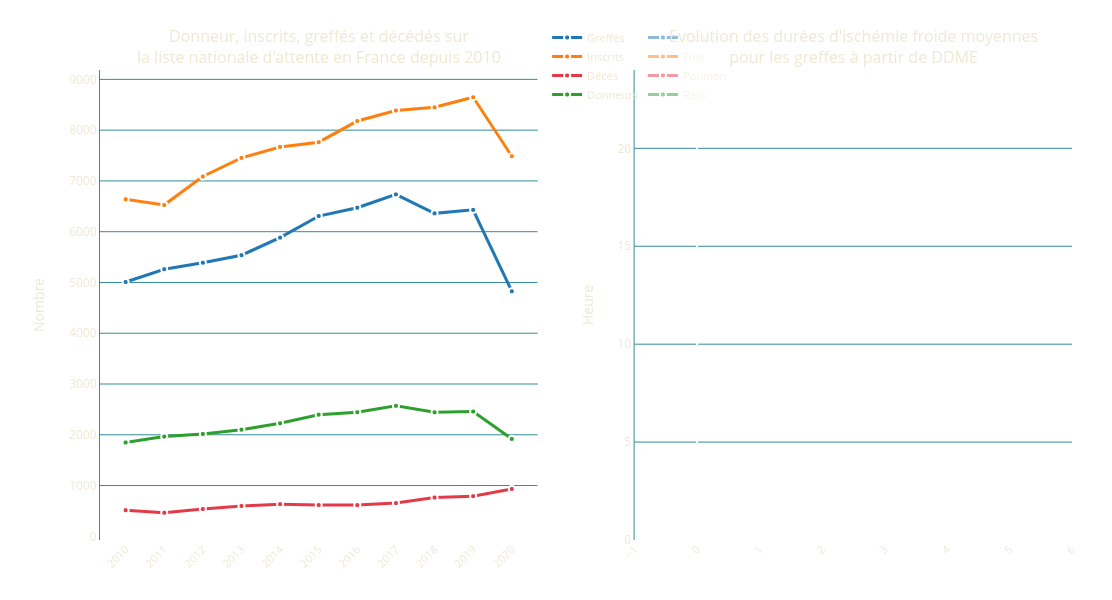

In [235]:
fig = make_subplots(
    rows=1, cols=2,
    subplot_titles=("Donneur, inscrits, greffés et décédés sur<br>la liste nationale d'attente en France depuis 2010",
                    "Evolution des durées d'ischémie froide moyennes<br>pour les greffes à partir de DDME"),
    vertical_spacing=0.075
)

# Graphique pénurie
fig.add_trace(go.Scatter(x=df_intro_pen['Année'], y=df_intro_pen['Greffés'],
                         mode='lines+markers',
                         name='Greffés',
                         legendgroup = '1',
                         line=dict(width=3),
                         marker=dict(color=color.bleu,opacity=1,line=dict(color="white", width=2)),
                        ),1,1)
fig.add_trace(go.Scatter(x=df_intro_pen['Année'], y=df_intro_pen['Inscrits'],
                         mode='lines+markers',
                         name="Inscrits",
                         legendgroup = '1',
                         line=dict(width=3),
                         marker=dict(color=color.orange,opacity=1,line=dict(color="white", width=2)),
                        ),1,1)
fig.add_trace(go.Scatter(x=df_intro_pen['Année'], y=df_intro_pen['Décès sur liste'],
                         mode='lines+markers',
                         name="Décès",
                         legendgroup = '1',
                         line=dict(width=3),
                         marker=dict(color=color.rouge,opacity=1,line=dict(color="white", width=2)),
                        ),1,1)
fig.add_trace(go.Scatter(x=df_intro_pen['Année'], y=df_intro_pen['Donneurs prélevés'],
                         mode='lines+markers',
                         name="Donneurs",
                         legendgroup = '1',
                         line=dict(width=3),
                         marker=dict(color='#2ca02c',opacity=1,line=dict(color="white", width=2)),
                        ),1,1)

# Graphique ischémie

fig.add_trace(go.Scatter(x=df_intro_isc.query("Organe=='Coeur'")['Année'], y=df_intro_isc.query("Organe=='Coeur'")['ISC_RECAL'],
                         mode='lines+markers',
                         name='Coeur',
                         legendgroup = '2',
                         visible='legendonly',
                         line=dict(width=3),
                         marker=dict(color=color.bleu,opacity=1,line=dict(color="white", width=2)),
                         ),row=1,col=2)

fig.add_trace(go.Scatter(x=df_intro_isc.query("Organe=='Foie'")['Année'], y=df_intro_isc.query("Organe=='Foie'")['ISC_RECAL'],
                         mode='lines+markers',
                         name="Foie",
                         legendgroup = '2',
                         visible='legendonly',
                         line=dict(width=3),
                         marker=dict(color=color.orange,opacity=1,line=dict(color="white", width=2)),
                        ),row=1,col=2)

fig.add_trace(go.Scatter(x=df_intro_isc.query("Organe=='Poumon'")['Année'], y=df_intro_isc.query("Organe=='Poumon'")['ISC_RECAL'],
                         mode='lines+markers',
                         name="Poumon",
                         legendgroup = '2',
                         visible='legendonly',
                         line=dict(width=3),
                         marker=dict(color=color.rouge,opacity=1,line=dict(color="white", width=2)),
                        ),row=1,col=2)

fig.add_trace(go.Scatter(x=df_intro_isc.query("Organe=='Rein'")['Année'], y=df_intro_isc.query("Organe=='Rein'")['ISC_RECAL'],
                         mode='lines+markers',
                         name="Rein",
                         legendgroup = '2',
                         visible='legendonly',
                         line=dict(width=3),
                         marker=dict(color='#2ca02c',opacity=1, line=dict(color="white", width=2)), 
                        ),row=1,col=2)


fig.update_layout(
    legend_tracegroupgap = 50,
    grid = {'pattern': "independent"},
    height=600, width=1450,
    margin=margin,
    plot_bgcolor=bgcolor,
    paper_bgcolor=bgcolor,
    xaxis_title="",
    xaxis_tickfont_size = 11,
    xaxis_tickmode = 'linear',
    xaxis_tickangle = -45,
    yaxis_tickformat = '',
    yaxis_title="Nombre",
    xaxis2_title="",
    xaxis2_tickfont_size = 11,
    xaxis2_tickmode = 'linear',
    xaxis2_tickangle = -45,
    yaxis2_tickformat = '',
    yaxis2_range = [0,24],
    yaxis2_title="Heure",
    font_color=color.bc,
    legend=dict(
        orientation='h',
        bgcolor=bgcolor,
        bordercolor=bgcolor,
        font=dict(size=11),
        yanchor="top",
        y=1.1,
        xanchor="left",
        x=0.46
    ),
    title=dict(
        text="",
        x=0.1,
        font=dict(size=16,
        )),
)

fig.update_yaxes(linecolor=col_ax,gridcolor=col_ax)
fig.update_xaxes(showgrid=False)

fig.show(config={'displayModeBar': False})

<font color='red' size=4>
    
Deux points de contextes structure les enjeux et les motifs à agir en transplantation :
- Premièrement, la pénurie : il y a plus de nouveaux inscrits que de greffons disponibles sur la même période. Cette situation conduit à l'accumulation des malades sur la liste nationale d'attente et à l'augmentation du nombre de décès sur liste.
- Deuxièmement, l'absence de méthode de conservation des organes sur une longue durée donne ce caractère urgent à la transplantation
    - Cette urgence se mesure entre autres par la durée d'ischémie froide, la période pendant laquelle un greffon n’est plus vascularisé et privé d’apport en nutriments et en oxygène. Elle impacte la survie du greffon et donc du receveur.
    - un cœur verra sa reprise de fonction primaire se dégrader à partir de 3h d'ischémie froide.

</font>

---

## Des règles pour objectiver des critères de choix d'allocation d'une ressource rare

<div class="container">
   <div class="row" >
       <div class="text-center">
           <div class="r-stack">
              <img src="./assets/img/I_principes_1.png" class="fragment current-visible" alt="..." width=80%>
              <img src="./assets/img/I_principes_2.png" class="fragment" alt="..." width=80%> 
          </div>
       </div>
   </div>  
</div>

<font color='red' size=4>

Le processus global de la greffe se déroule comme ceci : les nouveaux malades sont inscrits sur une liste d'attente, nationale en France. Lorsqu'un donneur est qualifié, l'allocation des greffons aux receveurs est faite afin de déclencher le processus de la greffe. C'est une mission du Pole National de Répartition des greffons de l'Agence de la biomédecine. Le PNRG.
    
Aujour'hui, nos sociétés réclament d'être efficaces, juste (équité) et transparents. En greffe, ces principes ont pour socles les règles de répartition, élaborer par l'Agence de la biomédecine et ses partenaires. 
- Ses règles ont un cadre légal 
- et ont pour finalité d'objectiver des critères de choix lors de l'allocation d'une ressource rare.    

---
    
Ses règles de répartition se décomposent selon deux dimensions 
- un dimension médicale qui peut être faite : 
    - par l'attribution d'un organe à une équipe et le médecin décide du receveur dans sa liste (réduite à l'équipe)
    - par l'attribution d'un organe à un patient à l'aide d'un score basé sur des composante biologique, qui vise à maximiser un critère : 
        - la survie sur liste 
        - ou post-greffe
- La seconde dimension est géographique
    - attribue le greffon dans des zone selon des maillages emboîtés, on propose à l'équipe de proximité, puis à un tour des équipes d'une zone intermédiaire avant de passer à un tour national des équipes 
    - calcul la distance entre le site de prélèvement et le greffe : distance continue

Ces contraintes mélangeant pénurie, urgence, approche clinique et géographie ne sont pas sans poser des défis. 

</font>

## Les motifs à agir : l'inadéquation spatiale de l'offre et des besoins

<div class="container">
   <div class="row" >
       <div class="text-center">
           <p>Disparités spatiales de l’offre et des besoins en greffe pulmonaire entre 2013 et 2018</p>
           <img src="./assets/img/PO_offre_besoin.png" alt="..." width=100%>
       </div>
   </div>  
</div>


<font color='red' size=4>

Le premier de ces défis est l'inadéquation spatiale des l'offre et des besoins en greffe
    
Si je représente à l'aide de deux cartes la localisation entre 2013 et 2018:
- du nombre de prélèvement pulmonaires 
- du nombre de nouveaux inscrits en greffe pulmonaires
- j'obtiens d'un côté une mesure de l'offre, de l'autre des besoins.
L'interprétation géographique de ces nombres bruts montrent
- que la majorité des prélèvements se font en IDF (plus de pop), mais c'est une vision qui est souvent oublié
- il existe des disparité spatiale : plus d'offre à l'ouest, mais plus de besoin à l'est
    
Si la répartition des greffons se fait dans des zones d'allocations figées dans l'espace : 
- le greffon est attribué en priorité à l'équipe sa zone de prélèvement, 
- il y a donc un risque de voir apparaître des disparités d'accès à la greffe. 
    
Nous sommes face à un problème d'équité d'accès aux soins d'un bien rare. 
    
</font>

---

## Les motifs à agir : réduction des possibilités d'appariement

<div class="container">
   <div class="row" >
       <div class="text-center">
           <img src="./assets/img/I_appariement.png" alt="..." width=100%>
       </div>
   </div>  
</div>


<font color='red' size=4>

Le second de ces défis concerne l'impact que peut avoir la géographie sur un score d'allocation patient.

- Prenons un greffon hépatique prélevé dans la zone A. Il sera proposé en premier à l'équipe de la zone A
- Pourtant, c'est l'équipe de la zone B qui est la plus proche. Mais n'étant pas dans la même zone, elle n'accède pas en premier au greffon en lien avec un effet de frontière
- Cela pose également question si l'équipe de la zone B a dans sa liste un malade urgent, l'équipe de la zone A ayant un malade moins grave.
Autrement dit, le modèle géographique peut réduire les possibilités d'appariement
- de moins bons candidats à la greffe peuvent accéder aux greffons, aux contraire de meilleure candidat qui ne sont pas dans la "bonne" zone
- ce qui peut avoir un impact sur la survie des malades sur liste ou post-greffe
    
Nous sommes face à un problème d'équité d'accès aux soins et d'efficacité.   
 

</font>

---

## Les motifs à agir : des durées de trajets qui peuvent être optimisées

<div class="container">
   <div class="row" >
       <div class="text-center">
           <img src="./assets/img/I_ischemie.png" alt="..." width=100%>
       </div>
   </div>  
</div>


<font color='red' size=4>

Le dernier défis concernent la logistique du transport qui fait face à de nouvelles difficultées 
    
Les transports entre le site de prélèvement et de greffe, ceux qui impactent la durée d'ischémie froide, se font soit en ambulance, soit par avion privé + ambulance. Pour les rein tgv ou vol air france, mais ce point n'est pas traité dans cette thèse

- Si la durée d'ischémie froide chute continuellement depuis plusieurs années, elle semble avoir atteint un palier en greffe cardiaque avec 3h30 en moyenne et un écart-type de 50 minutes.

- Les aéroports sont de moins en moins accessibles, alors que les allocations se font de plus en plus à l'échellon national
    
- Nous sommes face à un problème de faisabilité et d'efficacité en santé publique

    
</font>

---

## Allouer dans l'urgence une ressource rare impose de faire des choix

<div class="r-stack">
  <img src="./assets/img/I_EEF_1.png" class="fragment fade-in-then-out" alt="..." width="50%">
  <img src="./assets/img/I_EEF_2.png" class="fragment" alt="..." width="50%">
</div>





<font color='red' size=4>
    
Pour résumer, la greffe d'organes doit faire face à une double contrainte pénurie / urgence.
  
Or, pour allouer une ressource rare, il est nécessaire de faire des choix.

- Doit-on privilégier les territoires qui ont mis l'accent sur l'activité de recensement des donneurs ?
- Faut-il aller plus loin pour mieux apparier le receveur et le donneur ? Avec le risque d'augmenter la durée d'ischémie froide
- Faut-il prioriser les durées de trajets courtes pour minimiser la durée d'ischémie froide ?
    
Je ne répondrais pas à ces questions à la frontière de l'équité et de l'éthique, qui sont hors du champs de cette conférence, mais elles laissent entrevoir une problématique majeure et souvent oubliée en transplantation, à savoir

--- 
    
- que les systèmes d'attribution des greffons reposent sur un équilibre entre principes d'équité, d'efficacité et de faisabilité
    
---
    
- Mais qui peuvent être annihilés par des modèles géographiques inadaptés    
    
</font>

---

## Hypothèses testées

<div class="container">
   <div class="row" >
       <div class="text-center">
           <img src="./assets/img/I_Hypotheses.png" alt="..." width=75%>
       </div>
   </div>  
</div>

<font color='red' size=4>

Trois hypothèses sont testées pour répondre à ces motifs à agir 
- Il est possible de rationaliser la construction de la dimension spatiale des règles d'allocation
- Il est possible d'objectiver le role de cette dimension spatiale
- Le compromis équité/efficacité/faisabilité des systèmes d'allocation peut être optimisé par la géographie
</font>

---

<h1><i class="fas fa-lungs"></i> Optimiser l’équité d’accès des équipes de transplantation aux greffons dans le cas d'une gestion de la distance discrète</h1>

<div class="container">
   <div class="row" >
       <div class="text-center">
           <img src="./assets/img/I_plan_2.png" alt="..." width=100%>
       </div>
   </div>  
</div>


<font color='red' size=4>
       
J'ai choisi de vous présenter en premier l'étude sur la mise en place de zones de prélèvement "optimisées" en greffe pulmonaire.
    
Il ne s'agit pas ici d'optimiser à l'aide de la géographie la survie sur liste ou post-greffe, qui n'est pas tellement un sujet pour cet organe : il y a peu de pénurie, ce n'est pas une greffe vitale pour la majorité des indications, mais une amélioration majeure de la qualité de vie.
    
En revanche, l'adéquation entre offre et besoin en greffe est une problématique majeure des organisations en charge de la transplantation dans le monde, notamment pour des questions d'équité d'accès aux greffons pour les patients. 

</font>

---

### L'allocation aux équipes : exemple de la greffe pulmonaire

<div class="container">
    <div class="text-center">
      <img src="./assets/img/PO_intro_tours.png" class="rounded" alt="..." width=80%>
    </div>
</div>

<font color='red' size=4>
    
En France, les poumons sont, avec le pancréas, les derniers organes qui suivent un système d'allocation sous la forme d'un tour des équipes dans des zones discrètes du fait de la faible pénurie et de l'absence de consensus sur un score d'allocation patient. 

L'allocation se déroule de la façon suivante :
- Si un greffon pulmonaire est qualifié à Bayonne, il sera proposé aux malades dont le pronostic vital est menacé à très court terme. Il n'y a pas de modèle géographique, l'urgence prime sur la distance.
- S'il n'y a pas de receveur urgent qualifié pour ce greffon, il est proposé à l'équipe de transplantation de la zone à laquelle appartient Bayonne : Bordeaux. On parle de réseau de prélèvement local.
- le greffons est ensuite proposé aux équipes du maillage supérieur selon un tour régional
- Enfin, la proposition est faite selon un tour national des équipes.

</font>

---

## Motifs à agir : une inéquité d'accès aux greffons inter-équipes

<div class="r-stack">
  <img data-fragment-index="0" src="./assets/img/PO_model0.png" width="auto" height="450">
</div>

<font color='red' size=4>

Je parlais en introduction de l'impact des modèles géographiques sur l'adéquation entre l'offre et les besoins
    
La carte présentée correspond au  premier niveau de maillage: le niveau local représentés par des réseaux locaux
- Chaque point est un site de prélèvement. La couleur correspond à l'équipe de transplantation du réseau local
- par exemple en vert, l'ancien réseau de l'équipe de Nantes
- on constate que la taille de ces zones de prélèvement est très variable selon les équipes.
- or je vous ai dit que l'épidémiologie du prélèvement pulmonaire était très spatialement différente de celles des inscrits
    
Pour mesurer l'adéquation entre offre et besoins, nous pouvons calculer le rapport entre: 
- le nombre de greffons prélevés dans un réseau local sur une période : offre (environ 400 pour Nantes)
- et le nombre de nouveaux inscrits par l'équipe de transplantation de la même zone sur la même période : besoins (environ 120 pour Nantes)
- Pour de multiples raisons que je pourrais expliquer plus tard, nous prenons ici le nombre de greffés et non le nombre d'inscrits pour les besoins

En relativisant l'offre et les besoins, on constate que
- le réseaux de l'équipe de transplantation de Nantes dispose de 3 fois plus de greffons pulmonaires que de greffés entre 2013 et 2018
- Dans les équipes parisiennes, ce ratio est de 0.1
    
Avoir un ratio offre/besoin élevé permet d'avoir plus fréquemment des propositions et donc de choisir le meilleur donneur pour son receveur :
- on peut questionner l'équité de la situation en terme de santé publique

</font>

<font color='red' size=4>
    
</font>

---

<h2><i class="fas fa-circle-question"></i> Hypothèse </h2>


<blockquote class="fs-3" style="width: 1200px;">
Les zones de prélèvement de greffons peuvent être optimisées spatialement afin de satisfaire un critère d’équité inter-équipe
</blockquote>    

---

<blockquote class="fs-4" style="width: 1200px;">
Cette hypothèse est challengée par une évaluation de type <font color='#E45756'> avant</font> / <font color='#088EA7'> après</font> en greffe pulmonaire
</blockquote>   


<font color='red' size=4>

Les zones de prélèvement de greffons peuvent être optimisées spatialement afin de satisfaire un critère d’équité inter-équipe
Cette hypothèse est challengée par une évaluation de type <font color='#E45756'> avant</font> / <font color='#088EA7'> après</font> en greffe pulmonaire

</font>

---

## Solution proposée : optimiser la taille des réseaux en fonction de l'offre et des besoins

<div class="container">
   <div class="row" >
       <div class="text-center">
           <img src="./assets/img/PO_methodo_anim.png" class="rounded" alt="..." width=100%>
       </div>
   </div>  
</div>

<font color='red' size=4>

L'idée est d'optimiser la taille des réseaux de prélèvement en équilibrant l'offre et des besoins
    
Je teste toutes les combinaisons possibles de réseau de prélèvement pour chaque équipe de greffes
- un site de prélèvement en vert ne peut appartenir au réseau que d'une seule équipe de transplantation en rouge
- le nombre de greffon prélevés sur la période est indiqué, ainsi que le nombre de greffes pour l'équipe
- à chaque combinaison, calcul: 
    -le ratio prélèvement du réseau testé / nombre de greffes de l'équipe 
    -la variance et la moyenne des 3 ratios

Le calcul de ces combinaisons est un problème NP-complet (résolution passe par un processus exponentiel, mais la solution est rapide à vérifier)
Pour des contraintes de temps, j'ai résolu ce problème par un algorithme force-brute sous contraintes
- Le critère d'optimisation est la minimisation de la variance des ratios offre/besoin entre les équipes 
- les contraintes du modèles sont :
    - une moyenne du ratio proche de 0.5
    - une distance maximum entre l'équipe de greffe et le site de prélèvement de 2h
    
</font>

---

### Résultats : conception des nouveaux réseaux

<div class="container">
   <div class="row" >
           <div class="r-stack">
              <img src="./assets/img/PO_model0.png" class="fragment fade-in-then-out" alt="..." width="1344" height="835.52">
              <img src="./assets/img/PO_model1.png" class="fragment fade-in-then-out" alt="..." width="auto" height="700">
              <img src="./assets/img/PO_model2.png" class="fragment fade-in-then-out" alt="..." width="auto" height="700">
          </div>
       </div>
</div>  


<font color='red' size=4>
    
Plusieurs solutions ont été proposées et discutées avec les équipes de greffe pulmonaires
- la première carte correspond aux anciens réseaux
- le modèle 1 est celui qui répond le mieux à notre critère d'optimisation : la variance est très proche de 0, toutes les équipes ayant des ratios proches de 0.5. Sauf Strasbourg, en lien avec l'épidémiologie du prélèvement faible dans l'est
- le modèle 2 celui qui a été retenu, après ajustement 
    - suite à de nombreux échanges avec les équipes. Des compromis sur ce modèle ont été faits
    - Il y avait la volonté de certaines équipes de garder des sites dans leurs réseaux locaux (maintien de l'activité de prélèvement, raison historique, conventions)
    - Si ce n'est pas le meilleur, ce modèle reste toutefois plus équitable que la situation originale.


</font>

---

### Evaluation des nouveaux réseaux : population et méthodes

<div class="container">
   <div class="row" >
       <div class="text-center">
           <img src="./assets/img/PO_eval_methodo.png" class="rounded" alt="..." width=100%>
       </div>
   </div>  
</div>


<font color='red' size=4>

Ces réseaux locaux dits optimisés ont été mis en place en septembre 2020
    
- Je les ai évaluer à un an (: de septembre 2020 à septembre 2021 vs septembre 2018 à septembre 2019 : PO impacté par épidémie SARS-Cov2
    
- Comme pour toutes les études présentées aujourd'hui, j'ai utilisé la base de données Cristal qui contient toutes les informations sur les donneurs et receveurs. Nous l'utilisons pour l'allocation des greffons, le suivi avant et post-greffe
    
- Analyse univariée acitvité des équipes, distances parcourues, durée d'ischémie froide (tests appariés)
- survie sur la liste : prise en compte de risques concurrents avec un estimateur d'Aalen-Johansen et non Fine and Gray (pas d'ajustement).


</font>

---

### Résultats : pas de changement sur l'activité et la logistique des équipes


<div class="container">
    <div class="row">
      <div class="col">
          <div class="card nb">
                <div class="row no-gutters">
                    <div class="col-auto nb">
                        <i class="fas fa-grip-lines-vertical fa-5x img-fluid"></i>
                    </div>
                    <div class="col nb">
                        <div class="card-block px-2">
                            <p class="card-text font-weight-bold">Activité</p>
                            <p class="card-text">Pas de changement relatif d'activité entre les équipes</p>
                            <p class="card-text">Local: <font color='#e45756'>19</font> à <font color='#088ea7'>14%</font></p>
                            <p class="card-text">National: <font color='#e45756'>48</font> à <font color='#088ea7'>60%</font></p>
                        </div>
                    </div>
                </div>
          </div>
      </div>
      <div class="col">
          <div class="card nb">
                <div class="row no-gutters">
                    <div class="col-auto nb"> 
                        <i class="fas fa-truck-medical fa-5x"></i>
                    </div>
                    <div class="col nb">
                        <div class="card-block px-2">
                            <p class="card-text font-weight-bold">Logistique</p>
                            <p class="card-text nb">Pas de différence sur les distances (<font color='#e45756'>432</font> à <font color='#088ea7'>406 km</font> en moyenne, p=0,36)</p>
                            <p class="card-text nb">Réduction de 15 minutes de la durée d'ischémie froide moyenne (p=0.06)</p>
                        </div>
                    </div>
                </div>
          </div>
      </div>
    </div>
</div>  

<font color='red' size=4>
    
- Baisse logique des attribuation locales de 19 à 14%, ce qui reste modéré
- Augmentation des allocations nationales de 48 à 60%, en lien aussi avec la disparition du tour régional
    
</font>

---

### Résultats : sans impacter la survie sur liste et post-greffe

In [236]:
f = open("./assets/json/po_survie_lna.json")
survie_lna = json.load(f)

fig_lna = go.Figure(
    data=survie_lna['data'],
    layout=survie_lna['layout']
)

f = open("./assets/json/po_survie_post.json")
survie_lna = json.load(f)

fig_post = go.Figure(
    data=survie_lna['data'],
    layout=survie_lna['layout']
)

In [237]:
fig = make_subplots(rows=1, cols=2,
                   subplot_titles=("Probabilité d’évènement de décès/retraits et de greffes à 3 mois", "Survie post-greffe à 3 mois"))

for i in fig_lna.data : 
    i['line']['width']=3
    fig.add_trace(i, 
        row=1, col=1,
    )
    
for i in fig_post.data : 
    i['line']['width']=3
    fig.add_trace(i,
        row=1, col=2
    )
    
fig.update_traces(hovertemplate=None)
fig.update_xaxes(title_text="Nombre de jours depuis l'inscription",
                 range=[0, 92],
                 dtick=30,
                 showgrid=False,
                 row=1, col=1)

fig.update_yaxes(title_text="",
                 range=[0, 1.05],
                 tickformat=',.0%',
                 row=1, col=1)

fig.update_xaxes(title_text="Nombre de jours depuis la greffe",
                range=[0, 92],
                 dtick=30,
                 showgrid=False,
                 row=1, col=2)

fig.update_yaxes(title_text="",
                 range=[0, 1.05],
                 tickformat=',.0%',
                 row=1, col=2)

fig.update_layout(margin=margin,
                  hovermode="x",
                  font_color=color.gris,
                  legend = dict(
                      x=0.42,
                      xanchor="right",
                      y=0.77,
                      yanchor="bottom",
                      title_font_family="Arial",
                      orientation="v",
                      font=dict(size=13),
                      traceorder = 'normal',
                      bgcolor = None
                  ),
                  font=font,
                  title_x=0.5,
                  plot_bgcolor=bgcolor,
                  paper_bgcolor=bgcolor,
                  width=w,
                  height=h,
                  )


fig.show(renderer=renderer,config={'displayModeBar': False})

<font color='red' size=4>
    
- Pas de changement avant/après sur la survie sur liste (zoomer sur les déces)
- ou post-greffe à 3 mois

</font>

---

### Résultats : une amélioration de l'équité d'accès aux greffons pulmonaire

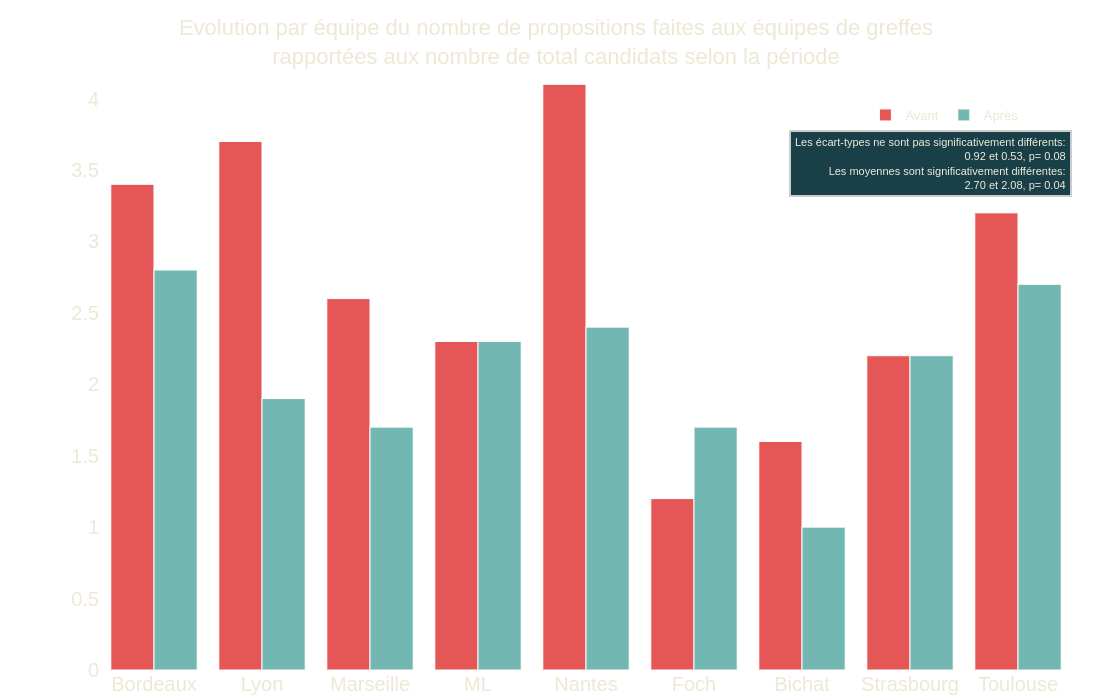

In [238]:
f = open("./assets/json/po_propositions.json")
proposition = json.load(f)
proposition['data'][0]['x'] = ['Bordeaux','Lyon','Marseille','ML','Nantes','Foch','Bichat','Strasbourg','Toulouse']
proposition['data'][1]['x'] = ['Bordeaux','Lyon','Marseille','ML','Nantes','Foch','Bichat','Strasbourg','Toulouse']
proposition['layout']['annotations'][0]['bgcolor'] = '#002b36'

#proposition['data'][0]['marker']['color'] = 'rgba(255,255,255,0.5)'
#proposition['data'][1]['marker']['color'] = 'rgba(255,255,255,0.9)'

fig_prop = go.Figure(
    data=proposition['data'],
    layout=proposition['layout']
)

fig_prop.update_layout(hovermode="closest",
                      font_color=color.gris,
                      font=font,
                      title_x=0.5,
                      title_font_size=22,
                      xaxis = dict(tickfont = dict(size=20)),
                      yaxis = dict(tickfont = dict(size=20)),
                      plot_bgcolor=bgcolor,
                      paper_bgcolor=bgcolor,
                      width=w,
                      height=h,
                  )

        

fig_prop.update_layout(yaxis_tickformat = '')
fig_prop.show(config={'displayModeBar': False})

<font color='red' size=4>
    
En termes de résultats, il n’y a pas de changement significatif sur l'activité des équipes, sur les distances parcourues, la survie sur liste, l'accès à la greffe et la survie post-greffe. Une baisse à la limite de la significativité pour la durée d'ischémie froide, -15 minutes en moyenne. Concernant l'activité de greffe et la survie, ses résultats s'observent aussi bien pour l'ensemble des équipes que pour chaque équipe.
    
Le principal changement se trouve dans le nombre de propositions faites aux équipes de greffe, rapporté au total candidats de l'équipe sur la période. nouveaux inscrits + malades restant en attente sur chaque période
    
Sur la période avant, l'équipe de Nantes avait en moyenne 4,1 propositions de greffons pulmonaires pour 1 candidat sur liste. 2.4 un an après la mise en place des nouveaux réseaux

Le rééquilibrage des réseaux de prélèvement à permi de réduire les disparités inter équipes
    
- avec une baisse à la limite de la significativité de l'écart-type 0,92 à 0,53 (levene) : ce que l'on cherchait à faire. La baisse de la variance est bien un critère d'équité, même si une variance sur 9 individus est critiquable à raison au niveau puissance.
        
</font>

---

## Optimiser l'équité d'accès à la greffe dans des zones d'allocations : conclusion

<div class="container">
   <div class="row" >
       <div class="text-center"> 
           <img src="./assets/img/PO_conclusion.png" alt="..." width=100%>
       </div>
   </div>  
</div>




<font color='red' size=4>

En conclusion, les principaux apports scientifiques sont les suivants : 
- Il s'agit d'une méthode simple à mettre en place, généralisation et ajustable. L'algorithme a été réutilisé pour d'autres études et est mis à disposition sur github
- Sa finalité est compréhensible par tous : ajuster la taille des réseaux en fonction de l'offre et des besoins
- Il y a une forte appétence à l'international pour ses modèles. Beaucoup visent à optimiser les distances, certains l'offre (avoir un même nombre de prélèvement)
- L'originalité de ce travail étant l'ajout de l'adéquation offre/besoin
    
Les limites portent sur la résolution d'un problème NP-complet par une méthode force brute sous contrainte
- J'ai pu tester différents algorithme, dont des heuristiques knapsack, mais qui ne donnait que le meilleur résultat
- Je n'ai pas pu poursuivre dans cette voie faute de temps, mais l’algorithme disponible sur Github est optimisé. Pour les 9 équipes de greffe et un peu moins de 200 sites de prélèvement, le problème est résolu en moins de 5 minutes. Mais il n’est pas possible d’ajouter plus de 20 sites de prélèvement par équipe de bref sans explosion combinatoire. Des regroupements d'établissements permettent de contourner cette limite 
- J'aurais également souhaité utiliser des heuristiques en topologie. Je n'ai pas pu, mais mes recherches m'ont beaucoup aidé sur d'autres études, notamment sur la mise en place de regroupement de centre de dialyse pour l'évaluation ainsi que pour des propositions de nouveaux schémas interrégionaux de l'offre de soins en greffe.

</font>

---

<h1><i class="fas fa-arrows-to-circle"></i> Optimiser la gestion de la distance continue à l'aide d'un modèle gravitaire</h1>

<div class="container">
   <div class="row" >
       <div class="text-center">
           <img src="./assets/img/I_plan_3.png" alt="..." width=100%>
       </div>
   </div>  
</div>



<font color='red' size=4>

La seconde étude porte sur l'optimisation la gestion de la distance continue à l'aide d'un modèle gravitaire. 
    
L'objectif est de faire un compromis entre l'urgence et la distance, afin d'améliorer l'efficacité des scores d'allocation mais aussi leur équité.


</font>

---

## Contexte : le score foie jusqu'en 2011

<div class="container">
    <div class="text-center">
      <img src="./assets/img/F_intro_score.png" class="rounded" alt="..." width=80%>
    </div>
</div>

<font color='red' size=4>
   
Tendance depuis 15 ans à utiliser des scores d'allocations patient pour les classer : foie, coeur et rein 
    
Après les séquences d'urgences et locales, application du score d'allocation
- une combinaison de fonction mathématiques basée sur les bilans médicaux des malades qui compte pour 1000 points 
- Foie pour les cirrhoses isolée, on utilise le MELD : 
    - 40, 100% de risque de dc dans les 3 mois
    - 14 ou moins, il y a plus de risque de décéder de l'opération que d'attendre sur la liste : il ne faut pas les greffer
    - C'est donc un critère d'efficacité évoqué précédemment : il est utilisable pour minimiser les décès sur liste
    - Le score foie vise donc à greffer en "juste-à-temps"
- **S'ajoute** à la dimension médicale la dimension géographique :
    - calcul de la distance entre le site de prélèvement et de greffe
    - une fonction décroissante de la distance donne de 300 à 0 points

Jusqu'en 2011

</font>

---

## Motifs à agir

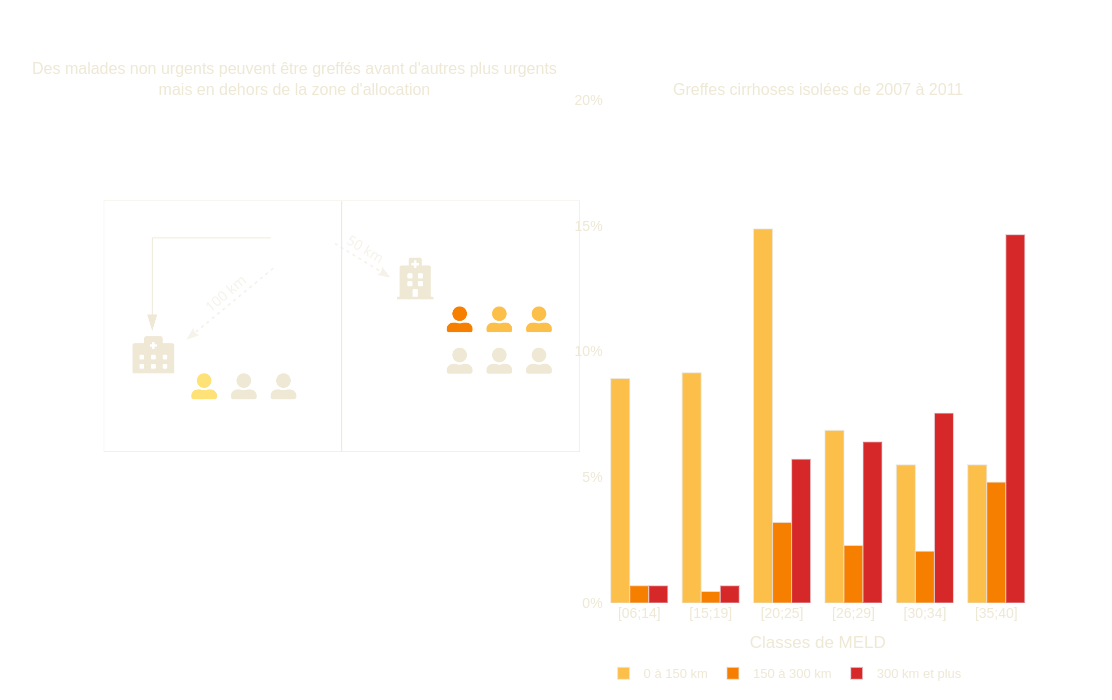

In [239]:
df_meld = pd.read_json("./assets/json/df_F_MELDKM.json")
df_foie_cirrh_av = df_meld.query("period=='av'")
df_foie_cirrh_av = df_foie_cirrh_av.copy()
df_foie_cirrh_av['color'] = np.where(df_foie_cirrh_av['CLASSE_KM_VOITURE']=='0 à 150 km','#fcbf49',
                                     np.where(df_foie_cirrh_av['CLASSE_KM_VOITURE']=='150 à 300 km','#f77f00',
                                     '#d62828'))

fig = make_subplots(
    rows=1, cols=2,
    subplot_titles=("Des malades non urgents peuvent être greffés avant d'autres plus urgents<br>mais en dehors de la zone d'allocation",
                    "Greffes cirrhoses isolées de 2007 à 2011"),
    vertical_spacing=0.075
)


for c in df_foie_cirrh_av.CLASSE_KM_VOITURE.unique():
    fig.add_trace(go.Bar(name=c,
                       x=df_foie_cirrh_av.query(f"CLASSE_KM_VOITURE=='{c}'").CLASSE_MELD,
                       y=df_foie_cirrh_av.query(f"CLASSE_KM_VOITURE=='{c}'").p,
                       marker_color= df_foie_cirrh_av.query(f"CLASSE_KM_VOITURE=='{c}'").color),
                  1,2)

    
fig.update_layout(barmode='group')

fig.update_xaxes(title_text="Classes de MELD")

fig.update_yaxes(title_text="Cirrhoses isolées greffées au Score national ou local (% du total)",
                 range=[0, 0.2],
                 tickformat=',.0%')
fig['layout']['yaxis2']['title']=""

fig.update_layout(hovermode="closest",
                  font_color=color.gris,
                  font=font,
                  title_x=0.5,
                  title_y=0.85,
                  plot_bgcolor=bgcolor,
                  paper_bgcolor=bgcolor,
                  width=w,
                  height=h,
                  legend=dict(
                    orientation='h',
                    bgcolor=bgcolor,
                    bordercolor=bgcolor,
                    font=dict(size=13),
                    yanchor="top",
                    y=-0.11,
                    xanchor="left",
                    x=0.55
                ),
            )



fig.update_layout(
                images= [
                    dict(
                    source='https://i.imgur.com/icfPU4F.png',
                    xref="paper", yref="paper",
                    x=0.025, y=0.8, 
                    sizex=0.5, sizey=0.5,
                    xanchor="left",
                    yanchor="top",
                    sizing="contain",
                    layer="below")    ])

fig.show(config={'displayModeBar': False})


<font color='red' size=4>
    
Je l'évoquais dans les motifs à agir :  un jour donnée, la maximisation du critère défini par un score ne peut pas être atteinte si le choix des receveurs est limité à la seule liste de l'équipe

- Des malades non urgents peuvent être greffés avant d'autres plus urgent, car en dehors du réseau local

Les effets des ces problèmes sont visibles dans ce graphique 
- de la répartition des greffes pour les cirrhose isolée, par classe de MELD et par classe de distance
- Lorsque j'ai présenté le score foie, j'ai précisé que pour les cirrhoses isolées, la greffe de malades MELD inférieur ou égal à 14 était à proscrire
- Mais le modèle géographique l'autorisait
- De plus, les malades les plus graves semblaient être surtout greffés avec des greffons venant de plus loin
- Comme nous le verrons plus tard, les modèles géographiques additifs ne sont pas assez discriminants

Nous nous retrouvons donc ici face à un problème d'équité d'accès aux greffons et d'efficacité des règles de répartition. Le principe de la greffe en juste-à-temps du score fois est perturbée par le modèle géographique


</font>

---

## Hypothèse 

<blockquote class="fs-3" style="width: 1200px;">
Une interaction entre l’urgence de la greffe et la distance conduit à la réduction de la mortalité sur liste ou post-greffe
</blockquote>    

---

<blockquote class="fs-4" style="width: 1200px;">
Cette hypothèse est challengée par une évaluation de type <font color='#E45756'> avant</font> / <font color='#088EA7'> après</font> en greffe hépatique
</blockquote>  

<font color='red' size=4>

Une interaction entre l’urgence de la greffe et la distance conduit à la réduction de la mortalité sur liste ou post-greffe
Cette hypothèse est challengée par une évaluation de type <font color='#E45756'> avant</font> / <font color='#088EA7'> après</font> en greffe hépatique
    
</font>

---

## Solution proposée : mise en place et évaluation d'un modèle gravitaire pour l'allocation des greffons

> « Tout interagit avec tout, mais deux objets proches ont plus de chances de le faire que deux objets éloignés » 
>
> Waldo Tobler "A computer movie simulating urban growth in the Detroit region." 1970.

<font color='red' size=4>

Pour cela, j'ai utilisé un modèle gravitaire issue des principes de l'interaction spatiale

Ces principes peuvent être résumés par une citation de Tobler, désignée comme la première loi de la géographie :  
    
Tout interagit avec tout, mais deux objets proches ont plus de chances de le faire que deux objets éloignés
    
</font>

---

### Méthodologie : conception du modèle gravitaire

<div class="row">
    <div class="column" style=" float: left;width: 45%; margin-right:15px;">
    \begin{equation}
        \Large F=G\times\frac{m_{i}\times m_{j}}{d_{ij}{^{2}}}
    \end{equation}
    \begin{align} \nonumber 
        \\
    \large F&: \large \mbox{Force d'attraction} \nonumber \\
    \large G&: \large \mbox{Constante gravitationnelle} \nonumber \\
    \large m_i&: \large \mbox{Masse de i} \nonumber \\
    \large m_j&: \large \mbox{Masse de j} \nonumber \\
    \large d_{ij}&: \large \mbox{Distance entre i et j} \nonumber 
    \end{align}
    </div>
    <div class="column" style=" float: left;width: 45%; margin-right:15px;">
        \begin{equation}
\Large Score\:Foie=\frac{Score\:Foie\:Hors\:Distance}{\exp{0,4\times\frac{D^{0,15}}{\sqrt{K}}}}
\label{equ:mgfoie}
\end{equation}
</div>
</div>

<font color='red' size=4>

- Modèle très utilisé en géomarketing : Analogie avec la loi de gravitation de Newton : la force d'attraction est égale au produit des masses de deux corps divisé par la distance au carré
- On n'ajoute plus à la fonction médicale la fonction de la distance, mais on divise le score foie hors distance par la distance
- Les paramètres ont été calibrés par itérations de simulation à partir de cohortes historiques, puis nous avons fait des tests avec Benoit Audry sur sa plateforme de simulation en fonction de scénarios que je lui proposais. Nous avons conservé les freins qui satisfaisaient à un critère de maximisation de la survie sur liste.  
- Je ne rentre pas plus ici dans les paramètres de cette fonction de la distance, nous pourrons revenir dessus lors de la séance de questions        
- Compléments :    
    - il n'y a pas de masse du donneur, qui pourrait s'apparenter à la qualité du greffon : il faudrait une mesure de cette qualité, et il est difficile de connaître l'état du greffon avant que le prélèvement débute
    - la fonction de la distance est anisotrope dans un espace euclidien (terme que j'ai peu à peu éclipsé au fil du temps suite aux regards étonnés des transplanteurs). Autrement dit, l'espace n'a pas les mêmes propriétés selon les équipes 
    - offre une compensation pour les équipes en position frontalière et donc de satisfaire une certaine équité d'accès aux greffons
    - a distance égale, l'équipe de strasbourg aura moins d'opportunité de prélèvement qu'une équipe parisienne
    - J'utilise également une fonction exponentielle modifiée permet de paramétrer finement le frein de la distance
    - ce frein est essentiel car il permet de déterminer le compromis entre l'urgence et la distance
        - Pour illustrer : pour acheter une baguette, le frein de la distance est élevé. On ne fait pas 10 km pour une boulangerie
        - Pour les fêtes, je suis prêt à faire 10 km pour acheter un gâteau chez Conticini ou Lignac. Le frein de la distance est plus faible

</font>

---

### Principes de l'interaction spatiale appliquées au Score Foie
  
<div class="container">
    <div class="text-center">
      <img src="./assets/img/figure23.png" class="rounded" alt="..." width=100%>
    </div>
</div>

<font color='red' size=4>

- Effet de taille : à distance égale, l'importance des relations entre deux lieux est proportionnelles à leurs capacités d'émission et de réception
- Effet de distance : A poids égal, l'importance des relations entre 2 lieux est **inversement** proportionnelle à leur distance
- loi de la gravitation de newton
- appliquée à la géo : physique sociale, en vogue dans les années 40
- modélise bien des flux, modèle utilisé en géomarketing

    
</font>

---

### Méthodologie : principes de l'interaction spatiale
  
<div class="container">
    <div class="text-center">
      <img src="./assets/img/F_principesMG.png" class="rounded" alt="..." width=100%>
    </div>
</div>

<font color='red' size=4>

- Effet de taille : à distance égale, l'importance des relations entre deux lieux est proportionnelles à leurs capacités d'émission et de réception
- Effet de distance : A poids égal, l'importance des relations entre 2 lieux est **inversement** proportionnelle à leur distance
- loi de la gravitation de newton
- appliquée à la géo : physique sociale, en vogue dans les années 40
- modélise bien des flux, modèle utilisé en géomarketing

    
</font>

---

### Le rôle de la plateforme de simulation

<div class="row">
    <div class="column" style=" float: left;width: 45%; margin-right:15px;">
        <img style="margin-right:0px;margin-top:0px;" src="./assets/img/C_calage.png" width="auto" height="500" />
    </div>
    <div class="column" style=" text-align:center; float: left;width: 42.5%; margin-right:15px;">
        <img style="margin-right:0px;margin-top:0px;" src="./assets/img/C_sim.png" width="auto" height="500" />
    </div>
</div>

<font color='red' size=4>

Remarques sur la plateforme de simulation et l'ajustement du frein de la distance dans le modèle gravitaire
- l'idée est de se baser sur les déplacements existants pour déterminer un frein observé de la distance à l'aide d'une regression de Poisson
    
</font>

---

### K équipe

  
<div class="container">
    <div class="text-center">
      <img src="./assets/img/F_keqp.png" class="rounded" alt="..." width=100%>
    </div>
</div>

---

### Illustrations des effets du modèle gravitaire

In [240]:
fig = make_subplots(
    rows=1, cols=2,
    subplot_titles=("Ancien modèle : tous les receveurs<br>à 900 points sauf à Lille = 1 000 points",
                    "Modèle gravitaire: tous les receveurs<br>à 900 points sauf à Lille = 1 000 points"
                   ),
    specs=[[{"type": "surface"}, {"type": "surface"}]],)


z_data_v3 = pd.read_feather("./assets/feather/Plot3d_LILLE_v3.feather")
z_data_1000 = pd.read_feather("./assets/feather/Plot3d_LILLE_1000.feather")

fig.add_trace(
    go.Surface(z=z_data_v3.values,colorscale='YlOrRd',
                                 reversescale=True,
                                 showscale=False),row=1, col=1
)

fig.add_trace(
    go.Surface(z=z_data_1000.values,colorscale='YlOrRd',
                                 cmin=-500,cmax=-400,reversescale=True,
                                 showscale=False),row=1, col=2
)

fig.update_layout(
    margin=dict(r=10, t=50, b=10, l=10),
    font_color=color.gris,
    font=font,
    title_x=0.5,
    plot_bgcolor=bgcolor,
    paper_bgcolor=bgcolor,
    width=w,
    height=h,
    hovermode=False
)

fig.show(renderer=renderer,config={'displayModeBar': False})

<font color='red' size=4>

- Illustration de la mise en concurrence entre les patients
- Ici, un seul patient représenté par équipe pour des raisons de simplicité
- Patient à Lille avec un score foie hors distance 1000 points, les autres à 900
- A gauche, l'ancien modèle additif, à droite le modèle gravitaire
    - avec l'ancien modèle, aucune compétition : le malade de lille attire tous les greffons du territoire
    - avec le MG, introduit de la compétition : zone d'influence du patient de lille est la plus grande, mais les autres équipes peuvent également attirer le greffon s'il est assez proche


</font>

---

### Illustrations des effets du modèle gravitaire (2)

In [241]:
fig = make_subplots(
    rows=1, cols=2,
    subplot_titles=("Modèle gravitaire : receveurs<br>entre 500 et 1000 points",
                    "Modèle gravitaire : tous les receveurs<br>à 900 points sauf à Lille = 1 000 points"
                   ),
    specs=[[{"type": "surface"}, {"type": "surface"}]],)

z_data_random = pd.read_feather("./assets/feather/Plot3d_random_mg.feather")
z_data_1000 = pd.read_feather("./assets/feather/Plot3d_LILLE_1000.feather")

colorscale = ["#fec44f","#fe9929","#fc4e2a","#e31a1c","#bd0026","#800026"]

fig.add_trace(
    go.Surface(z=z_data_random.values,colorscale='YlOrRd',
                                 cmin=-500,cmax=-400,reversescale=True,
                                 showscale=False),row=1, col=1
)

fig.add_trace(
    go.Surface(z=z_data_1000.values,colorscale='YlOrRd',
                                 cmin=-500,cmax=-400,reversescale=True,
                                 showscale=False),row=1, col=2
)

fig.update_layout(
    margin=dict(r=10, t=50, b=10, l=10),
    font_color=color.gris,
    font=font,
    title_x=0.5,
    plot_bgcolor=bgcolor,
    paper_bgcolor=bgcolor,
    width=w,
    height=h,
    hovermode=False
)


fig.show(renderer=renderer,config={'displayModeBar': False})

<font color='red' size=4>

- Évolution constante en fonction du score des malades
- Peut voir ça comme une zone d'allocation patient dont la taille évolue en fonction de son score hors distance
- le patient de Toulouse est un bon candidat à la greffe, mais moins urgent que les autres. Il pourront attirer le greffon si ce dernier est très proches

</font>

---

### Evaluation du modèle gravitaire : population et méthodes

<div class="container">
   <div class="row" >
       <div class="text-center">
           <img src="./assets/img/F_eval_methodo.png" class="rounded" alt="..." width=100%>
       </div>
   </div>  
</div>


<font color='red' size=4>

Mise en place du MG en 2011.  Evaluation 4 ans avant et 4 ans après
- analyses univariées
  
- Survie sur liste, Aalen-Johansen. Inclusion des prévalents et des incidents, également pour le Cause specific HR. Comme pour le poumon, le fait d'avoir les mêmes malades sur la première et seconde période (794) n'a pas été pris en compte dans les tests.
    
- Survie post-greffe, modèle de Cox ajusté sur le DFG à la greffe et l'intubation, sur l'individu de référence. Le DFG et l'intubation sont de bons prédicteurs de survie post-greffe utilisés dans les publications de l'Agence. 

Compléments :     
- représente 9 et 18 % des deux cohortes pour l'étude sur le score foie
    
</font>

---

### Résultats : Baisse de l'incidence des décès et retraits sur liste pour aggravation

<div class="container">
   <div class="row" >
       <div class="text-center">
           <img src="./assets/img/F_BLR.png" class="rounded" alt="..." width=40%>
       </div>
   </div>  
</div>

<font color='red' size=4>

Baisse non significative de l'incidence des décès pour des questions de puissances, mais tendance visible
    
</font>

---

### Résultats : prise en compte des risques concurrents sur la liste nationale d'attente

<div class="container">
   <div class="row" >
       <div class="text-center">
           <img src="./assets/img/F_pre_grf.png" class="rounded" alt="..." width=100%>
       </div>
   </div>  
</div>

<font color='red' size=4>
    
Un résultat majeur du MG est la réduction d'environ 15% des décès sur liste après la mise en place du modèle, qui peut s'expliquer par une meilleure redistribution en juste à temps des greffons
    
Si je m'intéresse à la prise en compte des risques concurrents sur la liste nationale d'attente
    
- sur la probabilité d'événements de décès sur liste 
    - Réduction des décès est maintenant identique par classe de MELD : amélioration de l'efficacité et de l'équité du score foie
- Priorisation de l'accès à la greffe des malades en fonction de la classe de MELD, ici tous malades confondus ce qui explique qu'il y ai des malades MELD inf14 qui accèdent à la greffe

Complément    
- L'analyse du Cause-specific hazard ratio de montre, après ajustement sur la classe de MELD, un effet protecteur du modèle gravitaire (CHR = 0,84 [0,73; 0,96] p-value = 0,01).
    
</font>

---

### Résultats : modèle de Cox post-greffe

<div class="container" style = "background-color: #eee8d5;">
   <div class="row" >
       <div class="text-center">
           <img src="./assets/img/CauseSpecific_HR.png" class="rounded" alt="..." width=80%>
       </div>
   </div>  
</div>

---

### Résultats : redistribution des allocations en juste-à-temps

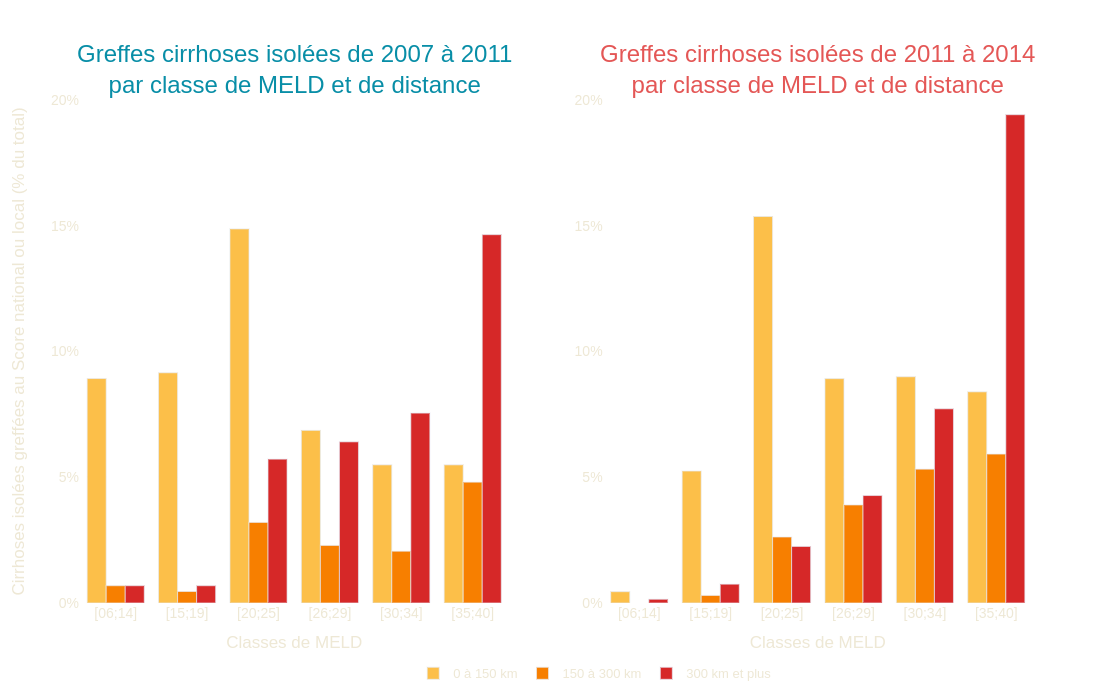

In [242]:
df_meld = pd.read_json("./assets/json/df_F_MELDKM.json")
df_foie_cirrh_av = df_meld.query("period=='av'")
df_foie_cirrh_av = df_foie_cirrh_av.copy()
df_foie_cirrh_av['color'] = np.where(df_foie_cirrh_av['CLASSE_KM_VOITURE']=='0 à 150 km','#fcbf49',
                                     np.where(df_foie_cirrh_av['CLASSE_KM_VOITURE']=='150 à 300 km','#f77f00',
                                     '#d62828'))
df_foie_cirrh_ap = df_meld.query("period=='ap'")
df_foie_cirrh_ap = df_foie_cirrh_ap.copy()
df_foie_cirrh_ap['color'] = np.where(df_foie_cirrh_ap['CLASSE_KM_VOITURE']=='0 à 150 km','#fcbf49',
                                     np.where(df_foie_cirrh_ap['CLASSE_KM_VOITURE']=='150 à 300 km','#f77f00',
                                     '#d62828'))
    
fig = make_subplots(
    rows=1, cols=2,
    subplot_titles=("Greffes cirrhoses isolées de 2007 à 2011<br>par classe de MELD et de distance",
                    "Greffes cirrhoses isolées de 2011 à 2014<br>par classe de MELD et de distance"),
    vertical_spacing=0.075
)


for c in df_foie_cirrh_av.CLASSE_KM_VOITURE.unique():
    fig.add_trace(go.Bar(name=c,
                       x=df_foie_cirrh_av.query(f"CLASSE_KM_VOITURE=='{c}'").CLASSE_MELD,
                       y=df_foie_cirrh_av.query(f"CLASSE_KM_VOITURE=='{c}'").p,
                       marker_color= df_foie_cirrh_av.query(f"CLASSE_KM_VOITURE=='{c}'").color),
                  1,1)
    fig.add_trace(go.Bar(name=c,
                       x=df_foie_cirrh_ap.query(f"CLASSE_KM_VOITURE=='{c}'").CLASSE_MELD,
                       y=df_foie_cirrh_ap.query(f"CLASSE_KM_VOITURE=='{c}'").p,
                       marker_color= df_foie_cirrh_ap.query(f"CLASSE_KM_VOITURE=='{c}'").color,
                       showlegend=False),
                  1,2)

    
fig.update_layout(barmode='group')

fig.update_xaxes(title_text="Classes de MELD")

fig.update_yaxes(title_text="Cirrhoses isolées greffées au Score national ou local (% du total)",
                 range=[0, 0.2],
                 tickformat=',.0%')
fig['layout']['yaxis2']['title']=""

fig.update_layout(hovermode="closest",
                  font_color=color.gris,
                  font=font,
                  title_x=0.5,
                  title_y=0.85,
                  plot_bgcolor=bgcolor,
                  paper_bgcolor=bgcolor,
                  width=w,
                  height=h,
                  legend=dict(
                    orientation='h',
                    bgcolor=bgcolor,
                    bordercolor=bgcolor,
                    font=dict(size=13),
                    yanchor="top",
                    y=-0.11,
                    xanchor="left",
                    x=0.35
                ),
            )

fig['layout']['annotations'][0]['font']=dict(size=24, color="#088EA7" )
fig['layout']['annotations'][1]['font']=dict(size=24, color="#E45756" )

fig.show(config={'displayModeBar': False})

<font color='red' size=4>
    
Vous reconnaissez ce graphique, la répartition des greffes pour cirrhoses isolées par classe de MELD et de distance, avant et maintenance après le MG
Redistribution du MELD en fonction de la gravité : meilleur compromis entre l'urgence et la distance
- Quasiment plus aucune greffe cirrhose isolé MELD inf ou égal 14 
- Greffes même plus de MELD elevé dans la proximité, chose qui était compliqué avec le modèle additif

</font>

---

### Résultats : mortalité post-greffe

<div class="container">
   <div class="row" >
       <div class="text-center">
           <img src="./assets/img/F_post_grf.png" class="rounded" alt="..." width=80%>
       </div>
   </div>  
</div>

<font color='red' size=4>

Il faut savoir que la durée d'ischémie froide à été réduite d'une heure entre les deux périodes
    
La survie post-greffe a été évaluée à trois ans. Sans et avec ajustement, la survie est significativement plus élevée pour les malades greffés lors de la mise en place du modèle gravitaire 

L’analyse du modèle de Cox montre un bénéfice de survie significatif sur la seconde période, sans et avec ajustement (HRa=0,83[0,75;0,92], p-value= 0,003)


</font>

---

### Résultats : modèle de Cox post-greffe

<div class="container" style = "background-color: #eee8d5;">
   <div class="row" >
       <div class="text-center">
           <img src="./assets/img/cox.png" class="rounded" alt="..." width=80%>
       </div>
   </div>  
</div>

---

## Optimiser la gestion de la distance à l'aide d'un modèle gravitaire : conclusion

<div class="container">
   <div class="row" >
       <div class="text-center">
           <img src="./assets/img/F_conclusion.png" alt="..." width=100%>
       </div>
   </div>  
</div>




<font color='red' size=4>

L'ajout d'un compromis urgence/distance permet aux malades les plus graves d'attirer un greffon, peu importe son éloignement. Les bons candidats mais moins urgents peuvent attirer les greffons proches.
    
- Ce compromis a permi de réduire de 15% l'incidence des décès sur liste
    
- On constate aussi une réduction de la durée d'ischémie froide, dont une partie pourrait être liée au remplacement de la gestion additive peut discriminante et qui "forçait" les malades les plus graves à aller chercher des greffons plus lointain, ce qui n'est plus le cas maintenant.

En terme d'apports scientifiques,
- Il s'agit d'un modèle multiplicatif en totale rupture avec ce qui est fait ailleurs
- Nous avons été contacté par l'UNOS, qui gère la transplantation aux USA, je reviendrai dessus à la fin
- Le MG a aussi été appliqué aux nouveaux score reins et coeur, nous devrions l'utiliser pour le futur score pancréas
 
Les limites : 
- Un modèle qui est complexe, qui doit être paramétré par simulations
- Des guides ont été développés pour aider les transplanteurs et patients
- Les résultats sont à relativiser
    - le MG a été mis en place en même temps que des modifications pour les CHC. Les analyses ont été également appliqué par sous groupes de maladies et donnent les mêmes résultats
    - Il y a eu de nouveaux traitements contre le VHC et une partie de la réduction de la durée d'ischémie froide est sans doute imputable à la mise en place du pôle national de régulation des greffons en 2011

  
</font>

---

<h1><i class="fas fa-helicopter"></i> Réduire la durée d'ischémie froide en simulant l'utilisation de nouveaux vecteurs de transport</h1>

<div class="container">
   <div class="row" >
       <div class="text-center">
           <img src="./assets/img/I_plan_4.png" alt="..." width=100%>
       </div>
   </div>  
</div>


<font color='red' size=4>

Cette dernière étude porte sur l'optimisation les possibilités offertes par les outils informations de la géographie (géomatique)  combiné à l'épidémiologie pour proposer des solutions visant : 
- à réduire la durée d'ischémie froide par l'utilisation de vecteurs de transports innovants
- et l'impact de cette réduction sur la survie post-greffe 

</font> 

---

## Contexte : des difficultés liées au prélèvement et au transport

<div class="container">
   <div class="row" >
       <div class="text-center">
           <div class="r-stack">
              <img src="./assets/img/H_contexte_1.png" alt="..." width=100%>
          </div>
       </div>
   </div>  
</div>

<font color='red' size=4>

- Difficulté à réduire la durée d'ischémie froide en greffe cardiaque, 3h30 en fr pour un écart-type de 50
- 5 à 6 prélèvements par jour, plutôt la nuit
- 6 à 10 avions privés pour les équipes

</font> 

## Tendance à la fermeture des aéroports

In [243]:
import geopandas as gpd
gpkg = r'/home/florian/thèse/transport/data/transport.gpkg'

gdf_aeroport = gpd.read_file(gpkg, layer='na_aeroport_abm')
gdf_aeroport = gdf_aeroport.query("ACCES_ABM == 'OUI'").to_crs(4326)
gdf_aeroport_h24 =  gdf_aeroport.query("OUV_ETE_SEMAINE=='H24'")

gdf_helistation = gpd.read_file(gpkg, layer='na_helistation_abm')
gdf_helistation = gdf_helistation.to_crs(4326)

gdf_ETA_GO = gpd.read_file(gpkg, layer='ETA_GO')
gdf_ETA_GO = gdf_ETA_GO.to_crs(4326)

gdf_ETA_PMO = gpd.read_file(gpkg, layer='ETA_PMO')
gdf_ETA_PMO = gdf_ETA_PMO.to_crs(4326)

df_OD_ETA_AERO= gpd.read_file(gpkg, layer='OD_ETA_AERO')


In [244]:
gdf_access=pd.concat([gdf_ETA_PMO,gdf_ETA_GO])
gdf_access=gdf_access[['ETA_CODE','ETA_NOM_USUEL','geometry']]
gdf_access=gdf_access.drop_duplicates('ETA_CODE')

In [245]:
gdf_access_all = gdf_access.merge(df_OD_ETA_AERO[['O','D','MINUTES']].rename(columns={'O':'ETA_CODE'}),on='ETA_CODE').query('MINUTES<=30')
gdf_access_all = gdf_access_all[gdf_access_all['D'].isin(gdf_aeroport.ID.values)].drop_duplicates('ETA_CODE')
gdf_access_all_inv = gdf_access[~gdf_access['ETA_CODE'].isin(gdf_access_all.ETA_CODE.values)]
 

gdf_access_h24 = gdf_access.merge(df_OD_ETA_AERO[['O','D','MINUTES']].rename(columns={'O':'ETA_CODE'}),on='ETA_CODE').query('MINUTES<=30')
gdf_access_h24 = gdf_access_h24[gdf_access_h24['D'].isin(gdf_aeroport_h24.ID.values)].drop_duplicates('ETA_CODE')
gdf_access_h24_inv = gdf_access[~gdf_access['ETA_CODE'].isin(gdf_access_h24.ETA_CODE.values)]

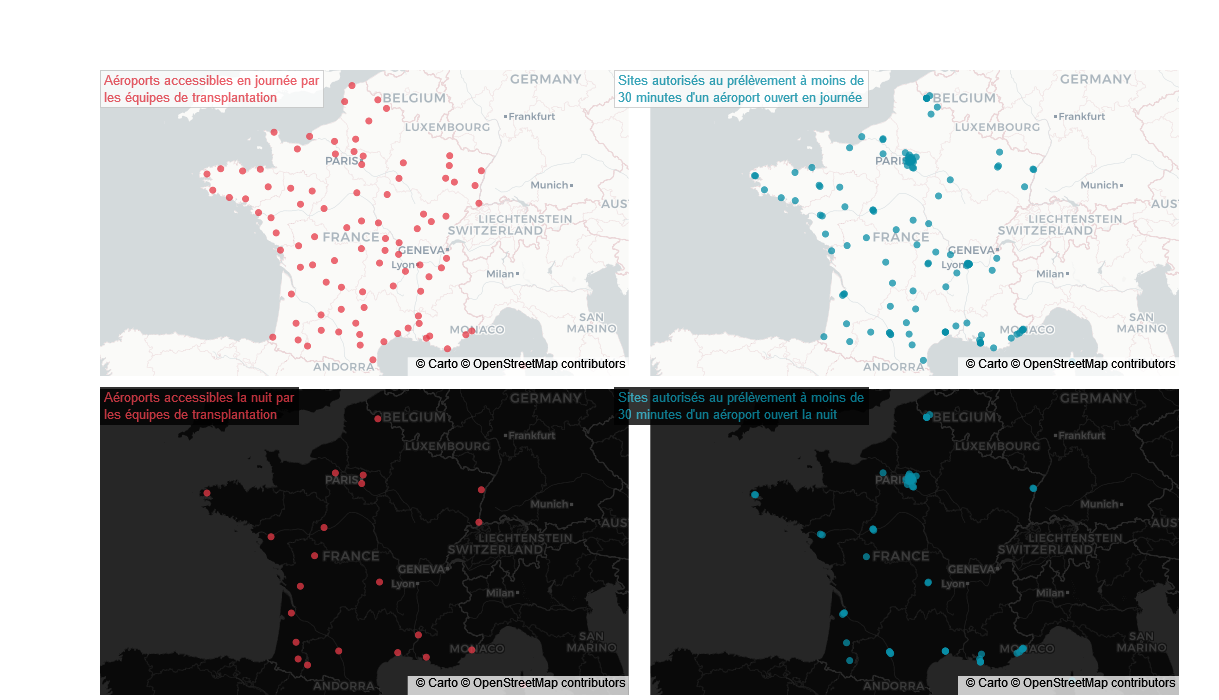

In [246]:
centerxy = dict(lat=47,lon=2.5)
fig = go.Figure()


# aeroport nuit
fig.add_trace(
    go.Scattermapbox(
        lat=gdf_aeroport_h24.geometry.y,
        lon=gdf_aeroport_h24.geometry.x,
        mode='markers',
        marker=dict(size=8,color="#e63946",opacity=0.75),
        text=gdf_aeroport_h24['Nom'],
        hovertemplate=
            "<b>%{text}</b><br><br>" +
            "<extra></extra>",
        subplot='mapbox',
        ))

# fig.add_trace(
#     go.Scattermapbox(
#     lat=gdf_aeroport_h24.geometry.y,
#     lon=gdf_aeroport_h24.geometry.x,
#     mode='markers',
#     subplot='mapbox',
#     hoverinfo='skip',
#     below='',                 
#     marker=dict(symbol ='airfield',allowoverlap  = True),
#     showlegend=False)
# )



# PMO nuit 

fig.add_trace(  
    go.Scattermapbox(
        lat=gdf_access_h24.geometry.y,
        lon=gdf_access_h24.geometry.x,
        mode='markers',
        marker=dict(size=8,color="#088ea7",opacity=0.75),
        #marker=dict(symbol ='hospital',allowoverlap=True),
        text=gdf_access_h24['ETA_NOM_USUEL'],
        hovertemplate=
            "<b>%{text}</b><br><br>" +
            "<extra></extra>",
        subplot='mapbox2',
        ))


#Aero journée
fig.add_trace(  
    go.Scattermapbox(
        lat=gdf_aeroport.geometry.y,
        lon=gdf_aeroport.geometry.x,
        mode='markers',
        marker=dict(size=8,color="#e63946",opacity=0.75),
        text=gdf_aeroport['Nom'],
        hovertemplate=
            "<b>%{text}</b><br><br>" +
            "<extra></extra>",
        subplot='mapbox3',
        ))


#PMO jour

fig.add_trace(  
    go.Scattermapbox(
        lat=gdf_access_all.geometry.y,
        lon=gdf_access_all.geometry.x,
        mode='markers',
        marker=dict(size=8,color="#088ea7",opacity=0.75),
        #marker=dict(symbol ='hospital',allowoverlap=True),
        text=gdf_access_all['ETA_NOM_USUEL'],
        hovertemplate=
            "<b>%{text}</b><br><br>" +
            "<extra></extra>",
        subplot='mapbox4',
        ))


fig.add_annotation(
        x=0, y=1,
        xref="paper", yref="paper",
        showarrow=False,
        text="Aéroports accessibles en journée par<br>les équipes de transplantation",
        font=dict(size=13,color="#e63946"),
        align="left",
        bordercolor="#c7c7c7",
        borderwidth=1,
        borderpad=1,
        bgcolor="#ffffff",
        opacity=0.8
        )

fig.add_annotation(
        x=0, y=0.462,
        xref="paper", yref="paper",
        showarrow=False,
        text="Aéroports accessibles la nuit par<br>les équipes de transplantation",
        font=dict(size=13,color="#e63946"),
        align="left",
        bordercolor="black",
        borderwidth=1,
        borderpad=1,
        bgcolor="black",
        opacity=0.8
        )

fig.add_annotation(
        x=0.713, y=1,
        xref="paper", yref="paper",
        showarrow=False,
        text="Sites autorisés au prélèvement à moins de<br>30 minutes d'un aéroport ouvert en journée",
        font=dict(size=13,color="#088ea7"),
        align="left",
        bordercolor="#c7c7c7",
        borderwidth=1,
        borderpad=1,
        bgcolor="#ffffff",
        opacity=0.8
        )

fig.add_annotation(
        x=0.713, y=0.462,
        xref="paper", yref="paper",
        showarrow=False,
        text="Sites autorisés au prélèvement à moins de<br>30 minutes d'un aéroport ouvert la nuit",
        font=dict(size=13,color="#088ea7"),
        align="left",
        bordercolor="black",
        borderwidth=1,
        borderpad=1,
        bgcolor="black",
        opacity=0.8
        )

fig.update_layout(
    autosize=False,
    hovermode='closest',
    mapbox=dict(
        style='carto-darkmatter',
        accesstoken= mapbox_access_token,
        domain={'x': [0, 0.49], 'y': [0, 0.49]},
        bearing=0,
        center=centerxy,
        pitch=0,
        zoom=4,
       
    ),
    mapbox2=dict(
        style='carto-darkmatter',
        accesstoken= mapbox_access_token,
        domain={'x': [0.51, 1.0], 'y': [0, 0.49]},
        bearing=0,
        center=centerxy,
        pitch=0,
        zoom=4
    ),
    mapbox3=dict(
        style='carto-positron',
        accesstoken= mapbox_access_token,
        domain={'x': [0, 0.49], 'y': [0.51, 1]},
        bearing=0,
        center=centerxy,
        pitch=0,
        zoom=4
    ),
    mapbox4=dict(
        style='carto-positron',
        accesstoken= mapbox_access_token,
        domain={'x': [0.51, 1.0], 'y': [0.51, 1]},
        bearing=0,
        center=centerxy,
        pitch=0,
        zoom=4
    ),
)

fig.update_layout(
    showlegend=False,
    margin=margin,
    hovermode="x",
    font_color=color.gris,
    font=font,
    title_x=0.5,
    plot_bgcolor=bgcolor,
    paper_bgcolor=bgcolor,
    width=w,
    height=h,
    legend=dict(
            orientation='h',
            bgcolor=bgcolor,
            bordercolor=bgcolor,
            font=dict(size=13),
            yanchor="top",
            y=1.05,
            xanchor="left",
            x=0.0
        ),
)

fig.show(config={'displayModeBar': False})

<font color='red' size=4>

    
- Sur les carte de gauche, les aéroports, à droite les sites autorisé au prélèvement d'organe à moins de 30 minutes en voiture d'un aéroport
- en haut le jour, en bas la nuit 
    
- 65% des sites PMO à moins de 30 minutes d'un aéroport le jour
- 28% la nuit
- Fermeture des aéroports

    
</font> 

---

## Des difficultés sur les distances 100 à 300 km

<div class="container">
   <div class="row" >
       <div class="text-center">
           <div class="r-stack">
              <img src="./assets/img/H_distancepb.png" alt="..." width=100%> 
          </div>
       </div>
   </div>  
</div>

---

## Opportunités ?

<div class="row">
    <div class="column" style=" float: left;width: 45%; margin-right:15px;">
        <img style="margin-right:0px;margin-top:0px;" src="./assets/img/H_opp_helico.jpg" width="auto" height="500" />
    </div>
    <div class="column" style=" text-align:center; float: left;width: 45%; margin-right:15px;">
        <img style="margin-right:0px;margin-top:0px;" src="./assets/img/H_opp_drone.webp" width="auto" height="500" />
    </div>
</div>

<font color='red' size=4>

- 100 et 300 km correspond justement au rayon d'action des hélicoptères sanitaires
- Quelques transports d'organes sur 5 km par drone
- Mais il est difficile de mobiliser ces vecteurs pour faire des études épidémiologiques type cas/témoin
- J'ai proposé d'utiliser un système d'information géographique (SIG) pour simuler l'effet de ces vecteurs sur le transport des organes

</font> 

---

## Hypothèse 

<blockquote class="fs-3" style="width: 1200px;">
Les outils de la géomatique permettent de simuler l'utilisation de moyens de transports innovants afin de réduire significativement la duré d'ischémie froide et d'augmenter la survie post-greffe
</blockquote>    

---

<blockquote class="fs-4" style="width: 1200px;">
Cette hypothèse est challengée par l'utilisation de micro-simulations sur les principaux organes greffés et d'un modèle prédictif de survie en greffe cardiaque
</blockquote>  

<font color='red' size=4>

Les outils de la géomatique permettent de simuler l'utilisation de moyens de transports innovants afin de réduire significativement la duré d'ischémie froide et d'augmenter la survie post-greffe
    
Cette hypothèse est challengée par l'utilisation de micro-simulations sur les principaux organes greffés et d'un modèle prédictif de survie en greffe cardiaque

</font>

---

## Solution proposée : microsimulations pour déterminer le gain sur l'ischémie

<div class="container">
   <div class="row" >
       <div class="text-center">
           <img src="./assets/img/H_calcul.png" class="rounded" alt="..." width=75%>
       </div>
   </div>  
</div>

<font color='red' size=4>

- Dans la base de données Cristal, nous ne disposons ni de la durée de transport, ni de la modalité de transport
    - Je recalcule le temps de trajet entre le site de prélèvement et l'équipe de greffe en fonction des différents vecteurs
    - Dans l'exemple, 2h par la route, 1h par l'hélicoptère. L'avion n'est pas possible pour ce trajet 

- En revanche, la durée d'ischémie froide est connue dans Cristal. Je peux donc calculer une durée d'ischémie froide simulée, c'est-à-dire la durée d'ischémie froide observée moins l'écart entre le scénario sans et avec l'hélicoptère. Ici, un gain d'une heure


</font>

---

## Simulation des temps de transports avec un SIG

<div class="container">
   <div class="row" >
       <div class="text-center">
           <video controls width="1400">
               <source src="./assets/video/exemple.mp4" type="video/mp4">
           </video>
       </div>
   </div>  
</div>

---

## Population et méthodes 

<div class="container">
   <div class="row" >
       <div class="text-center">
           <img src="./assets/img/H_eval_methodo.png" class="rounded" alt="..." width=100%>
       </div>
   </div>  
</div>


<font color='red' size=4>

Réseau de transport a été créé avec un SIG, afin de recalculer les temps de trajet de toutes les greffes adultes cardiaques, hépatiques, pulmonaires et rénales entre 2015 et 2019.
- Une analyse univariée sur tous les greffons permet d'évaluer les gains de l'hélicoptère et du drone par rapport aux autres vecteurs
- Un modèle prédictif de survie post-greffe
    - mais uniquement sur la greffe cardiaque et sur la distance 100 à 200 km
    - j'ai mis en place un training modèle basé sur un modèle de Cox. 
    - Dans le modèle, 
        - ischémie observée
        - antécédent de cancer 
        - et âge du donneur, 
    - qui sont des variables utilisées dans notre outil d'alerte des échecs de greffes cardiaques. Leur effet stable dans le temps pour mesurer la survie en font de bons facteurs d'ajustement pour notre modèle prédictif
    - après validation du modèle, j'ai remplacé les données de l'ischémie observé par l'ischémie simulée

    
</font>

---

### Résultats : simulations sur l'ensemble des greffons

<div class="container">
   <div class="row" >
       <div class="text-center">
           <img src="./assets/img/H_gains.png" class="rounded" alt="..." width=50%>
       </div>
   </div>  
</div>

<font color='red' size=4>

Sur l'approche univariée je vais me concentrer sur les hélicoptères 
- 0 et 100 km, on confronte l'hélicoptère à l'ambulance : gain moyen de 10 minutes
- mais entre 100 et 200 km, gain moyen d'1h
- entre 200 et 300 km, je n'ai pas mis en concurrence l'avion et l'hélicoptère volontairement dans le manuscrit, afin de conserver une certaine cohérence et simplicité. Il aurait fallu utiliser des appareils avec des caractéristiques très différentes et qui ne sont pas disponibles sur l'ensemble du territoire

    
</font>

---

### Résultats : modèle prédictif de survie

In [247]:
import pandas as pd

In [248]:
df_H_predict = pd.read_feather("./assets/feather/H_predict.feather")
df_H_predict = df_H_predict.astype({'time': 'int32'})

fig = go.Figure()

fig.add_trace(go.Scatter(
    x=df_H_predict.query("strata=='Trajet en hélicoptère'")['time'],
    y=df_H_predict.query("strata=='Trajet en hélicoptère'")['surv'],
    line=dict(shape='hv', width=3, color='#e45756'),
    name = "En hélicoptère",
    hovertemplate=None
))

fig.add_trace(go.Scatter(
    x=df_H_predict.query("strata=='Trajet par la route'")['time'],
    y=df_H_predict.query("strata=='Trajet par la route'")['surv'],
    line=dict(shape='hv', width=3, color='#088ea7'),
    name = "En voiture",
    hovertemplate=None
))


fig.update_xaxes(title_text="Temps écoulé depuis la greffe (jour)")

fig.update_yaxes(title_text="Probalité de survie (%)",
                 range=[0, 1],
                 tickformat=',.0%')

fig.update_layout(
    title="""Courbes de survie à un an avec et sans hélicoptère, sur la distance 100 à 200 km en greffe cardiaque,
    <br> après ajustements à l'aide d'un modèle prédictif de Cox ajusté sur l'ischémie, âge du donneur et antécédents de cancer """,
    hovermode="x",
    font_color=color.gris,
    font=font,
    title_x=0.5,
    title_y=0.95,
    plot_bgcolor=bgcolor,
    paper_bgcolor=bgcolor,
    width=w,
    height=h,
    legend=dict(
      orientation='v',
      bgcolor=bgcolor,
      bordercolor=bgcolor,
      font=dict(size=13),
      yanchor="top",
      y=0.75,
      xanchor="left",
      x=0.01),
)



fig.show(renderer=renderer,config={'displayModeBar': False})



<font color='red' size=4>

Modèle prédictif en greffe cardiaque pour évaluer l'effet qu'aurait une réduction de l'ischémie froide sur la ditance 100 - 200 km en greffe cardiaque: 
- aire sous la courbe ROC 0.84
- observé 56 décès, le training modèle en prédit 56,3 
- Predict de la library survival R qui donne le nombre attendu d'événement and fonction des covariables et de la durée de suivi 
- en remplaçant l'ischémie observé par l'ischémie simulé : 28,3 décès, en lien avec une réduction d'une heure en moyenne de la durée d'ischémie froide 
- 75% de survie post-greffe observée à 1 an vs 86% dans le modèle prédictif (courbes généré avec ggadjustedcurves de survminer)

Complément    
- HR de l'ischémie dans le modèle ajusté et de 1,97 IC[1,36 ; 2,8}

</font>

---

## Résultats : l'hélicoptère, une alternative pour le transport d'organes sur des distances intermédiaires

<div class="container">
   <div class="row" >
       <div class="text-center">
           <img src="./assets/img/H_biomed.png" width=50%>
       </div>
   </div>  
</div>

<font color='red' size=4>
L'hélicoptère, une alternative pour le transport d'organes sur des distances intermédiaires

Scénario très restrictif : 
- le gain de temps est sans doute supérieur à 1h. 
- Pas de concurence avec les avions dans les scénarios présentés, mais sur la distance 200-300 km des simulations avec des hélicoptères pouvant faire l'A/R sans avitailler montrent un gain de 30 minutes en moyenne

Contrairement à ce que laisse penser cette affiche de l'armée de terre, les hélicoptères ne sont pas utilisés pour le transport d'organe en métropole. Quels hélicoptères ? 
- Focalisé sur les Hélismur
- Vols possibles de nuit.
- cout moindre que l'avion privé grace àaux forfait 850€ v.s. 1500€/H
- Hors maintenance, les HéliSMUR ne volent pas 90% du temps
- Ne pas proposer l’hélicoptère pour tous les déplacements, mais uniquement lorsque le gain d’ischémie est important
- ne peut se faire que par la mise en place de projet pilote, avec des Helismur, les ARS et des centres greffeurs volontaires. 

</font>

## Résultats : les drones, une perspective à moyen et long terme

<div class="container">
   <div class="row" >
       <div class="text-center">
           <img src="./assets/img/H_lifelines.webp" width=100%>
       </div>
   </div>  
</div>



<font color='red' size=4>

Les gains sur le temps de transport ne sont pas encore suffisant.
Prérequis techniques pour être plus performant que l’avion et l’ambulance  :
- eVTOL + aile porteuse, distance franchissable > 300 km et une vitesse de croisière > 150 km/h.
- Charge utile suffisante pour un conteneur, idéalement une machine à perfuser : pas le cas aujourd’hui pour un décollage vertical.

Avantages : 
- Pas de personnel à bord, ce qui réduit les risques
- Coûts d’exploitation faibles que l’avion et l’ambulance

Evolution de la réglementation UE et française. DGAC cherche des projets tests (contact Lifelines-ABM pour un test échantillon biologique)

Mais suppose de mettre en place une mutualisation du prélèvement d’organes et de tracer les greffons

</font>

---

## Optimiser la gestion de la distance à l'aide d'un modèle gravitaire : conclusion

<div class="container">
   <div class="row" >
       <div class="text-center">
           <img src="./assets/img/H_conclusion.png" alt="..." width=100%>
       </div>
   </div>  
</div>




<font color='red' size=4>

Avec cette étude, j'ai montré que 
- l'utilisation des hélicoptère pouvaient au minimum réduire d'une heure la durée d'ischémie froide sur certaines distance
- ce qui permettrait de réduire les décès post-greffe à un an en greffe cardiaque

Les apports scientifiques et opérationnels sont multiples : 
- La construction d'un distancier national et multimodal incluant la route, l'avion, l'hélicoptère, le drone et bientôt le train / vol air france n'est pas commun.
- L'utilisation des hélicoptères seraient une solution face à la fermeture des aéroports, la plupart des sites de prélèvement et des équipes de greffe étant à moins de 200m d'une hélistation 
- Le Pr Kerbaul de l'Agence de la biomédecine m'a informé mardi dernier qu'il avait été contacté par le chef de la base hélicoptère de la Sécurité Civile de Paris. Ce dernier étant très intéressé par cette étude
- J'ai peu parlé des drones pour simplifier le message, mais cette étude à permis de définir des caractéristiques nécessaires pour que leur utilisation soit efficace. Nous pourrons revenir dessus si vous avez des questions
    
Concernant les limites : 
- Avec 56 décès observés dans cristal et 56,3 décès prédit dans le modèle, je me suis rapidement demandé si je n'overfittais pas le modèle prédictif. J'ai fait des tests de sensibilité sur le training modèle, de la cross-validation k-fold : les résultats étaient comparables
- Néanmoins, il est nécessaire de généraliser ce modèle à toutes les distances;
    - je l'ai limité aux distances où l'effet de la durée d'ischémie froide sur la survie était encore linéaire, ce n'est pas le cas au delà
    - Il faudrait au moins faire un modèle de Cox par classes de distances, ce qui n'est pas le cas dans le manuscrit


</font>

---

# Conclusion générale

<div class="container">
   <div class="row" >
       <div class="text-center">
           <img src="./assets/img/I_plan_5.png" alt="..." width=100%>
       </div>
   </div>  
</div>

<font color='red' size=4>

Nous voici donc arrivé à la conclusion générale
    
</font>

---

## 
<h2> <i class="fas fa-globe"></i> Quelles réponses proposées face aux enjeux de la greffe ? </h2>

<div class="container">
   <div class="row" >
       <div class="text-center">
           <img src="./assets/img/C_reponses.png" alt="..." width=65%>
       </div>
   </div>  
</div>

<font color='red' size=4>
Quelles réponses proposées face aux enjeux de la greffe ?    
    
Une ressource rare et fragile, qui impose de faire des choix. En lien avec des enjeux géographiques
    
J'ai essayé de vous montrer comment vos connaissances théoriques et techniques en tant que géographe, cartographe, géomaticiens peuvent avoir des impacts concret, ici avec l'exemple de la santé publique.
    
- Premièrement, en optimisant la distance au sein des règles d'allocation. En optimisant la notion de greffe en juste à temps à l’aide d’une fonction continue de la distance grace à des outils de l'analyse spatiale
- Deuxièmement, en proposant un moyen de réduire la durée de la composante transport de la durée d’ischémie froide. Une solution a été proposée via l’utilisation d’outils de la géomatique pour simuler les impacts de l’utilisation de nouveaux vecteurs
- Les différentes hypothèses que j'avais poser en introduction n'ont pas été contredites

</font>

---

## Quelle place de la géographie en santé publique et épidémiologie ?

<div class="r-stack">
	<div class="fragment fade-out" style="width: 1200px;">
        <blockquote class="fs-3" style="width: 1200px;">« La géographie de la santé est une mal-aimée de la géographie française […] mais elle est également une mal-aimée des spécialistes français de l’épidémiologie et de la santé publique » </blockquote>
        <blockquote class="fs-4" style="width: 1200px;">Gérard Salem, Géographie de la santé, santé de la géographie. Espace Populations Sociétés ; 1995</blockquote>
    </div>  
    <div class="fragment fade-in-then-out" style="width: 1200px;">
        <blockquote class="fs-3" style="width: 1200px;">« L’épidémiologie attend de la géographie qu’elle fasse preuve de son aptitude à décrire et expliquer l’organisation et la dynamique d’espaces, et les inégalités spatiales variées qui en sont la manifestation. »
        </blockquote>
        <blockquote class="fs-4" style="width: 1200px;">Emmanuel Vigneron, La géographie de la santé : un agenda qui se précise. Espace Populations Sociétés ; 1995</blockquote>
    </div>
</div>


<font color='red' size=4>

Je vais prendre un peu de recul sur toutes ces disciplines au cœur mon métier : quelle est la place de la géographie en santé publique et épidémiologie ?
    
Gérard Salem, un des fer-de-Lance de la géographie de la santé en France, disait en 1995 que La géographie de la santé est une mal-aimée de la géographie française […] mais elle est également une mal-aimée des spécialistes français de l’épidémiologie et de la santé publique.

Dans le même ouvrage, Emmanuel Vigneron, un autre visage majeur de la géographie de la santé en France, précisait : L’épidémiologie attend de la géographie qu’elle fasse preuve de son aptitude à décrire et expliquer l’organisation et la dynamique d’espaces, et les inégalités spatiales variées qui en sont la manifestation.
       
Aujourd'hui, la place de la géographie en santé est peut-être un peu moins ambiguë en France. Mais cette géographie de la santé reste enfermée en épidémiologie entre cette vision descriptive qu'évoquent Yves Lacoste et une vision opérationnelle, accaparée par la géomatique. 
- Géocodage des malades, 
- calculer des temps de trajet aux services d'urgences
- ou encore modélisation des facteurs de risques environnementaux et leurs effets sur la population.
    
Quant aux géographes de la santé, ils n'oublient pas qu'ils sont aussi classés comme une science sociale, en s'intéressant à la construction et aux dynamiques qui lient les Hommes à leur territoire sous le prisme de la santé au sens large.
    
A mon sens, votre force dans vos futurs métiers sera de tirer partie de votre capacité à comprendre les dynamiques spatiales, tout en proposant des outils techniques : 
- pour traiter l'information géoagraphique à l'aide des SIG
- pour proposer des modélisations visant à comprendre et optimiser ces dynamyques
- pour les représenter par le vecteur cartographique


    
</font>

---

<h2> <i class="fas fa-globe"></i> Un carambolage des disciplines pour les réconcilier toutes </h2>

<div class="container">
   <div class="row" >
       <div class="text-center">
           <img src="./assets/img/C_carambolage.png" alt="..." width=75%>
       </div>
   </div>  
</div>


<font color='red' size=4>
    
De mon expérience je pense que c'est par une approche transversale à différentes disciplines que la géographie de la santé prend finalement toute sa saveur.
    
Cette transversalité se retrouve 
- dans les thématiques abordées : transplantation, santé publique, transport. Je suis même allé pioché dans l'astrophysique
- dans les compétences acquises et mobilisées : algorithmie, approche scientifique, épidémiologie
- dans les métiers impliqués : géographie, informatique, santé
- dans les missions : toutes les études présentées ont un volet recherche, évaluation, opérationnelle et transmission du savoir

Et finalement, nous revenons à ma vision de la géographie exposée en introduction : la géographie comme un carambolage des disciplines pour les réconcilier toutes.

       
</font>

---

## Quels apports de la géographie de la santé et de la modélisation spatiale aux problématiques d’attribution des organes en transplantation ?

<blockquote class="fragment fs-3" style="width: 1200px;">La géographie, ça sert, aussi, à faire la <b>greffe</b></blockquote>

<div class="container fragment">
   <div class="row" >
       <div class="text-center">
           <img src="./assets/img/C_survie.png" alt="..." width=75%>
       </div>
   </div>  
</div>

<blockquote class="fragment fs-3" style="width: 1200px;">La géographie, ça sauve, aussi, des <b>vies</b></blockquote>



<font color='red' size=4>
Pour conclure, Quels sont les apports de la géographie de la santé et de la modélisation spatiale aux problématiques d’attribution des organes en transplantation ?
    
Outre la multidisciplinarité qui permet de faire avancer la science, j'ai voulu vous montrer que dans le domaine de la transplantation, la géographie ne s'inscrit plus uniquement dans une logique pragmatique, mais qu'elle s'inscrit aussi : 
- dans une logique d'équité, notamment face aux disparités d'accès aux soins
- dans une logique de faisabilité, en ouvrant la porte à de nouveaux vecteurs de transport
    
Ce qui nous ramène à l'oeuvre d'Yves Lacoste que j'évoquais en introduction, finalement, la géographie, ça sert aussi à faire la greffe
    
---
    
- Mais pas seulement, car l'efficacité est aussi impactée par une meilleure utilisation de la géographie dans les modèles d'allocation.
- Je conclurai donc cette présentation en annonçant que la géographie, ça sauve aussi des vies


</font>

---

<div class="container">
        <div class="row align-middle">
          <div class="col">
              <h1>
              <div class=" cblanc" style="padding-top: 35px;">
                <div class="fas fa-lungs"> </div>
                <div class="fas fa-arrows-to-circle"></div> 
                <div class="fas fa-helicopter"></div> 
                  Merci pour votre attention
            </div>
             </h1>
          </div>
        </div>
</div>

---

In [249]:
script = """
this.nextElementSibling.focus();
this.dispatchEvent(new KeyboardEvent('keydown', {key:'s', keyCode: 83, ctrlKey: true}));
"""
display(HTML((
    '<img src onerror="{}" style="display:none">'
    '<input style="width:0;height:0;border:0">'
).format(script)))

In [250]:
%%bash
/home/florian/miniconda3/envs/geo/bin/jupyter nbconvert ABM.ipynb --to slides --SlidesExporter.reveal_theme=moon --SlidesExporter.reveal_number=true --SlidesExporter.theme=dark --template custom_reveal --no-input

[NbConvertApp] Converting notebook ABM.ipynb to slides
[NbConvertApp] Writing 5653472 bytes to ABM.slides.html
